In [23]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from settings import API_BASE
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from arch import arch_model
 
 
# Create connector
connector = bitmex.BitMEX(base_url=API_BASE)
 
# Do trade history query
path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20vwap"
count = 500  # max API will allow
query = {
    'reverse': 'true',
    'start': 0,
    'count': count,
    }
 
csvwriter = None
with open('recent.csv', 'w+') as f:
    while True:
        data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
        #time.sleep(2.1)
        if csvwriter is None:
            # csv requires dict keys
            if len(data) == 0:
                break
            keys = sorted(data[0].keys())
            # Write to stdout
            csvwriter = csv.DictWriter(f, fieldnames=keys)
            csvwriter.writeheader()
 
        csvwriter.writerows(data)
        #data2 = pd.DataFrame
        data2 = np.append(data, data)
        query['start'] += count
        if query['start'] > 50000:
            break
        if len(data) < count:
            break


In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from settings import API_BASE
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from arch import arch_model
 

In [192]:
close = pd.Series(df_all['close'])
vwap = pd.Series(df_all['vwap'])
lm = len(close)-1
lp = len(close)+1
l = len(close)
rsi_len = 15
## RSI CLOSE ##
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSIclose = pd.Series(np.zeros(l))

 
for i in range(1,len(close)):           
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i > rsi_len:   
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSIclose[i] = 100;
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])
#print(RSIclose)


65.7762938230384
58.33333333333334
62.89592760180996
73.01275760549558
63.58974358974359
61.62162162162162
54.74254742547426
49.422222222222224
61.94779116465864
65.57692307692308
56.81211041852181
40.32534246575342
46.91546077684691
48.08743169398907
44.79242534595776
38.108484005563284
35.35483870967742
33.86138613861387
31.45762711864407
34.21828908554572
37.005649717514125
39.046199701937404
44.85294117647059
41.46525679758309
44.48424068767908
53.381294964028775
64.46617766911166
59.36626281453867
60.730593607305934
65.90683845391476
77.20430107526882
78.9010989010989
70.68741893644618
73.79227053140096
79.48387096774194
75.41436464088397
73.58490566037736
69.90881458966565
64.42577030812325
66.62286465177398
65.3950953678474
65.99732262382865
67.80735107731306
67.2258064516129
60.37079953650058
54.166666666666664
56.3855421686747
63.716814159292035
65.76200417536535
60.21194605009634
56.15453728661276
54.632867132867126
52.96610169491525
55.70409982174688
42.281879194630875
43.79

70.8984375
78.06291390728477
82.89835164835165
84.84479610468655
83.07134220072551
79.83730389308542
75.16816143497758
75.34780189204228
75.68474007825601
75.0
67.26256983240224
65.19999999999999
58.708530805687204
62.514484356894556
64.98855835240275
63.39907192575406
60.18927444794952
51.7629407351838
44.66437177280551
51.07913669064748
60.922330097087375
56.70180722891566
51.802179379715
52.956298200514134
50.95594347464672
60.69829901521935
63.888888888888886
65.77301161751564
64.9908592321755
59.78062157221206
58.13333333333333
53.18559556786704
46.677471636953
49.88575780654988
38.489208633093526
34.02777777777777
44.13735343383585
41.65217391304348
50.16528925619835
58.40118430792006
62.129380053908356
61.92411924119241
59.73856209150327
54.974160206718345
60.736196319018404
60.51344743276284
55.214723926380366
58.85850178359097
57.59803921568628
66.25766871165644
69.6319018404908
70.84805653710248
59.319526627218934
61.77015755329008
58.37537840565086
53.04203539823009
47.54184

58.57142857142857
56.16438356164384
48.362369337979096
40.35874439461884
37.06449221645664
42.15613382899628
38.40063341250989
28.125
36.46408839779006
39.72099853157122
43.547273982056595
42.925170068027214
40.56537102473497
44.88859764089121
45.304232804232804
39.30288461538462
43.45514950166113
47.11815561959655
46.54804270462633
44.27894380501016
38.79709187045605
37.049626104690695
47.134187457855695
33.40136054421768
40.23199023199023
39.753846153846155
46.08540925266904
45.89486119314826
37.580437580437575
37.628865979381445
46.45293315143247
51.251738525730175
55.32374100719425
54.69416785206259
63.36421952957947
68.74524714828897
65.67732115677322
57.50202757502027
69.42379182156134
62.1978021978022
48.12992125984252
43.08855291576675
38.513513513513516
40.02006018054162
50.55452865064696
43.26923076923077
31.02362204724409
35.87115666178623
33.242876526458616
34.748010610079575
36.92307692307693
36.45569620253164
35.4898336414048
32.081097197376266
32.97555158020275
43.038740

35.25114155251141
41.2962962962963
37.62278978388998
36.969111969111964
38.96236012207528
37.88328387734916
38.071570576540765
46.743697478991606
53.065539112050736
34.96199782844734
40.86146682188592
42.207053469852106
35.49488054607508
33.294117647058826
44.86652977412731
58.02197802197802
54.481955762514545
52.762119503945875
59.91379310344828
64.8568608094768
69.08517350157729
73.21248741188319
75.02347417840376
69.34579439252336
84.27272727272728
84.67670504871568
86.54743390357699
90.63517915309447
82.04144282425173
80.30303030303031
79.7752808988764
81.84019370460048
83.2512315270936
72.85601888276948
70.33248081841433
73.7007874015748
73.38645418326693
63.26366559485531
63.828061638280616
49.66996699669967
53.996983408748115
45.28301886792453
45.321888412017174
51.85873605947955
53.667262969588556
54.56140350877193
51.407129455909946
54.01262398557258
65.28692380056444
62.01966041108132
52.664859981933155
53.54609929078014
61.330761812921885
64.37246963562754
78.99441340782123


76.25754527162978
83.66285119667013
81.9954128440367
81.48584905660377
84.02848423194303
84.15741675075681
87.23849372384937
80.26948989412897
83.18293683347005
81.3466787989081
81.27272727272728
77.49110320284697
72.20149253731344
67.95698924731184
56.41025641025641
61.73526140155729
56.80803571428571
57.65864332603939
60.82995951417005
56.02272727272727
51.15766262403528
49.892473118279575
58.25991189427313
43.069306930693074
37.002341920374704
36.321839080459775
44.16299559471366
47.018348623853214
53.048780487804876
64.83516483516483
65.49019607843137
62.37161531279178
62.71970397779834
54.1862652869238
55.156537753222835
60.45871559633027
63.129002744739246
61.21270452358037
69.59395656279509
75.40322580645162
77.83558792924038
70.75773745997866
62.58373205741627
56.651884700665185
51.246882793017456
48.15303430079156
56.97841726618705
46.64131812420786
54.52091767881242
49.47526236881559
36.193029490616624
33.98058252427184
37.9400260756193
24.967148488830475
22.860791826309068
2

40.65244667503137
41.11675126903553
43.27628361858191
35.88390501319262
35.27885862516213
33.16129032258064
32.991014120667515
26.388888888888886
31.652989449003513
39.250275633958104
36.706135629709365
42.00700116686114
40.58624577226607
45.01187648456057
37.09239130434783
48.62258953168044
58.241758241758234
58.84476534296029
57.7331759149941
59.05797101449276
65.17954298150164
69.89498249708285
69.65116279069767
66.79389312977099
65.97131681877445
69.44065484311051
69.77058029689609
77.088948787062
70.53571428571429
71.72582619339045
68.82591093117409
56.432748538011694
50.15060240963856
59.41828254847645
64.26470588235294
54.139072847682115
57.33113673805601
62.47755834829444
56.8421052631579
51.76470588235294
46.03174603174603
45.648312611012436
38.99613899613899
49.70414201183432
52.42537313432836
44.46227929373997
42.8129829984544
47.751937984496124
47.261345852895154
42.48554913294797
49.93122420907841
47.368421052631575
47.17241379310345
53.92809587217044
61.210762331838566
64

43.01075268817204
48.37451235370611
42.10526315789474
35.87443946188341
42.62877442273535
48.62745098039216
25.86206896551724
33.74689826302729
31.33640552995392
44.33781190019194
39.285714285714285
41.57119476268413
36.76703645007924
40.39408866995074
50.4302925989673
53.09446254071662
50.68493150684931
50.94664371772806
46.89984101748808
50.6060606060606
56.00539811066127
56.46258503401361
56.46258503401361
55.630026809651476
47.548291233283805
46.715328467153284
45.112781954887225
52.218934911242606
52.915451895043724
44.950213371266
41.00609756097561
39.43661971830986
40.975609756097555
44.44444444444444
38.93967093235831
27.39130434782608
43.544857768052516
37.19512195121951
34.85714285714286
39.27893738140418
51.97368421052632
45.49180327868853
39.81900452488688
37.850467289719624
41.64524421593831
43.95061728395062
40.23255813953489
36.26834381551363
30.728241563055064
28.642384105960275
33.38485316846986
23.289902280130292
25.6637168141593
25.98566308243727
22.120658135283364
1

41.66666666666667
35.300925925925924
36.791314837153195
33.926585094549495
27.651966626936826
23.505572441742643
33.16378433367244
37.725118483412324
40.33771106941838
38.489208633093526
36.301950805767596
39.53301127214171
33.306320907617504
31.42201834862385
34.683544303797476
30.376344086021504
36.94885361552028
46.213895394223265
50.66666666666667
55.9025133282559
66.01307189542484
58.048780487804876
55.4019014693172
54.93449781659388
59.375
65.40880503144655
63.22827125119389
60.73394495412844
74.90079365079364
76.03222557905337
77.18446601941747
70.16683022571148
61.52099886492621
58.509454949944384
56.014150943396224
48.84287454323996
56.63956639566396
53.129346314325446
51.2022630834512
47.32824427480916
41.112828438949
36.71497584541063
44.1860465116279
50.60034305317324
56.493506493506494
51.939291736930855
61.35957066189624
63.16758747697974
68.67924528301887
63.99132321041215
67.816091954023
67.74193548387098
59.036144578313255
52.220248667850804
57.50394944707741
63.422291

81.5072463768116
81.90584231423709
82.60632497273718
77.1777890983189
73.2512315270936
73.42143906020559
78.88576779026218
78.43137254901961
77.55102040816327
77.74566473988439
77.03777335984095
77.28613569321534
76.60759493670886
62.46268656716418
68.60655737704917
56.945722171113154
52.596153846153854
53.04761904761905
65.5310621242485
74.59183673469387
63.84129846708746
51.57790927021696
56.600361663652805
60.62346185397867
58.75420875420875
53.639240506329116
49.70008568980291
46.24542124542125
41.666666666666664
43.60967184801382
52.94117647058823
54.177215189873415
47.11375212224108
48.16971713810317
46.43164230438521
47.2027972027972
54.27046263345196
48.056872037914694
39.65330444203684
37.69309989701338
38.85350318471337
43.57212953876349
43.79276637341153
56.46687697160883
57.866379310344826
55.416191562143666
62.038834951456316
70.5771050141911
67.46861924686192
59.33528836754643
59.45151811949069
60.49618320610686
65.8886894075404
67.28395061728395
73.17909168808912
77.6363

57.990867579908674
47.59615384615385
33.42465753424658
44.352617079889804
62.38317757009346
63.65688487584651
58.980044345898
67.00251889168766
62.588235294117645
58.21256038647343
59.953703703703695
64.52991452991452
64.6680942184154
63.08724832214765
60.80760095011877
56.26373626373626
58.44748858447489
65.5701754385965
60.18518518518518
47.239263803680984
51.13636363636364
63.45679012345679
60.90047393364929
74.54175152749491
80.69565217391305
80.56042031523643
80.07181328545781
83.08823529411765
70.20602218700475
71.25382262996942
78.90961262553802
81.69014084507043
82.28882833787466
78.95424836601308
75.87939698492463
67.8048780487805
65.39973787680209
69.1046658259773
62.98421807747489
54.73515248796147
56.48148148148149
54.006410256410255
50.0
52.208201892744476
54.977711738484395
47.74624373956595
49.188311688311686
45.27972027972028
57.95275590551181
63.69230769230769
73.33333333333333
63.103953147877014
54.57142857142857
58.33333333333333
62.87978863936592
51.74909529553678
5

34.09090909090909
30.716723549488066
30.405405405405403
40.80459770114943
33.53960396039605
32.95880149812734
31.241997439180537
35.22316043425815
44.78764478764479
48.31325301204819
45.62002275312855
46.50112866817156
46.97833523375142
46.42857142857143
52.13454075032341
51.315789473684205
58.17174515235457
64.22018348623854
62.135922330097095
74.27466150870406
63.130434782608695
57.89473684210526
56.65024630541872
50.7908611599297
42.885375494071155
51.48936170212766
57.62081784386618
64.52241715399609
61.185468451242826
61.77024482109228
56.93877551020409
45.68807339449541
41.0891089108911
31.166347992351817
28.2986111111111
31.285988483685216
47.241379310344826
45.16129032258065
46.9835466179159
48.628884826325404
42.88256227758007
32.793522267206484
33.86454183266933
38.779527559055126
32.30769230769231
32.47422680412372
41.444866920152094
43.77510040160642
44.377510040160644
51.99999999999999
36.833333333333336
20.599250936329597
29.568106312292358
28.4072249589491
26.07313195548

41.52652005174644
36.239103362391035
33.06818181818181
50.96296296296297
51.343283582089555
53.16091954022989
51.40449438202248
47.286821705426355
39.67828418230563
27.249683143219272
26.67493796526054
30.61480552070263
25.067750677506766
20.13498312710911
24.61024498886414
23.761261261261268
24.2528735632184
32.74440518256773
29.85257985257985
28.963051251489873
29.63400236127508
29.050925925925924
33.33333333333333
37.83783783783784
43.75
38.997214484679674
33.026315789473685
37.62254901960784
45.82089552238806
46.69603524229075
38.30703012912482
41.74174174174175
32.26299694189602
28.34067547723936
36.27586206896551
31.748251748251747
34.352256186317334
38.65030674846626
40.209267563527646
40.32983508245877
56.19469026548673
60.38034865293186
51.79738562091504
47.95763993948563
47.15821812596006
54.738562091503276
57.45007680491552
62.333333333333336
64.70588235294119
59.25925925925925
64.04715127701375
60.96153846153846
52.62237762237762
45.94594594594595
51.56794425087108
46.64107

46.05954465849387
47.707979626485574
43.60655737704918
44.18604651162791
47.24689165186501
51.3911620294599
50.40128410914928
54.41941074523396
49.49664429530202
38.095238095238095
42.47787610619469
40.25735294117647
28.915662650602414
35.69482288828338
38.1389252948886
38.3399209486166
35.3253652058433
42.17948717948718
39.166666666666664
43.74255065554232
38.939197930142306
40.915208613728126
46.77623261694058
47.98962386511025
52.4822695035461
55.02958579881657
49.465648854961835
62.30769230769231
56.5410199556541
48.29396325459318
41.07142857142856
39.82683982683982
24.15169660678643
35.71428571428572
28.035320088300224
24.733475479744143
23.640167364016733
24.74226804123711
31.827111984282908
37.0873786407767
46.79802955665024
47.02970297029703
41.54518950437317
41.459854014598534
43.100995732574674
50.15624999999999
48.3433734939759
60.49180327868852
57.86713286713287
63.130434782608695
65.05376344086022
63.2404181184669
52.53623188405797
40.0
33.48623853211009
19.838709677419345

66.73511293634496
67.20647773279353
56.06361829025845
51.59235668789809
44.398340248962654
41.55339805825243
43.852459016393446
39.51434878587197
30.569948186528507
31.777378815080795
23.70242214532871
16.912972085385874
16.77524429967427
12.808641975308646
11.24661246612466
8.391608391608386
3.759398496240607
11.041405269761611
8.543689320388353
8.502415458937193
9.323770491803273
12.721893491124248
9.410729991204931
10.229445506692159
16.696269982238007
23.070175438596493
24.28439519852263
24.487895716946
23.070175438596493
22.575107296137332
20.69805194805194
22.329246935201397
17.130434782608702
20.890774125132566
25.66277836691411
34.60820895522389
36.618444846292945
38.20754716981132
44.919786096256686
44.37443744374438
34.74646716541977
33.28025477707007
41.47640791476408
43.56514788169464
43.77510040160643
40.40029651593773
40.67164179104478
37.45704467353952
39.22383922383923
45.01567398119123
39.675016926201764
33.441769681197144
34.28952635090059
26.722472633612355
31.528279

46.464646464646464
45.196506550218345
46.97773064687169
42.82584884994524
41.54535274356103
38.66039952996476
44.458438287153655
42.22488038277512
55.22174535050071
53.90279823269514
42.807017543859644
44.44444444444444
51.664025356576865
48.2962962962963
44.33811802232855
47.27564102564103
54.629629629629626
55.38694992412747
58.02469135802469
52.32067510548523
54.8
53.434065934065934
63.149350649350644
58.169934640522875
54.929577464788736
55.91397849462366
69.75524475524476
68.71609403254973
81.92567567567568
83.06962025316456
83.14960629921259
82.40131578947368
73.64217252396166
74.33903576982893
77.47163695299838
76.03448275862068
66.71732522796353
65.81709145427286
67.12538226299694
70.62841530054645
71.54362416107382
67.87878787878788
54.532374100719416
49.11433172302737
43.06306306306306
39.247311827956985
36.397748592870535
47.96296296296296
43.421052631578945
44.680851063829785
36.8421052631579
49.18330308529945
46.01018675721562
54.38066465256797
48.28767123287672
48.4641638

62.869822485207095
65.07713884992987
66.76258992805755
59.965337954939336
60.80843585237258
57.1900826446281
47.008547008547005
43.10344827586207
41.291291291291294
41.02564102564102
48.68766404199475
53.45821325648415
57.83289817232376
46.81528662420382
53.49162011173184
57.87172011661807
50.924608819345664
50.351617440225034
52.42587601078167
52.837837837837846
50.77922077922078
50.0
55.0624133148405
63.01564722617354
65.37949400798935
53.37331334332834
59.84455958549223
48.32214765100671
43.0622009569378
33.17013463892289
38.72053872053872
46.271929824561404
42.24224224224224
36.8968779564806
38.80733944954128
40.90909090909091
43.51851851851852
39.82808022922636
34.28835489833641
25.779275484414498
27.256792287467135
18.80733944954129
19.730510105871033
22.621564482029598
36.832061068702295
27.33944954128441
31.25
32.697547683923716
33.58208955223881
35.56561085972851
32.23954060705496
36.096049573973666
39.65936739659367
43.43003412969283
52.321083172147
47.05882352941176
43.15619

56.43153526970954
57.91583166332666
62.5
56.53846153846154
60.21126760563381
66.15087040618957
76.171875
58.63309352517986
54.166666666666664
49.074074074074076
51.65692007797271
53.212851405622494
56.203007518796994
56.844106463878326
56.30885122410546
50.62388591800357
43.737957610789984
32.87981859410431
27.255639097744364
23.668639053254438
26.14379084967321
35.91682419659735
44.08352668213457
45.78313253012048
46.555819477434675
46.555819477434675
47.39336492890995
40.691489361702125
40.369393139841684
37.22627737226277
38.63636363636364
44.92753623188406
42.17687074829932
48.18652849740933
46.38069705093834
44.93506493506493
23.465703971119126
41.95402298850575
41.01123595505618
33.57664233576642
34.688995215310996
28.77551020408164
30.260521042084164
34.4106463878327
49.00332225913621
48.36065573770492
44.633730834752974
46.70231729055258
57.34024179620034
53.93634840871022
48.64048338368579
47.5609756097561
37.5609756097561
38.24503311258278
38.11881188118812
35.10971786833855


22.807017543859644
20.418848167539267
21.08108108108108
19.786096256684488
12.021857923497265
10.784313725490193
18.509615384615387
15.422885572139307
15.346534653465355
11.611374407582943
18.201754385964904
24.64646464646465
31.330472103004297
36.34408602150538
44.907407407407405
45.116279069767444
53.034300791556724
54.63917525773196
56.47668393782383
56.18556701030928
64.88095238095238
67.22222222222223
68.9655172413793
65.4911838790932
59.633027522935784
52.4822695035461
49.87531172069825
46.43799472295514
41.23989218328841
32.0
32.73657289002557
31.025641025641022
32.75
29.976019184652287
27.114967462039047
25.252525252525245
24.335378323108387
25.702811244979927
24.662813102119458
27.467811158798284
28.959276018099544
29.910714285714292
32.02614379084967
31.818181818181827
33.949191685912254
37.647058823529406
43.20175438596491
43.572984749455344
47.671840354767184
51.68269230769231
60.53268765133172
59.95085995085995
57.77202072538859
65.01457725947522
70.90395480225989
66.57824

52.44444444444444
60.85011185682327
55.26315789473684
65.75963718820861
64.74654377880185
64.41860465116278
55.17928286852589
53.89105058365758
57.374100719424455
54.74956822107082
51.64644714038128
50.259965337954945
47.63572679509632
40.2
46.464646464646464
54.620123203285424
45.275590551181104
48.747591522158
41.36460554371003
39.83572895277208
35.71428571428572
49.61636828644502
56.57142857142857
46.12676056338028
46.12676056338028
34.38320209973753
39.65087281795512
49.11504424778761
44.91525423728814
39.18629550321199
36.03603603603603
41.49484536082474
47.69585253456222
48.36448598130842
49.16864608076009
50.81967213114754
44.76190476190476
37.32251521298175
42.75092936802974
48.731884057971016
63.260869565217384
57.04989154013016
51.707317073170735
50.59665871121719
56.6350710900474
55.256723716381416
53.317535545023695
45.277777777777786
44.657534246575345
39.18269230769231
41.57043879907621
44.86873508353222
54.81049562682216
44.65408805031447
35.03401360544217
23.20916905444

60.09538950715421
60.28708133971291
68.37455830388693
66.95501730103805
66.37323943661971
65.2249134948097
70.86466165413533
66.80942184154176
63.16916488222698
58.70069605568445
56.98198198198198
57.07865168539326
49.29577464788733
45.273631840796014
52.406417112299465
39.86486486486487
48.88178913738019
43.63636363636363
49.49832775919733
48.986486486486484
50.0
51.60142348754449
33.14121037463977
31.165311653116532
31.08108108108108
37.87465940054496
31.780821917808225
31.09919571045576
37.990196078431374
38.292682926829265
32.917705735660846
24.433249370277068
27.894736842105274
24.69733656174334
18.410041841004187
17.635270541082164
17.288801571709243
35.38767395626243
33.969465648854964
32.12996389891697
31.760435571687836
34.74264705882352
33.21616871704745
25.51020408163265
25.762711864406782
29.07563025210085
37.339743589743584
36.6288492706645
34.036144578313255
40.759075907590756
43.03135888501742
41.93548387096774
34.85714285714286
49.8220640569395
55.61594202898551
56.25
5

44.57478005865102
49.32975871313673
48.80636604774536
42.579075425790755
37.14285714285714
51.344743276283616
49.881235154394304
52.11267605633803
46.596858638743456
49.035812672176306
42.48554913294797
44.759206798866856
55.66502463054187
62.025316455696206
72.51908396946564
72.47706422018348
74.43181818181819
74.75035663338087
78.44311377245509
85.8433734939759
85.28951486697966
88.46153846153845
88.51063829787233
73.77450980392157
79.4186046511628
80.93567251461988
81.17782909930716
79.625
77.42382271468145
70.09174311926606
64.00679117147708
56.78294573643411
59.4810379241517
63.167938931297705
62.88461538461538
61.584158415841586
55.60640732265446
45.23809523809524
64.60396039603961
63.04909560723514
57.739557739557746
53.38345864661654
47.845804988662124
42.56756756756757
45.62899786780384
50.11709601873536
54.91071428571429
54.6067415730337
46.46017699115044
40.48192771084337
44.46952595936794
38.65030674846626
47.46987951807229
42.377260981912144
34.98542274052478
37.8548895899

37.647058823529406
37.647058823529406
36.71641791044775
30.487804878048777
38.79598662207358
38.03278688524591
41.121495327102814
43.41317365269461
42.90030211480363
32.831325301204814
30.446927374301666
44.15094339622641
46.96969696969697
44.44444444444444
35.66666666666667
28.774928774928767
38.902743142144644
44.44444444444444
45.58139534883721
41.474654377880185
43.373493975903614
38.481675392670155
35.483870967741936
39.39393939393939
42.857142857142854
51.796407185628745
50.30487804878049
50.30487804878049
56.02409638554217
64.11960132890366
72.01492537313433
66.8141592920354
56.70103092783505
60.301507537688444
47.43083003952569
47.05882352941176
43.63636363636363
43.47826086956522
45.26315789473684
42.57425742574257
41.216216216216225
41.49659863945578
39.792387543252595
32.86713286713287
27.35849056603773
35.91331269349844
28.065395095367847
34.94897959183673
31.43564356435644
40.117994100294986
41.46341463414634
46.58385093167702
53.23943661971831
39.70588235294118
39.5894428

46.058091286307054
36.0078277886497
33.265306122448976
30.425531914893625
33.647058823529406
35.13513513513513
31.70103092783505
29.710144927536234
35.82766439909297
32.780082987551864
30.326295585412666
38.96103896103896
49.14611005692599
42.350746268656714
47.55639097744361
44.858156028368796
49.317738791423004
41.800000000000004
42.14711729622267
43.265306122448976
44.444444444444436
41.40624999999999
44.53781512605042
38.815789473684205
40.31890660592255
42.44604316546763
37.662337662337656
38.775510204081634
39.276485788113696
39.119170984455955
47.368421052631575
55.33980582524271
62.128712871287135
57.967032967032964
48.95591647331786
46.99331848552338
47.73755656108597
48.063781321184514
57.056451612903224
58.230452674897116
62.729124236252545
59.381443298969074
48.43423799582463
50.54466230936819
44.13646055437101
44.72573839662447
30.258302583025838
25.359712230215834
32.410423452768725
35.28368794326242
47.79874213836477
49.111470113085616
51.16640746500779
45.29616724738675

49.012567324955114
47.55877034358048
48.1216457960644
38.08510638297872
31.99268738574041
40.959409594095945
46.0446247464503
45.766129032258064
39.894551845342704
36.612903225806456
45.439189189189186
40.15873015873016
41.36858475894246
42.49201277955272
47.71048744460857
48.769898697539794
44.63576158940397
36.58892128279883
39.130434782608695
39.18539325842696
36.510263929618766
35.93519882179676
38.27534039334342
44.78114478114478
58.78378378378378
54.64285714285714
64.53900709219857
50.847457627118644
52.26480836236933
49.53959484346225
45.242718446601934
46.50698602794411
54.28051001821493
47.95737122557726
53.25443786982248
41.33986928104575
39.16408668730651
45.643153526970956
40.33078880407125
34.861111111111114
36.86382393397523
31.492537313432834
41.05431309904153
38.01775147928994
33.970588235294116
32.08333333333333
31.687242798353907
31.02493074792244
35.59322033898306
39.58041958041958
54.142011834319526
51.47679324894515
42.81345565749235
54.01234567901235
47.2418670438

40.421052631578945
38.94523326572009
28.40236686390533
40.099009900990104
39.27272727272728
47.99054373522459
48.598130841121495
45.94594594594595
48.907766990291265
47.1584038694075
39.676113360323896
41.525423728813564
42.52873563218391
44.53900709219858
46.381093057607096
48.396946564885496
49.60876369327074
73.91304347826087
65.57377049180329
72.28915662650603
60.76923076923077
58.70445344129555
54.86725663716815
56.41025641025641
60.55045871559633
58.66666666666667
66.1764705882353
58.590308370044056
54.24528301886793
59.898477157360404
62.91079812206573
63.80952380952382
51.64835164835165
40.50632911392405
46.808510638297875
41.77215189873418
55.33980582524271
57.603686635944705
40.74074074074074
33.33333333333333
36.14457831325301
36.14457831325301
55.033557046979865
48.5207100591716
41.927083333333336
39.07103825136611
41.99475065616798
40.609137055837564
50.649350649350644
49.361702127659576
51.90156599552572
48.56459330143541
45.56354916067146
49.47916666666667
58.28571428571

38.97911832946635
43.20987654320987
51.47679324894515
56.022944550669216
50.09633911368015
46.058091286307054
47.94816414686825
47.94816414686825
51.99063231850117
50.0
45.96412556053812
54.06698564593301
53.68171021377672
46.070460704607044
51.19047619047619
49.546827794561935
48.77300613496933
36.74242424242424
21.17117117117118
22.48803827751196
35.85657370517929
33.70786516853933
37.81512605042017
35.15625
30.375426621160415
37.84860557768925
30.32786885245902
32.743362831858406
46.3768115942029
37.83783783783784
35.393258426966284
36.986301369863014
30.727762803234498
46.79487179487179
43.45238095238095
40.625
39.0
38.31041257367387
40.041067761806985
43.55555555555556
49.098196392785574
50.617283950617285
50.40983606557377
44.137931034482754
52.94117647058823
60.89108910891089
58.312655086848636
62.79683377308707
49.8220640569395
62.447257383966246
40.43887147335423
54.86725663716815
57.79816513761468
62.53968253968254
60.122699386503065
54.703832752613245
53.60824742268042
54.73

22.699386503067487
25.255972696245735
26.5017667844523
27.472527472527474
34.955752212389385
15.254237288135585
16.463414634146346
12.738853503184714
14.90683229813665
17.333333333333343
45.714285714285715
26.811594202898547
30.894308943089428
32.203389830508485
25.675675675675677
18.627450980392155
34.30962343096233
30.337078651685403
27.64505119453925
22.91666666666667
32.631578947368425
35.35353535353535
33.01886792452831
30.91334894613584
32.95454545454545
26.973684210526315
31.839622641509436
30.663615560640736
31.455399061032864
30.316742081447956
34.5360824742268
21.17647058823529
20.17937219730942
20.17937219730942
17.892644135188874
9.368191721132888
24.225865209471777
22.390572390572387
23.208191126279857
21.080139372822302
21.116928446771382
28.253968253968253
28.80258899676376
31.25
34.3906510851419
34.50586264656616
39.46360153256705
46.6933867735471
55.0561797752809
61.50627615062761
61.89473684210527
46.30541871921183
56.58682634730538
51.2396694214876
52.84552845528455


63.21243523316062
60.1123595505618
60.1123595505618
59.77653631284916
54.802259887005654
57.97872340425533
64.88095238095238
73.15436241610738
66.87116564417178
39.698492462311556
24.456521739130437
33.009708737864074
47.72727272727273
45.88235294117648
46.09375
45.73643410852713
40.70175438596491
45.24590163934426
46.46464646464646
51.29032258064517
49.666666666666664
55.79268292682927
60.623229461756374
66.20498614958449
79.93311036789298
82.98611111111111
80.89887640449439
71.36363636363636
70.5607476635514
69.95305164319248
78.69415807560136
89.2156862745098
85.08474576271186
87.70226537216828
86.98630136986301
81.02893890675242
77.85714285714286
75.19999999999999
66.26016260162602
69.140625
69.140625
67.55725190839695
72.13740458015268
70.28112449799197
67.56756756756758
42.98642533936651
27.272727272727266
28.65168539325842
18.674698795180717
15.0
18.01242236024845
17.575757575757578
20.0
20.48192771084338
20.0
23.456790123456784
24.675324675324674
23.68421052631578
23.3766233766

17.92828685258965
15.957446808510625
16.549295774647888
21.78217821782178
21.359223300970882
23.232323232323225
15.384615384615387
12.041884816753921
22.401847575057744
24.52830188679245
27.378190255220417
27.064220183486228
20.95238095238095
19.57295373665481
20.10869565217392
28.78228782287823
31.26252505010021
32.07920792079207
27.984344422700588
28.094302554027507
26.465028355387517
23.45058626465662
27.906976744186053
21.01910828025477
22.82157676348548
19.354838709677423
18.8976377952756
25.882352941176478
33.74689826302729
41.57549234135667
32.805429864253384
43.529411764705884
41.81818181818182
47.713717693836976
52.51937984496125
61.724137931034484
66.7910447761194
67.27941176470588
63.716814159292035
64.71600688468158
66.90391459074733
69.24493554327809
69.69147005444647
69.30147058823529
66.99604743083003
71.81069958847736
61.26126126126126
62.03090507726269
60.82004555808656
60.45977011494253
53.6388140161725
52.785145888594165
53.52480417754569
56.16438356164384
55.9228650

56.223175965665234
44.86486486486486
55.434782608695656
51.76470588235294
61.53846153846154
61.904761904761905
70.4225352112676
62.50000000000001
62.18487394957984
62.8099173553719
58.52534562211982
62.13592233009709
46.25550660792951
43.0327868852459
44.871794871794876
51.339285714285715
51.12107623318386
47.59615384615385
46.56862745098039
44.10256410256411
44.67005076142132
27.814569536423832
37.16814159292036
34.862385321100916
28.0
18.439716312056746
20.689655172413794
35.45454545454547
43.33333333333333
41.05263157894737
33.720930232558146
35.95505617977528
31.460674157303373
31.111111111111114
21.0
33.61344537815127
45.138888888888886
38.69047619047619
37.5
37.5
48.83720930232558
39.726027397260275
37.14285714285714
37.14285714285714
46.15384615384615
45.51724137931034
44.36619718309859
53.70370370370371
55.68862275449102
58.86075949367089
60.122699386503065
44.242424242424235
52.14285714285714
47.096774193548384
51.20481927710844
47.486033519553075
46.448087431693985
46.1538461

46.3768115942029
42.10526315789474
40.74074074074074
41.72185430463576
41.118421052631575
40.45307443365696
40.06410256410256
43.32247557003257
43.689320388349515
27.77777777777777
21.93995381062355
22.673031026252985
25.60646900269542
19.26121372031662
14.425427872860638
22.737306843267106
22.8888888888889
24.070021881838073
32.2265625
28.94736842105263
30.434782608695656
36.332179930795846
41.02564102564102
35.23809523809524
38.47487001733102
52.41635687732342
51.27272727272727
57.73913043478261
58.65724381625442
65.00920810313076
56.65399239543726
59.6
50.96660808435852
46.95817490494296
43.95017793594306
38.85245901639344
41.53605015673981
33.176100628930826
34.25324675324674
41.93061840120664
36.09271523178808
34.60317460317461
34.08
32.668711656441715
37.01578192252511
41.37426900584795
41.01449275362319
47.284345047923324
44.78330658105939
53.13092979127135
56.45161290322581
49.31818181818181
59.95316159250585
64.63700234192038
50.119904076738614
48.37962962962963
52.77777777777

65.06550218340611
65.84845250800427
60.83231334149327
55.345211581291764
48.64572047670639
41.481481481481474
53.22376738305941
47.465437788018434
52.34657039711192
55.4140127388535
50.98039215686275
55.02121640735502
49.92636229749632
42.66441821247892
34.15032679738563
31.523378582202113
23.360655737704917
36.03192702394527
41.947565543071164
42.58555133079848
49.2152466367713
43.54243542435424
51.55844155844156
54.28921568627451
56.07594936708862
54.876462938881666
54.22163588390501
62.253193960511034
57.11183496199783
63.436123348017624
68.81720430107526
79.65653896961692
70.13782542113323
62.57142857142858
64.03508771929825
56.25
61.78247734138973
60.89644513137558
58.25082508250826
56.38977635782747
56.45933014354067
50.974512743628175
38.46153846153846
53.24232081911263
47.985347985347985
56.09756097560975
51.04333868378813
51.791530944625414
52.13114754098361
61.52647975077881
59.93930197268588
57.41935483870968
52.312599681020735
48.78048780487805
50.251256281407045
46.5189873

56.25
56.31205673758865
52.638888888888886
49.25595238095238
39.0
37.52039151712888
46.52509652509652
42.959001782531196
54.355400696864116
55.13698630136986
57.39750445632799
43.3649289099526
50.81081081081081
60.22408963585434
63.41463414634146
60.869565217391305
56.21621621621622
58.59154929577464
55.026455026455025
55.17241379310345
67.59061833688699
69.9604743083004
78.9795918367347
72.64367816091954
70.90464547677261
73.65853658536585
76.7741935483871
75.86206896551724
75.2212389380531
69.3304535637149
62.36323851203501
67.56152125279642
68.63636363636364
73.5632183908046
78.58823529411765
70.09345794392523
55.3125
47.524752475247524
43.50453172205438
46.10951008645533
38.04627249357327
31.14285714285714
36.118598382749326
32.07547169811322
35.27696793002916
42.6865671641791
47.826086956521735
49.44134078212291
43.32425068119891
43.63143631436314
43.27956989247312
50.89820359281437
50.29585798816568
59.210526315789465
60.63492063492063
74.16974169741698
68.89763779527559
75.61728

56.64739884393064
55.88235294117647
51.552795031055894
52.4390243902439
63.84976525821596
55.4054054054054
56.95652173913043
61.885245901639344
61.632653061224495
63.78600823045268
58.052434456928836
62.73764258555133
51.76470588235294
57.52895752895753
53.639846743295024
65.02890173410404
66.75824175824175
56.38051044083527
54.83870967741936
41.409691629955944
44.41913439635535
33.33333333333333
40.57724957555178
44.75409836065574
45.469255663430424
46.0655737704918
46.93548387096774
47.39413680781758
45.74290484140233
42.546583850931675
37.81512605042017
32.113144758735444
37.75322283609576
38.24626865671641
50.0
45.43828264758498
50.800000000000004
39.080459770114935
32.38095238095238
28.770301624129942
46.4
40.92664092664093
39.186691312384475
45.22613065326633
52.20458553791888
46.76258992805755
49.90403071017274
49.12280701754386
47.90874524714829
40.32921810699589
46.52173913043479
50.23474178403756
53.605769230769226
55.88972431077694
53.86473429951691
42.121212121212125
41.246

35.159817351598164
34.07079646017699
43.77358490566038
53.78787878787879
44.480519480519476
42.586750788643535
36.363636363636374
35.98615916955018
30.976430976430976
32.50883392226149
31.72413793103449
35.65891472868218
36.641221374045806
35.55555555555556
35.687732342007436
32.95880149812734
32.234432234432234
19.213973799126634
8.450704225352098
17.514124293785315
36.915887850467286
34.97757847533633
44.11764705882353
50.0
67.18146718146718
69.6
63.73626373626374
62.3574144486692
61.19402985074626
65.87301587301587
68.0
64.3939393939394
63.49809885931558
67.42424242424242
52.88461538461538
44.73684210526316
43.11594202898551
41.851851851851855
39.35018050541516
14.427860696517413
20.379146919431278
25.773195876288668
22.115384615384613
23.711340206185568
21.25603864734299
16.806722689075627
17.69911504424779
24.897959183673464
21.367521367521377
45.089285714285715
48.319327731092436
48.11715481171548
46.78111587982832
43.25396825396825
42.74509803921569
34.79853479853479
31.20567375

39.327146171693734
35.17406962785115
34.96420047732697
36.70150987224157
37.84431137724551
41.60839160839161
51.31578947368422
43.89952153110048
47.57969303423849
46.53579676674365
48.61278648974668
53.30687830687831
62.57668711656442
54.56238361266295
57.2265625
47.601476014760145
52.82685512367492
48.381877022653725
35.35825545171339
45.369127516778526
38.874345549738216
30.653950953678475
27.84653465346534
29.418886198547213
26.557377049180317
26.762114537444944
25.768822905620368
26.854754440961344
29.577464788732385
37.921847246891645
37.72084805653711
38.32020997375328
42.034548944337814
50.0
50.29354207436399
48.399246704331446
50.44074436826641
54.670912951167736
49.147121535181235
61.004273504273506
60.10526315789474
64.59227467811158
52.90381125226861
49.70986460348163
42.98245614035088
58.19366852886406
50.440140845070424
52.65822784810127
45.93698175787727
39.61922030825023
44.23645320197044
47.44661095636027
52.071563088512235
51.394052044609666
42.43295019157088
48.600746

33.93148450244699
47.06896551724138
63.05637982195846
55.09325681492109
60.12738853503185
55.79196217494089
53.21307779030439
53.47533632286995
61.07854630715123
58.87005649717514
58.53932584269663
55.32687651331719
59.33660933660934
61.72248803827751
55.63725490196079
60.381861575179
59.21375921375922
51.032448377581126
57.72870662460568
53.0647985989492
63.32703213610586
63.446969696969695
62.95585412667946
57.841140529531565
59.166666666666664
64.08602150537635
62.765957446808514
59.120879120879124
53.51473922902495
51.98237885462555
42.49422632794457
26.930320150659128
24.144486692015207
26.92307692307692
18.474576271186436
16.055846422338576
25.045703839122496
21.072088724584106
20.879120879120876
18.93687707641196
18.93687707641196
17.98107255520506
25.801749271137027
24.859550561797747
30.232558139534888
31.091180866965615
38.80597014925374
44.96527777777778
46.81208053691275
49.82142857142857
44.36974789915966
32.15859030837004
32.49258160237389
36.16398243045388
41.09816971713

49.81412639405204
50.27624309392265
45.54794520547945
53.938356164383556
55.90163934426229
53.379549393414216
61.723446893787575
50.9933774834437
51.15511551155116
52.27655986509274
56.83836589698046
56.63716814159292
58.82352941176471
60.58631921824104
61.829652996845425
61.34585289514867
55.73505654281099
58.87372013651878
54.01459854014599
54.34782608695652
61.87594553706505
65.45189504373178
85.82202111613876
69.78102189781022
72.54335260115607
72.97297297297297
71.74825174825175
68.99563318777292
68.01801801801803
65.02463054187191
69.75683890577508
76.11111111111111
78.19444444444444
77.44154057771664
79.37106918238993
77.77777777777777
76.96629213483146
70.74380165289256
75.08771929824562
67.78523489932886
68.42105263157895
76.19047619047619
79.296875
68.77828054298642
68.9538807649044
60.43956043956044
59.32203389830508
62.38244514106583
65.03067484662577
64.0
63.225806451612904
55.566311713455946
50.93167701863354
60.11754827875735
60.168067226890756
59.898477157360404
54.0037

56.158663883089766
60.58558558558559
56.20767494356659
55.092592592592595
50.60240963855422
57.045454545454554
56.026785714285715
57.834101382488484
50.707070707070706
53.34608030592735
60.652173913043484
52.59593679458239
40.78674948240165
36.213235294117645
40.37800687285224
36.33387888707038
36.215334420880914
37.185929648241206
37.290969899665555
40.13157894736842
33.66500829187396
37.539936102236425
37.92
47.935368043087976
48.76325088339223
51.67224080267559
55.63139931740614
59.70695970695971
68.63157894736842
60.266666666666666
65.69767441860466
72.25433526011561
75.46174142480211
73.87640449438203
73.121387283237
83.1858407079646
76.92307692307693
72.72727272727273
68.125
61.99261992619927
67.09265175718849
59.567901234567906
61.85897435897436
45.199063231850126
47.41573033707865
52.854122621564485
48.394004282655246
41.125541125541126
35.826771653543304
38.1404174573055
34.26294820717132
40.57142857142856
40.96153846153846
43.238095238095234
50.08403361344538
42.4761904761904

36.823734729493886
33.39449541284404
28.0
32.73942093541203
35.616438356164394
24.799999999999997
24.409448818897644
34.936708860759495
34.848484848484844
32.46073298429319
31.95876288659794
26.873385012919897
26.873385012919897
35.24096385542168
42.20430107526882
54.77528089887641
63.2183908045977
65.3206650831354
69.61451247165533
62.60504201680672
61.1353711790393
61.53846153846154
58.82352941176471
62.75
67.32456140350877
69.57446808510639
71.86813186813187
80.56155507559396
76.92307692307692
76.62337662337663
80.36363636363636
78.18181818181819
75.73385518590999
67.61904761904762
75.62862669245648
67.66784452296821
76.68308702791461
79.80085348506401
80.33240997229916
76.74074074074073
77.41007194244604
74.4121715076072
76.3124199743918
71.20669056152927
70.02487562189054
66.57420249653259
63.01939058171745
62.84530386740332
60.02638522427441
58.77551020408164
60.845070422535215
57.81487101669195
48.31261101243339
52.059308072487646
52.93132328308207
50.70175438596491
57.289879931

36.867469879518076
43.99038461538462
47.52252252252252
42.98850574712643
46.95863746958637
49.04306220095693
39.91853360488798
45.27472527472527
40.31311154598826
42.213114754098356
44.88188976377952
40.04282655246252
38.7308533916849
38.64628820960698
44.5945945945946
48.68735083532219
39.63553530751708
31.659388646288207
38.302277432712216
43.02103250478011
39.73880597014926
50.816326530612244
47.800000000000004
50.63559322033898
50.21008403361344
48.14004376367614
47.79735682819383
49.894291754756864
56.9593147751606
55.13392857142856
56.681034482758626
60.739030023094685
70.53140096618358
69.11392405063292
64.85714285714286
68.78787878787878
66.44951140065146
66.88524590163934
73.11827956989248
66.23376623376623
66.3430420711974
63.82252559726963
43.369175627240146
41.69741697416974
47.85478547854785
46.25850340136055
55.87301587301587
49.00000000000001
43.15068493150685
45.9016393442623
47.368421052631575
42.53246753246753
43.37748344370861
39.93902439024391
46.822742474916396
46.

28.671328671328666
37.36017897091723
38.7308533916849
34.41558441558442
34.640522875817
33.05613305613306
39.130434782608695
41.698113207547166
49.826989619377166
56.140350877192986
60.887949260042284
69.50207468879668
60.89613034623218
62.94736842105264
63.08016877637131
64.06570841889118
64.13934426229508
66.28131021194605
73.92795883361921
78.40531561461793
83.88214904679376
82.48587570621469
72.23168654173764
71.79930795847751
71.92374350086655
69.05158069883528
67.70833333333334
65.98984771573603
66.66666666666666
67.5257731958763
65.3211009174312
65.7608695652174
61.6600790513834
57.07964601769911
52.038369304556355
50.122249388753055
44.64285714285714
54.179566563467496
48.78892733564014
49.82332155477032
62.452107279693486
59.67078189300412
80.20833333333334
81.9047619047619
76.33928571428572
77.25321888412017
75.11737089201878
73.05936073059361
53.36134453781512
43.05084745762712
48.90965732087227
45.90643274853801
38.292682926829265
38.141809290953546
37.86407766990291
37.254

79.0273556231003
72.54901960784314
70.20933977455717
66.94915254237287
69.1768826619965
71.5210355987055
71.9298245614035
72.58566978193147
79.10906298003073
78.13504823151125
83.33333333333333
74.38551099611902
75.21902377972467
72.30359520639148
64.47876447876448
59.411764705882355
59.411764705882355
57.3049645390071
58.487874465049934
63.445378151260506
59.59752321981425
56.56401944894652
50.82508250825083
43.31103678929765
42.83305227655987
32.480314960629926
41.04477611940298
23.97820163487738
31.89873417721519
48.1958762886598
47.382198952879584
55.89887640449439
52.23097112860893
55.71776155717762
54.726368159203986
64.1025641025641
65.75342465753425
66.93227091633466
73.40425531914893
66.73596673596674
60.56603773584906
61.86915887850467
63.65384615384616
53.663003663003664
43.69114877589454
46.126126126126124
46.126126126126124
51.093439363817104
46.331236897274636
44.34782608695652
24.56140350877193
21.914357682619652
29.16666666666667
31.19047619047619
28.665207877461697
27.

43.604651162790695
38.08510638297872
50.625
58.4938704028021
54.84400656814451
63.49809885931558
61.21212121212121
68.97274633123689
64.89151873767258
65.94911937377691
54.90909090909091
47.99999999999999
54.69314079422382
53.775322283609576
46.653919694072655
49.69450101832994
41.51943462897526
28.311258278145687
22.540250447227194
30.457746478873247
33.61629881154499
33.3901192504259
28.23920265780731
33.39070567986231
31.472081218274113
32.92035398230088
37.1647509578544
38.576779026217224
44.217687074829925
46.996466431095406
40.3030303030303
42.22222222222222
48.717948717948715
38.732394366197184
36.02941176470588
45.539906103286384
38.775510204081634
38.775510204081634
36.25
39.83628922237381
37.628865979381445
43.259085580304806
37.9746835443038
32.43574051407589
31.318016928657798
33.41935483870968
39.050131926121374
46.18181818181817
52.64483627204031
47.418967587034814
42.59501965923984
48.29123328380387
49.61832061068702
46.16477272727273
38.132295719844365
44.38040345821326

53.596614950634695
53.483462350457415
51.89228529839883
52.196193265007324
56.93681318681319
81.2547819433818
74.8407643312102
75.17674783974863
81.3314037626628
80.58690744920993
80.6015037593985
69.43005181347151
70.95384615384616
69.35064935064935
71.98813056379822
67.59809750297265
73.10126582278481
64.39725171767645
67.64705882352942
65.8068783068783
56.1119293078056
60.16691957511381
61.22599704579025
57.45542949756888
59.9236641221374
61.13989637305699
68.9482470784641
57.298136645962735
56.76100628930817
51.796669588080626
53.29125338142471
54.28067078552515
58.0188679245283
50.71813285457809
46.04130808950086
55.26530612244898
47.99405646359585
45.05494505494506
40.66358024691358
30.739299610894946
24.244771494965136
30.538461538461533
37.5
37.607573149741825
31.596638655462186
37.3073803730738
32.35294117647058
32.079815809669995
35.240464344941955
42.938311688311686
31.721311475409834
40.52401746724891
35.82089552238807
42.980189491817406
54.765886287625406
62.06030150753769

20.739549839228303
33.83685800604229
30.696202531645582
32.93718166383701
35.52397868561279
54.28211586901764
67.192118226601
65.24329692154916
64.41176470588235
58.45195729537367
61.67097329888028
60.72943172179813
63.730158730158735
62.103634957463264
66.03618421052632
66.52858326429163
62.32394366197183
63.13522825150732
61.032472939217314
61.41797197032151
50.04868549172347
37.74271844660194
39.2156862745098
55.442176870748305
56.40138408304498
56.55172413793103
61.294117647058826
52.41545893719807
50.99882491186838
46.76724137931034
53.17796610169493
54.565217391304344
50.82352941176471
56.7251461988304
54.4924154025671
56.3329312424608
54.86284289276808
55.363748458692974
39.71631205673759
41.72876304023845
37.63955342902711
33.4410339256866
40.68376068376069
36.33587786259542
37.77777777777778
37.38019169329074
34.71810089020771
34.91124260355029
28.818897637795274
29.870129870129873
29.581993569131825
29.354838709677423
31.775700934579447
37.5
38.265306122448976
39.700996677740

52.406417112299465
58.24665676077266
65.17985611510792
56.90184049079755
64.21404682274247
55.28596187175043
57.84313725490196
56.34517766497462
58.116883116883116
57.565789473684205
61.085972850678736
61.319340329835086
65.86151368760065
66.02564102564102
68.80131362889983
67.4718196457327
70.89201877934272
72.40356083086053
77.10280373831776
72.26386806596702
75.43035993740219
77.69886363636364
78.34482758620689
79.89756722151088
80.39950062421973
73.17380352644837
71.93675889328063
79.568345323741
79.39042089985486
69.40874035989717
61.85567010309279
61.188811188811194
61.635944700460826
58.4070796460177
63.01969365426696
63.8580931263858
51.89309576837417
44.936708860759495
39.653179190751445
39.37282229965157
46.4367816091954
47.105561861521004
51.45833333333333
46.99570815450644
48.50498338870432
61.28293241695304
62.48612652608213
62.31884057971014
59.40488841657811
59.14438502673797
57.06914344685243
57.84518828451883
67.12184873949579
64.57680250783699
62.364425162689805
62.03

65.09274873524453
67.01388888888889
69.86062717770035
60.0
66.20926243567753
64.94661921708185
64.11657559198542
56.21716287215411
53.23383084577114
49.07692307692307
48.62804878048781
38.08801213960547
28.1159420289855
31.96159122085048
28.311057108140957
22.109275730622628
27.223719676549862
24.066924066924074
29.634464751958234
23.822341857335132
28.17258883248732
29.863692688971497
35.22727272727272
40.28683181225554
37.27382388419783
40.46094750320103
47.95244385733157
54.53194650817237
46.34920634920635
55.1660516605166
61.335676625659055
63.6963696369637
71.90082644628099
59.13173652694611
64.24418604651163
61.320754716981135
57.87728026533997
50.0
43.16436251920123
45.76547231270358
47.39336492890995
42.8087986463621
47.433903576982885
52.11267605633803
48.656716417910445
42.137404580152676
35.58178752107925
26.688632619439872
30.798479087452463
23.138832997987933
20.036429872495447
30.37156704361874
35.51724137931035
37.38656987295825
47.68339768339768
46.96673189823875
50.373

38.61386138613861
39.79591836734694
44.04973357015986
46.18249534450653
41.54103852596315
48.05194805194805
38.70431893687708
44.89402697495183
41.681574239713775
43.62657091561939
38.43478260869565
31.338028169014095
42.02898550724638
39.325842696629216
32.451499118165785
24.9597423510467
22.529069767441854
27.285129604365622
30.70866141732283
37.81869688385269
38.94297635605007
43.14868804664723
48.1371087928465
49.92272024729521
45.89442815249267
55.480378890392416
57.50350631136045
56.77603423680457
59.63172804532577
60.674157303370784
70.01522070015221
70.5521472392638
66.61129568106313
53.733528550512446
52.976190476190474
45.31490015360983
46.706586826347305
46.385542168674704
48.96661367249603
59.94194484760523
51.38211382113822
51.465798045602604
52.243589743589745
55.38922155688623
55.12048192771084
49.56011730205279
58.64779874213836
56.25942684766215
70.03424657534246
68.25396825396825
73.43453510436433
73.83177570093457
74.95527728085868
79.89864864864865
74.949083503055
7

69.55684007707129
54.356846473029044
59.713701431492844
63.03939962476547
66.43952299829643
66.43952299829643
65.79861111111111
54.361370716510905
54.57364341085272
57.328990228013026
55.87301587301587
54.5751633986928
55.591054313099036
50.59880239520958
49.9261447562777
53.58711566617862
60.093896713615024
55.3125
48.70967741935484
38.70967741935484
39.285714285714285
33.60488798370672
49.33920704845815
40.8207343412527
41.17647058823529
43.75
36.666666666666664
37.1900826446281
40.44943820224719
46.11764705882352
41.37931034482759
41.52334152334153
45.09283819628647
49.13294797687862
43.70179948586119
39.99999999999999
45.31645569620253
40.33149171270718
47.5609756097561
61.00278551532033
60.0
75.0733137829912
63.88059701492537
58.63013698630137
58.96739130434783
57.40740740740741
55.52486187845304
57.180851063829785
56.57894736842105
63.798219584569736
59.195402298850574
51.18343195266273
40.833333333333336
36.3395225464191
26.605504587155963
26.851851851851848
15.873015873015873
1

45.79439252336449
63.146067415730336
66.46216768916156
67.84968684759917
66.73511293634496
70.40441176470588
71.65492957746478
61.25654450261779
65.25821596244131
63.53846153846153
59.63581183611532
61.11111111111111
60.23054755043228
58.37988826815642
58.88888888888889
57.68688293370945
46.92832764505119
44.464285714285715
41.84873949579833
48.06338028169014
40.33771106941838
37.890625
45.78059071729958
34.278959810874696
36.626506024096386
40.75949367088607
32.173913043478265
28.534704370179952
32.26744186046513
31.065088757396452
40.052356020942405
36.867469879518076
37.470167064439146
46.4
37.688442211055275
48.15668202764977
47.795823665893266
43.67541766109785
52.85087719298245
50.649350649350644
54.940711462450594
50.36231884057972
60.73752711496746
61.00217864923747
55.33596837944664
48.03312629399586
52.6077097505669
54.956896551724135
43.83057090239411
39.600665557404334
32.8440366972477
29.60992907801419
27.332242225859247
18.98954703832753
31.411229135053105
24.483306836248

44.93927125506074
51.7467248908297
65.94911937377691
60.76923076923077
64.27320490367777
68.24817518248176
57.42574257425742
57.28476821192052
58.252427184466015
53.115727002967354
53.392330383480825
47.181008902077146
36.27167630057804
38.87240356083086
49.392097264437695
53.59375
50.15290519877676
38.190954773869336
34.23423423423422
32.40740740740742
31.775700934579447
35.35528596187174
37.205387205387204
32.81519861830742
45.46952224052718
40.50847457627118
47.10884353741496
52.6615969581749
51.15384615384615
43.191489361702125
39.361702127659576
37.987679671457904
47.46450304259635
60.68796068796069
52.13032581453635
54.196642685851316
58.554216867469876
57.32009925558313
61.576354679802954
48.23529411764706
52.87009063444109
41.768292682926834
49.70059880239521
53.29512893982808
61.24031007751938
61.24031007751938
66.38655462184875
68.42105263157895
73.39246119733924
79.44572748267899
76.65094339622642
78.89125799573561
82.6923076923077
75.41528239202658
77.60683760683762
77.2963

63.92857142857142
60.70038910505836
55.51601423487545
54.54545454545455
54.15162454873646
54.804270462633454
41.474654377880185
43.18181818181817
40.19138755980861
48.76847290640394
45.205479452054796
34.22459893048129
36.36363636363636
40.116279069767444
38.12154696132596
45.99999999999999
49.68944099378882
50.0
49.375
53.37837837837837
59.64912280701755
53.51351351351351
61.26126126126126
72.07792207792208
71.80327868852459
81.35593220338983
80.0
78.04878048780488
78.62796833773088
73.21867321867322
71.46282973621103
69.70443349753695
75.76530612244898
79.47598253275109
81.94444444444444
80.92243186582809
75.98425196850394
74.84536082474227
63.131313131313135
57.21153846153846
52.278820375335116
48.38709677419355
45.03464203233256
47.46136865342163
49.31192660550459
54.525862068965516
55.1948051948052
52.27765726681128
43.28358208955223
43.28358208955223
45.32374100719424
54.198473282442755
50.38961038961039
52.432432432432435
58.01749271137027
55.27950310559007
68.84272997032642
80.

19.375
21.518987341772146
26.936026936026934
39.473684210526315
38.095238095238095
25.9375
40.151515151515156
44.50127877237851
45.063291139240505
48.94117647058824
51.99999999999999
63.11881188118812
67.46031746031747
67.2872340425532
81.49532710280374
83.04761904761905
86.91176470588235
83.54978354978356
82.88288288288288
79.53890489913545
75.30695770804911
76.05820105820106
73.20261437908496
70.8974358974359
68.12169312169311
70.47146401985111
68.76640419947506
70.85427135678393
71.32262051915946
58.370370370370374
53.97260273972602
44.827586206896555
47.55480607082631
45.362563237774026
43.38709677419355
51.438848920863315
40.39735099337748
50.0
52.94117647058823
51.851851851851855
44.419642857142854
48.01670146137787
43.537414965986386
43.02059496567506
55.15695067264573
67.84810126582278
66.0427807486631
64.32432432432432
55.22041763341067
66.9467787114846
67.31301939058172
67.31301939058172
62.057877813504824
58.25545171339564
60.51779935275081
63.72881355932203
48.8888888888888

65.01035196687371
60.625
59.61538461538462
49.75
53.78378378378379
39.86486486486487
52.24913494809689
48.38709677419355
36.594202898550726
36.72727272727273
38.84615384615385
33.66666666666666
34.827586206896555
37.2093023255814
30.0
40.789473684210535
37.80487804878049
33.155080213903744
38.020833333333336
41.871921182266014
45.21531100478469
39.59390862944162
43.13725490196078
47.24409448818897
51.968503937007874
53.22580645161291
52.38095238095237
49.37655860349127
51.55131264916468
46.867167919799506
39.77900552486188
47.747747747747745
52.64900662251655
40.8955223880597
30.213903743315512
30.585106382978736
31.25
25.537634408602145
23.037974683544306
19.788918205804748
30.892448512585815
37.3134328358209
38.36317135549872
36.24338624338624
42.997542997543
43.78109452736318
40.04975124378109
37.26851851851852
49.88399071925754
61.16751269035533
51.76470588235294
54.966887417218544
55.70469798657719
51.23456790123458
51.829268292682926
50.21008403361344
48.275862068965516
53.720930

39.953810623556585
36.893203883495154
23.07692307692308
21.51162790697674
36.46408839779006
49.03846153846154
51.96374622356495
56.675749318801095
62.23277909738717
65.26548672566372
65.41019955654102
70.91346153846155
64.2156862745098
61.575178997613364
56.57894736842105
64.72019464720195
61.35831381733021
68.55983772819472
64.18786692759295
61.392405063291136
54.989816700611
53.17796610169493
47.80600461893764
36.650485436893206
33.248081841432224
37.46397694524495
40.98360655737705
43.604651162790695
49.14772727272727
66.02870813397129
63.356973995271865
60.63348416289593
50.39370078740157
47.76119402985075
52.59593679458239
54.18604651162791
52.25653206650831
46.51162790697674
50.34168564920273
46.75615212527964
48.747152619589976
51.40388768898489
45.85741811175337
42.40631163708087
26.666666666666657
31.55452436194895
37.40831295843521
45.47511312217195
48.08612440191387
35.824742268041234
36.48293963254593
35.641025641025635
39.15492957746479
40.33149171270718
42.31884057971014


37.34939759036145
38.9937106918239
41.333333333333336
43.50877192982457
47.03947368421053
48.3974358974359
59.71223021582733
58.86524822695035
46.12244897959184
54.23076923076923
54.23076923076923
52.20883534136546
66.00790513833992
58.802816901408455
55.97014925373135
52.631578947368425
57.0957095709571
63.63636363636363
67.04545454545455
67.2316384180791
71.84466019417476
73.69614512471655
71.42857142857143
75.21739130434783
74.32432432432432
76.75906183368869
69.55645161290323
64.16666666666666
70.3125
73.06122448979592
71.45708582834331
70.33195020746888
63.85281385281386
62.02247191011235
62.1923937360179
57.21518987341773
57.960199004975124
72.58771929824562
66.38115631691649
67.89366053169735
67.89366053169735
72.33115468409586
73.77777777777777
75.6701030927835
75.6198347107438
70.93023255813954
71.37404580152672
72.90448343079922
74.81617647058823
74.24812030075188
69.31818181818181
66.10878661087867
51.53664302600473
52.40384615384616
47.422680412371136
43.80165289256198
53.1

28.671328671328666
30.370370370370367
25.531914893617028
28.880866425992778
36.24595469255663
34.46153846153847
41.41414141414141
45.367412140575084
48.10126582278481
58.01526717557252
55.28455284552845
54.83870967741936
52.631578947368425
61.88925081433225
61.09324758842443
61.48867313915857
68.77076411960132
71.1340206185567
70.73170731707317
59.82905982905983
63.92694063926941
50.0
42.63565891472868
41.035856573705175
41.96078431372549
45.38745387453874
48.31460674157304
54.76190476190476
35.44303797468355
39.81042654028436
35.74468085106383
31.36363636363636
29.113924050632903
30.290456431535276
35.51020408163265
55.45454545454545
66.2020905923345
74.5928338762215
65.5072463768116
63.42857142857143
64.83516483516483
63.711911357340725
53.95095367847411
61.398963730569946
60.769230769230774
69.90291262135922
72.62693156732891
77.59433962264151
65.37678207739307
62.5254582484725
54.3424317617866
55.33980582524271
43.44827586206897
42.56756756756757
45.45454545454546
46.05263157894737

94.01993355481727
95.51569506726457
95.52906110283159
82.91666666666667
78.24377457404981
81.27544097693351
82.94190358467245
80.3030303030303
79.11646586345381
73.80952380952381
67.89772727272728
60.47297297297297
57.77027027027027
59.415584415584405
57.69881556683587
55.51601423487545
42.07746478873239
41.1449016100179
53.63457760314341
56.9937369519833
54.858299595141695
45.62647754137116
43.96355353075171
42.523364485981304
46.51741293532338
47.582697201017815
49.746192893401016
60.52060737527115
60.69114470842332
62.396694214876035
61.52219873150105
65.24663677130044
58.037578288100214
55.82417582417583
56.82326621923938
61.23348017621146
63.41991341991342
67.04805491990847
60.08771929824562
49.72273567467653
58.4192439862543
56.29251700680272
50.57692307692307
43.14159292035398
38.92773892773893
36.81710213776722
43.53562005277045
51.72413793103448
46.13180515759312
46.802325581395344
48.1586402266289
48.88268156424581
46.79144385026738
53.33333333333334
74.08759124087591
68.7224

43.81188118811881
47.453083109919575
50.134048257372655
45.00000000000001
49.546827794561935
46.64536741214057
45.625
49.839228295819936
61.40939597315437
53.459119496855344
61.88811188811189
52.366863905325445
57.95148247978437
47.550432276657055
50.61349693251534
39.015151515151516
35.03401360544217
36.120401337792636
39.73063973063973
43.710691823899374
42.28395061728394
47.6038338658147
49.22600619195046
45.51495016611296
50.367647058823536
47.44525547445255
65.23605150214593
54.02843601895734
63.95939086294417
66.82242990654206
63.84976525821596
77.94871794871794
79.90654205607477
69.69696969696969
68.0365296803653
63.94849785407725
57.322175732217566
56.962025316455694
51.599999999999994
55.0
52.38095238095238
44.64944649446495
47.081712062256805
45.6
47.69230769230769
49.01960784313726
46.058091286307054
43.72294372294372
57.43801652892562
58.634538152610446
68.6046511627907
66.29213483146069
67.50902527075812
73.10606060606061
71.71314741035857
73.77049180327869
76.595744680851

38.98916967509025
48.80952380952381
35.0
44.91525423728814
39.285714285714285
37.037037037037045
40.082644628099175
42.543859649122815
41.77777777777778
38.26086956521739
37.99126637554585
34.25196850393701
41.19850187265917
47.348484848484844
57.87037037037038
60.944206008583684
63.6
58.24175824175824
50.20576131687242
62.87878787878788
58.49802371541502
57.08502024291498
49.473684210526315
54.43037974683545
56.67752442996742
56.393442622950815
65.05190311418684
62.31343283582089
57.14285714285714
57.35849056603773
48.85496183206107
46.82539682539682
53.586497890295355
52.69709543568465
38.425925925925924
32.046332046332054
33.9622641509434
40.909090909090914
31.216931216931215
29.84293193717278
30.20833333333333
29.473684210526315
27.1356783919598
33.66834170854271
38.265306122448976
42.61363636363637
38.78787878787879
35.25641025641026
36.423841059602644
42.96296296296296
68.6046511627907
71.27659574468085
69.0721649484536
70.87378640776699
73.73737373737373
73.19587628865979
78.151

41.901408450704224
42.198581560283685
32.644628099173545
28.691983122362856
33.170731707317074
31.155778894472363
40.17467248908297
43.80952380952382
41.951219512195124
45.98930481283422
43.57541899441341
44.38202247191011
44.38202247191011
41.07142857142856
61.6580310880829
76.28205128205128
82.38095238095238
80.31914893617021
76.26262626262627
76.26262626262627
72.77227722772278
70.1086956521739
72.88135593220339
61.13744075829384
66.94214876033058
72.41379310344828
71.57534246575342
72.06896551724138
71.67832167832168
72.81879194630872
70.68403908794788
60.82089552238806
61.11111111111111
67.03703703703704
68.30188679245283
70.99236641221374
55.37459283387622
56.774193548387096
65.625
61.62790697674419
45.60669456066946
40.67164179104478
42.52873563218391
50.0
32.11678832116789
43.80952380952381
42.331288343558285
46.28571428571429
44.70588235294118
49.04109589041096
46.15384615384615
49.152542372881356
44.210526315789465
43.466666666666676
42.44031830238727
50.4
57.340720221606645


50.581395348837205
56.386292834890966
56.5625
54.60317460317461
54.889589905362776
59.01639344262295
66.66666666666666
64.51612903225806
54.21686746987952
56.557377049180324
62.12765957446808
67.11711711711712
66.35944700460828
68.72246696035242
53.89610389610389
50.0
55.13513513513514
63.874345549738216
70.85201793721973
74.50980392156863
68.91385767790263
75.54858934169279
73.25227963525836
75.3125
74.84276729559748
72.78481012658227
71.38364779874215
64.3312101910828
64.55696202531645
65.53846153846155
70.80745341614906
65.16129032258064
63.013698630136986
56.27376425855513
48.660714285714285
55.29953917050691
41.91616766467066
61.29032258064516
73.52941176470588
79.45736434108527
72.6950354609929
70.20547945205479
77.55102040816327
74.56445993031359
73.45454545454545
70.83333333333333
68.0
64.6853146853147
65.83629893238434
66.07773851590106
68.62745098039215
62.26993865030675
64.65517241379311
56.66666666666667
40.209790209790214
44.23076923076923
40.06968641114982
33.576642335766

48.36601307189543
67.34693877551021
75.94339622641509
70.77625570776256
60.546875
64.70588235294117
58.57142857142857
56.67870036101083
63.669064748201436
64.80836236933797
63.138686131386855
65.993265993266
66.4406779661017
67.58620689655172
60.12861736334405
56.49546827794562
38.27893175074183
38.8235294117647
43.641618497109825
44.15204678362573
41.230769230769226
44.480519480519476
46.81528662420382
43.58108108108108
42.21453287197232
47.48427672955975
36.84210526315789
41.269841269841265
41.53354632587859
47.241379310344826
52.15827338129496
68.05555555555556
71.00840336134453
70.63829787234043
82.58706467661692
86.05577689243027
86.05577689243027
88.9589905362776
80.45977011494253
79.70149253731344
69.5906432748538
63.63636363636363
58.66666666666666
62.18905472636816
62.37623762376238
54.8314606741573
57.861635220125784
51.1520737327189
51.37614678899082
55.723542116630675
49.51456310679612
50.94339622641509
34.82587064676618
39.89501312335957
41.13110539845758
47.26775956284153

51.15452930728242
49.90892531876138
51.44927536231884
43.220338983050844
55.62770562770563
53.991596638655466
60.613207547169814
52.68542199488491
61.06870229007634
57.142857142857146
55.13513513513514
55.434782608695656
51.93370165745857
56.60919540229885
56.231884057971016
58.78787878787879
55.660377358490564
57.012195121951216
55.660377358490564
53.15614617940199
64.02266288951841
61.58038147138964
66.57608695652175
57.493188010899175
49.08616187989556
49.735449735449734
51.36612021857923
48.958333333333336
42.92565947242206
42.512077294685994
44.332493702770776
48.325358851674636
42.42424242424243
42.42424242424243
39.90267639902677
31.005586592178773
35.78274760383387
28.267477203647417
36.56249999999999
40.90909090909091
50.81967213114754
55.93749999999999
54.24242424242424
64.14473684210526
62.67123287671233
63.05084745762712
65.9375
65.12345679012346
66.26865671641791
61.07784431137724
54.88505747126437
57.45257452574525
61.09510086455332
54.02298850574712
57.30027548209366
53.

45.96774193548387
40.54054054054054
47.12643678160919
48.463356973995275
50.81585081585082
52.7710843373494
70.23809523809524
59.72696245733788
64.1025641025641
61.41732283464567
51.02739726027398
53.214285714285715
51.48148148148148
51.851851851851855
50.38167938931298
47.368421052631575
58.604651162790695
41.34615384615385
36.75213675213676
37.28813559322034
32.70676691729322
21.0843373493976
22.0125786163522
31.097560975609753
23.229461756373937
36.87150837988827
34.10852713178295
43.83259911894273
40.16227180527384
41.235059760956176
38.983050847457626
37.786259541984734
38.671875
42.857142857142854
45.86466165413534
44.606946983546614
52.58620689655173
53.246753246753244
52.42290748898679
57.48792270531401
54.987212276214834
60.714285714285715
48.68421052631579
55.84905660377358
46.33204633204633
54.73251028806584
57.8125
56.70498084291188
53.49794238683128
50.22026431718062
63.58695652173913
62.903225806451616
56.65024630541872
55.77889447236181
61.21495327102804
69.7080291970803

47.072072072072075
52.2248243559719
58.072916666666664
56.83646112600537
71.83098591549296
83.33333333333333
83.38278931750742
79.01234567901234
88.63636363636364
81.07255520504732
84.19452887537994
82.93413173652695
82.29813664596273
81.84713375796179
87.75510204081633
82.3699421965318
80.4154302670623
67.41293532338308
67.65432098765433
60.313315926892955
56.130790190735695
48.231511254019296
51.93548387096774
43.63636363636363
51.50602409638554
45.8966565349544
48.51190476190476
46.15384615384615
43.202416918429
30.745341614906835
27.348066298342545
34.683544303797476
41.389728096676734
31.927710843373504
33.02180685358256
31.26843657817109
27.160493827160494
24.213836477987414
43.17548746518106
39.285714285714285
50.13333333333333
47.95640326975477
47.184986595174266
45.360824742268036
47.31182795698925
62.25895316804408
51.790633608815426
52.84552845528455
59.773371104815865
59.10364145658263
67.12707182320442
69.06666666666666
74.42396313364056
62.34096692111959
59.95024875621890

48.25581395348837
54.77707006369427
46.540880503144656
43.786982248520715
33.89830508474576
34.48275862068965
28.640776699029132
34.65346534653466
40.54054054054053
54.18502202643172
49.528301886792455
38.9423076923077
41.74311926605505
39.449541284403665
40.6392694063927
41.58878504672897
31.617647058823536
33.20463320463321
41.015625
50.0
42.43421052631579
48.73646209386281
49.285714285714285
46.61654135338346
38.39662447257384
34.86590038314176
41.40624999999999
40.0
54.11392405063291
53.96825396825397
53.459119496855344
66.53846153846155
74.48071216617211
68.84272997032642
71.31147540983606
80.55555555555556
72.85714285714286
66.02739726027397
68.76574307304786
67.07616707616708
69.82097186700767
70.35175879396985
67.76649746192894
61.162079510703364
62.75659824046921
61.142857142857146
59.6045197740113
50.51903114186851
56.028368794326234
45.25862068965517
60.95238095238096
67.36842105263158
79.42122186495178
71.8213058419244
73.33333333333333
77.11267605633803
70.86330935251799
7

76.3975155279503
77.84810126582278
83.00653594771242
88.9423076923077
91.66666666666667
91.32075471698113
89.59107806691449
81.78694158075601
86.26943005181347
85.90425531914894
63.58267716535433
66.54611211573237
68.72727272727272
68.78402903811252
64.98194945848375
67.31107205623901
65.69468267581476
64.89726027397259
53.94957983193277
50.18181818181818
49.46236559139785
49.19786096256684
51.76252319109462
40.229885057471265
36.94117647058823
54.08163265306123
46.21513944223107
51.26353790613718
42.42424242424243
49.14675767918089
56.047197640117986
52.77777777777777
61.26760563380282
73.18435754189943
65.38461538461539
69.10994764397905
64.5476772616137
62.44019138755981
60.25316455696203
63.65853658536585
62.25961538461538
61.77884615384616
55.667506297229224
61.852861035422336
59.714285714285715
49.12280701754386
51.0948905109489
28.99159663865545
30.16528925619835
37.38738738738738
33.17307692307692
39.42857142857143
43.03030303030303
38.15789473684211
35.172413793103445
33.11688

71.42857142857143
74.67811158798284
75.21008403361344
61.693548387096776
64.28571428571428
60.08230452674897
62.39316239316239
55.30303030303031
58.91472868217054
58.91472868217054
49.57627118644068
45.0
48.375451263537904
43.41637010676156
31.297709923664115
24.260355029585796
27.478753541076486
22.816901408450704
29.166666666666657
28.742514970059872
37.73087071240105
34.79318734793188
40.816326530612244
43.41463414634146
42.18009478672986
41.013824884792626
35.7429718875502
33.74741200828157
34.10041841004184
31.166347992351817
33.40163934426229
38.794726930320145
40.07782101167315
35.26119402985074
28.26086956521739
28.618968386023298
34.58904109589041
30.988274706867685
27.47440273037543
26.05177993527508
29.75609756097562
36.87150837988827
39.786856127886324
37.52093802345058
40.72727272727273
45.192307692307686
37.772925764192145
43.31337325349301
45.49266247379455
58.018867924528294
50.909090909090914
54.78468899521532
65.43478260869566
63.771186440677965
66.4459161147903
61.18

35.66433566433567
41.13475177304964
42.64705882352941
40.0
36.95652173913044
47.69230769230769
44.71544715447155
43.54838709677419
44.62809917355372
42.857142857142854
40.0
37.83783783783784
62.043795620437955
75.89285714285714
79.23076923076923
77.41935483870968
66.41791044776119
72.36842105263158
81.76100628930817
77.70700636942675
75.0
73.8255033557047
77.4390243902439
80.0
77.10843373493975
77.57575757575758
76.58227848101265
57.352941176470594
55.319148936170215
56.25
51.92307692307693
50.310559006211186
52.38095238095238
45.63758389261745
52.22929936305732
56.54761904761905
55.55555555555556
51.28205128205128
47.878787878787875
47.59036144578314
48.5207100591716
41.6243654822335
36.44444444444444
43.09623430962343
42.37288135593221
45.089285714285715
50.24630541871921
38.3419689119171
43.80952380952382
37.14285714285714
34.0
32.07547169811322
30.0
28.326180257510728
29.07488986784142
34.81781376518218
34.95934959349594
40.18691588785047
36.318407960199
28.87700534759358
28.042328

54.6067415730337
51.310043668122276
52.75423728813559
54.36681222707424
51.321585903083694
55.02283105022831
75.07598784194528
78.53403141361257
81.35593220338983
80.89330024813896
82.57918552036199
64.56692913385827
68.16976127320955
66.84782608695652
64.32748538011695
64.1399416909621
68.51851851851852
66.88311688311688
69.12751677852349
62.61398176291793
65.64245810055866
62.73972602739726
56.54952076677317
54.20875420875421
49.494949494949495
40.0
42.37288135593221
27.384615384615387
26.40949554896143
34.21750663129973
34.12698412698411
28.035320088300224
32.08333333333333
32.97872340425532
39.42093541202673
46.45669291338583
44.6969696969697
38.46153846153846
37.36654804270463
45.21880064829822
43.47826086956522
47.06896551724138
56.63900414937759
58.86075949367089
53.65296803652968
56.82326621923938
61.05769230769231
50.55928411633109
45.362903225806456
43.30543933054393
28.388746803069054
32.8804347826087
37.93103448275862
27.339901477832512
14.985590778097972
12.177985948477755

37.68115942028985
41.06463878326996
49.42528735632183
44.398340248962654
37.29508196721312
30.769230769230774
26.4591439688716
38.435374149659864
40.46052631578947
46.59090909090909
39.25925925925927
36.2934362934363
34.30656934306569
42.152466367713004
44.63519313304721
51.515151515151516
44.5945945945946
53.00859598853868
56.33423180592992
68.08035714285714
68.0089485458613
77.96610169491525
66.18852459016394
67.51968503937007
69.20077972709552
73.1610337972167
73.87914230019493
81.03130755064457
82.58527827648115
74.20435510887772
73.40241796200345
78.3882783882784
67.68642447418739
65.47619047619048
56.52173913043478
60.698689956331876
49.76744186046512
59.424083769633505
56.824512534818936
55.01432664756447
51.142857142857146
41.89526184538653
37.53351206434317
35.98901098901099
39.45783132530121
31.707317073170728
38.83495145631068
43.47826086956522
46.01063829787234
51.95121951219513
45.42936288088643
55.02793296089386
45.4320987654321
45.965770171149146
43.72093023255814
47.222

41.517857142857146
39.54545454545454
44.35146443514645
53.36134453781512
57.4660633484163
70.61224489795919
68.5589519650655
65.41666666666666
66.80851063829788
63.51931330472103
67.57990867579909
66.82242990654206
56.52173913043478
50.82644628099173
53.72549019607843
54.581673306772906
59.42028985507247
56.42023346303501
53.71900826446281
62.5
63.389830508474574
68.87608069164264
71.55688622754491
76.875
77.11598746081505
77.35849056603773
72.45901639344262
80.07246376811594
83.97212543554006
81.36200716845877
75.16556291390728
67.79661016949153
69.35483870967742
71.29909365558913
65.72438162544171
67.11864406779661
61.811023622047244
65.66037735849056
68.0701754385965
80.68181818181819
84.67153284671534
83.45323741007195
79.72508591065292
77.89473684210526
79.23875432525952
83.58974358974359
87.99368088467614
88.23529411764706
88.23529411764706
80.16877637130801
78.9237668161435
79.6242774566474
79.77044476327117
81.94622279129321
70.54491899852725
61.87290969899666
63.79310344827586

12.880562060889943
25.45090180360721
23.694029850746276
30.13937282229965
31.17338003502627
30.118443316412865
30.118443316412865
20.725388601036272
23.893805309734518
26.309226932668338
29.00763358778626
33.1151832460733
30.477356181150554
28.2950423216445
33.61858190709046
40.2046783625731
37.26993865030675
44.49612403100775
39.57307060755337
36.990595611285265
39.54248366013072
42.546583850931675
62.5
59.122401847575055
59.122401847575055
49.791666666666664
47.03296703296703
54.0
62.052505966587105
56.010230179028135
62.215909090909086
48.214285714285715
47.27272727272727
57.84061696658098
59.6816976127321
60.313315926892955
56.57142857142857
53.27635327635328
55.865921787709496
52.976190476190474
65.69343065693431
68.35016835016835
65.25974025974025
53.76712328767123
56.737588652482266
58.122743682310464
68.35443037974684
42.758620689655174
30.25210084033614
37.117903930131
25.085910652920973
27.814569536423832
25.846153846153854
19.61325966850829
15.367965367965382
21.010101010101

60.35805626598465
60.66838046272493
59.14786967418546
54.847645429362885
57.21784776902887
58.44504021447721
52.01005025125628
53.90625
52.94117647058823
50.135501355013545
41.30434782608696
43.4640522875817
21.794871794871796
32.89473684210526
35.04672897196262
30.5
32.65306122448979
39.57219251336899
49.0990990990991
39.99999999999999
36.21399176954732
33.71647509578544
38.489208633093526
47.69874476987447
42.98245614035088
40.32921810699589
36.8421052631579
42.124542124542124
33.82899628252787
39.716312056737586
39.716312056737586
37.979094076655045
36.200716845878134
40.06734006734007
44.98269896193771
45.774647887323944
58.50622406639005
52.136752136752136
53.52697095435685
46.57039711191335
44.48275862068966
50.729927007299274
49.438202247191015
50.190114068441076
36.27450980392157
41.791044776119406
46.875
45.53072625698324
37.69968051118211
31.940298507462686
38.75739644970414
35.19061583577712
41.29213483146067
44.11764705882353
48.10495626822157
56.06060606060606
50.432276657

74.3455497382199
76.13941018766755
72.84595300261097
73.60406091370558
75.70093457943925
75.35545023696682
62.13592233009709
54.447439353099725
52.79329608938547
63.81909547738694
59.024390243902445
54.00516795865633
67.44730679156908
73.87218045112782
73.97003745318352
76.32058287795994
76.88073394495413
75.08960573476702
63.81260096930533
64.3879173290938
59.276018099547514
64.5528455284553
67.86833855799372
66.41104294478528
64.03940886699507
65.32663316582915
59.8159509202454
53.0716723549488
42.46861924686193
33.94495412844036
29.80769230769232
28.57142857142857
35.321100917431195
49.3573264781491
42.31884057971014
48.82943143812709
47.33333333333333
30.63583815028902
33.724340175953074
35.61253561253561
34.24657534246576
42.05298013245033
42.19269102990034
39.792387543252595
38.59060402684564
46.726190476190474
54.29447852760737
55.12048192771084
43.54354354354354
38.46153846153846
41.41414141414141
43.1077694235589
50.73746312684366
49.6987951807229
47.8125
48.26498422712934
49.

36.814159292035406
35.13513513513513
37.74954627949183
28.06324110671936
23.62728785357737
30.977443609022558
31.79723502304148
31.45896656534954
33.1306990881459
38.54748603351955
33.38088445078459
31.664411366711775
37.760416666666664
39.671682626538995
45.45454545454545
39.89637305699482
37.74509803921569
35.7032457496136
38.37753510140406
54.14110429447854
42.74809160305343
46.0431654676259
48.62119013062409
49.500713266761764
47.864506627393226
51.69867060561299
58.10147299509001
58.64297253634895
55.33536585365853
59.770114942528735
55.26675786593707
64.75037821482601
67.61453396524487
65.24486571879936
52.94117647058823
54.937163375224415
55.417406749555944
54.1970802919708
49.81818181818182
47.52851711026616
43.689320388349515
41.587901701323254
30.528375733855185
38.362068965517246
33.79629629629629
41.27764127764128
50.20833333333333
55.33596837944664
57.02647657841141
64.90066225165563
57.76031434184676
58.252427184466015
58.73320537428023
63.32046332046332
66.19217081850533

17.61603375527426
17.266949152542367
21.5863453815261
22.233712512926573
28.48101265822784
31.652989449003513
39.515151515151516
43.58288770053476
45.85091420534459
41.04134762633997
49.25124792013312
49.333333333333336
41.476274165202106
42.78169014084507
51.53846153846153
65.3658536585366
53.78151260504202
38.50931677018634
35.22727272727272
38.37837837837838
42.226148409893995
32.67857142857143
36.413043478260875
33.7248322147651
28.57142857142857
28.68098159509202
29.40251572327044
31.26022913256955
29.870129870129873
34.743202416918436
36.18320610687024
36.68730650154799
46.5378421900161
48.24707846410684
43.53369763205829
40.839694656488554
45.05263157894738
38.58267716535433
30.914826498422713
28.0
21.032745591939545
24.0648379052369
32.10702341137123
31.406761177753552
27.450980392156865
32.8708644610459
33.15392895586652
26.638917793964623
34.851485148514854
31.21951219512195
32.34165067178502
33.27014218009478
36.16813294232649
44.29065743944636
52.91723202170963
56.358381502

73.92290249433107
63.50000000000001
67.76649746192894
71.0955710955711
66.90821256038647
67.61229314420804
68.25775656324582
62.903225806451616
66.66666666666666
69.57364341085271
70.58823529411765
68.3111954459203
61.580882352941174
53.246753246753244
49.414519906323186
56.72823218997362
65.36458333333333
58.33333333333333
54.42359249329759
58.13333333333333
48.99713467048711
50.741839762611285
49.27953890489914
34.00576368876081
31.024096385542165
38.274932614555254
40.68767908309455
46.7741935483871
53.801169590643276
55.11363636363637
57.64075067024129
50.70821529745042
54.74006116207951
53.01204819277108
50.0
54.98392282958199
60.47197640117994
68.83116883116882
81.22605363984674
83.04498269896195
83.44594594594594
70.97701149425288
68.15642458100558
65.34954407294833
66.07142857142858
57.771260997067444
60.42944785276074
60.9907120743034
60.42944785276074
63.31360946745562
61.81818181818181
55.55555555555556
61.5819209039548
57.519788918205805
47.99999999999999
33.98876404494382


59.91379310344828
58.898305084745765
60.43478260869565
53.21782178217822
39.140811455847256
32.55208333333334
33.87096774193549
29.714285714285722
38.54166666666667
46.02739726027397
45.73002754820937
54.6875
69.25675675675676
61.0062893081761
53.48837209302325
47.194719471947195
51.44694533762058
55.214723926380366
60.3988603988604
71.38047138047138
73.08970099667773
65.5688622754491
63.83647798742138
58.029197080291965
60.06944444444444
52.7972027972028
52.631578947368425
42.40282685512367
38.095238095238095
41.118421052631575
51.96374622356495
50.3125
50.3125
44.17808219178082
43.43434343434343
40.74074074074074
53.28947368421052
52.10355987055016
49.23547400611621
46.45161290322581
46.90553745928338
51.197604790419156
53.77358490566038
73.54838709677419
74.69135802469135
71.02473498233215
70.50359712230215
61.53846153846153
60.273972602739725
66.55405405405405
69.56521739130434
61.397058823529406
57.388316151202744
61.172161172161175
42.37288135593221
38.75968992248061
29.262086513

61.41078838174274
66.14173228346456
56.52173913043478
67.55852842809364
61.14864864864865
54.81727574750831
51.186440677966104
43.768115942028984
40.490797546012274
37.93103448275862
38.10888252148998
36.09467455621302
37.24340175953079
38.888888888888886
48.71134020618557
51.358695652173914
50.95890410958904
54.678362573099406
39.875389408099686
44.9685534591195
54.166666666666664
57.30994152046784
69.23076923076923
59.57446808510638
68.0161943319838
66.0
65.6
61.153846153846146
46.788990825688074
41.41414141414141
42.56055363321799
40.28776978417266
35.12658227848101
30.32786885245902
35.768261964735515
25.183374083129593
21.760391198044005
20.792079207920793
21.705426356589143
26.715686274509807
29.39759036144578
39.2931392931393
39.130434782608695
47.38095238095239
44.88778054862843
50.0
49.28909952606635
44.63519313304721
56.85279187817258
43.73464373464373
45.64102564102564
39.120879120879124
43.58452138492872
47.49034749034749
45.49098196392785
42.12598425196851
36.9098712446351

48.03312629399586
36.23762376237624
39.35969868173258
36.986301369863014
33.21234119782214
40.36363636363636
36.92307692307693
35.35911602209946
42.30769230769231
47.96296296296296
53.9629005059022
51.68141592920353
45.49839228295819
43.91025641025641
51.50375939849624
49.707602339181285
55.31453362255966
50.23041474654379
43.90756302521008
45.63318777292576
43.66515837104072
41.61220043572984
47.74999999999999
36.104513064133016
38.160919540229884
26.717557251908403
19.459459459459467
22.929936305732483
20.281690140845072
14.754098360655746
22.242990654205613
22.537878787878782
27.454545454545453
36.26373626373627
38.07692307692307
31.474820143884884
40.849673202614376
45.19083969465649
46.98412698412699
47.893915756630264
48.807631160572335
46.798780487804876
46.58573596358118
50.493421052631575
58.58778625954198
60.03683241252302
62.72727272727273
64.34782608695653
61.39359698681733
62.056074766355145
70.43121149897331
65.04854368932038
59.67741935483871
65.8753709198813
59.64912280

58.05084745762712
53.515625
43.72294372294372
51.931330472103
51.515151515151516
53.71900826446281
47.8813559322034
42.25352112676057
56.03448275862069
68.33976833976834
71.31782945736434
70.49808429118774
60.97560975609756
53.9568345323741
61.30030959752322
62.84829721362229
61.702127659574465
64.61538461538461
64.50617283950618
59.31232091690544
54.117647058823536
48.93617021276596
48.93617021276596
42.10526315789474
33.557046979865774
35.71428571428572
35.48387096774192
37.16216216216216
39.285714285714285
26.27118644067798
31.764705882352942
43.10344827586207
49.61832061068702
44.57831325301205
55.06072874493927
63.39622641509434
62.45353159851301
59.69581749049429
58.36431226765799
64.55696202531645
65.0
61.53846153846154
66.76829268292684
60.833333333333336
63.270777479892764
60.857142857142854
56.5597667638484
45.11494252873563
45.639534883720934
39.879154078549846
36.82539682539682
43.44569288389513
42.49084249084248
45.48872180451128
42.23107569721116
37.5
41.0377358490566
35.

38.68852459016393
25.35612535612536
23.249299719887958
32.95128939828081
32.12290502793297
32.485875706214685
38.56041131105398
34.21052631578948
25.0
32.210526315789465
30.75268817204301
29.3859649122807
31.578947368421055
42.193308550185876
40.035273368606695
40.8273381294964
46.997929606625256
49.794238683127574
45.851528384279476
58.51272015655577
60.89613034623218
55.17970401691331
53.814432989690715
66.08040201005025
64.09574468085106
63.25459317585302
61.21883656509695
64.55696202531645
56.52173913043478
60.869565217391305
66.04361370716511
64.43768996960486
63.4375
62.46153846153847
42.06642066420664
47.72727272727273
48.091603053435115
41.86046511627907
45.482866043613704
44.08945686900959
37.09677419354839
43.88489208633093
33.90243902439025
35.47619047619047
45.22144522144522
40.0
44.859813084112155
39.6588486140725
41.702127659574465
47.70240700218819
50.619834710743795
58.53658536585366
68.13627254509018
71.50537634408602
64.40397350993378
71.77121771217712
70.801526717557

48.348348348348345
41.29692832764505
40.27777777777777
31.654676258992808
23.51097178683385
34.40514469453376
33.860759493670884
36.28048780487805
35.73573573573573
48.4375
42.8927680798005
45.74468085106383
46.45669291338583
42.07920792079208
44.97607655502392
51.50684931506849
48.85057471264368
48.405797101449274
45.01347708894879
53.70370370370371
40.34090909090909
38.069705093833775
41.07142857142856
48.201438848920866
39.99999999999999
37.79527559055118
40.691489361702125
32.951945080091534
36.626506024096386
31.01851851851852
30.454545454545453
28.817204301075265
22.70168855534709
21.568627450980387
31.034482758620683
32.89036544850498
33.846153846153854
26.5377855887522
20.51756007393716
18.231046931407946
29.7723292469352
28.59680284191829
28.853046594982075
30.22847100175747
37.15277777777778
36.706689536878216
37.742504409171076
45.6
49.67320261437908
34.866828087167065
39.655172413793096
46.13583138173302
47.81553398058252
48.522167487684726
49.49748743718593
41.399416909620

70.42801556420234
67.09956709956711
76.24113475177305
78.93081761006289
79.19254658385093
71.42857142857143
73.7789203084833
66.9467787114846
67.41573033707866
70.63291139240506
82.32445520581115
74.03189066059225
70.80610021786492
70.93275488069415
67.56198347107438
70.10526315789474
64.83739837398375
61.38392857142856
58.61244019138756
58.11138014527845
59.85037406483791
52.57452574525745
50.78534031413613
50.656167979002625
46.43874643874644
36.271186440677965
43.24324324324324
46.28099173553719
37.547892720306514
41.90871369294606
41.66666666666667
42.918454935622314
44.81327800829875
37.55868544600939
45.04132231404959
52.09302325581396
49.77777777777778
51.85185185185185
45.714285714285715
48.046875
50.74074074074075
51.63636363636364
55.47945205479452
70.78313253012048
67.2463768115942
56.04938271604938
61.596009975062344
56.45569620253165
52.89855072463768
46.19565217391304
37.612612612612615
44.75982532751092
49.01531728665208
51.972157772621806
41.28630705394191
42.5963488843

27.43362831858407
31.855955678670355
31.09243697478992
27.298050139275773
39.201877934272304
43.04123711340206
41.94373401534527
42.377260981912144
55.97667638483966
64.35045317220545
53.65853658536585
53.51681957186544
52.35109717868339
49.70238095238095
60.869565217391305
56.34674922600619
55.095541401273884
55.37974683544304
56.45161290322581
39.25925925925927
45.74468085106383
51.96078431372549
51.456310679611654
48.45360824742268
44.85294117647059
47.10424710424711
47.30769230769231
45.63492063492063
50.66079295154185
50.66079295154185
65.02242152466367
59.72222222222222
52.28215767634855
57.42971887550201
59.583333333333336
58.547008547008545
49.08256880733945
53.71179039301309
61.73285198555957
60.57347670250896
61.67883211678832
63.28671328671329
61.458333333333336
61.458333333333336
57.4468085106383
53.846153846153854
49.46996466431096
49.8220640569395
43.92857142857143
42.12328767123287
37.06293706293707
43.15068493150685
39.00709219858155
22.60869565217392
20.883534136546174

46.56862745098039
39.130434782608695
43.93063583815029
51.741293532338304
59.512195121951216
58.70646766169154
62.20095693779904
55.71428571428571
48.953974895397494
54.26008968609866
52.83842794759825
56.38766519823789
52.916666666666664
64.41441441441441
64.57399103139014
64.86486486486487
68.08510638297872
64.46280991735537
51.36363636363636
44.60093896713615
45.116279069767444
37.77777777777778
34.97942386831275
38.46153846153846
32.53012048192771
32.53012048192771
38.46153846153846
38.46153846153846
38.46153846153846
35.87786259541984
33.45195729537366
28.57142857142857
27.758007117437728
24.375
29.787234042553195
29.787234042553195
30.06134969325153
33.33333333333333
32.775919732441466
36.56716417910447
33.44709897610922
25.572519083969468
24.90706319702602
22.307692307692307
27.59856630824372
26.736111111111114
34.516129032258064
36.51877133105802
46.835443037974684
39.737991266375545
40.7725321888412
49.361702127659576
47.15447154471545
54.90196078431373
56.321839080459775
63.9

65.18518518518519
53.684210526315795
54.72103004291846
61.71171171171171
58.297872340425535
49.52380952380953
52.582159624413144
48.09843400447427
47.03196347031963
48.598130841121495
50.672645739910315
56.42570281124498
59.660297239915074
58.69565217391305
55.60747663551402
46.19047619047619
61.11111111111111
64.67661691542288
58.9242053789731
56.70588235294118
62.58351893095769
53.212851405622494
56.38297872340426
57.29166666666667
57.46887966804979
57.29166666666667
50.80831408775981
55.50122249388753
53.086419753086425
41.926345609065166
45.1219512195122
39.39393939393939
29.931972789115648
37.06293706293707
47.05882352941176
38.63636363636364
62.96296296296296
61.6580310880829
62.43654822335025
58.910891089108915
64.68085106382978
74.40273037542661
72.5085910652921
68.50649350649351
73.54838709677419
66.08695652173913
68.46361185983828
73.69942196531792
65.2892561983471
70.07125890736341
71.68539325842697
73.91304347826087
65.14598540145985
67.29452054794521
64.53201970443351
60.4

40.68965517241379
40.410958904109584
34.519572953736656
25.896414342629484
33.80782918149467
30.508474576271183
34.62783171521036
34.62783171521036
43.24324324324324
41.5807560137457
41.72413793103448
52.136752136752136
41.791044776119406
54.06976744186046
71.17647058823529
72.0
67.74193548387098
73.2620320855615
75.75757575757575
77.67441860465115
85.35353535353535
84.57446808510639
84.49197860962568
83.33333333333333
79.23497267759564
65.9090909090909
67.94871794871796
68.24034334763948
61.224489795918366
55.70776255707762
50.724637681159415
56.00000000000001
59.81735159817351
57.28155339805825
45.67901234567902
44.444444444444436
39.39393939393939
41.1764705882353
39.39393939393939
37.572254335260105
52.631578947368425
47.05882352941176
48.69565217391305
47.05882352941176
35.6687898089172
36.84210526315789
26.63043478260869
24.157303370786508
24.157303370786508
22.413793103448285
31.0880829015544
31.0880829015544
27.692307692307693
30.198019801980195
31.122448979591837
27.7227722772

40.091116173120724
30.15873015873015
39.15857605177993
35.66666666666667
31.692307692307693
43.04207119741101
33.57142857142857
41.34275618374558
38.8704318936877
30.038022813688215
31.59851301115242
27.868852459016395
37.77777777777778
36.32478632478633
32.62711864406781
29.729729729729726
25.83892617449665
23.728813559322035
23.80952380952381
23.80952380952381
24.57912457912458
31.189710610932465
21.89349112426035
21.764705882352942
18.44919786096257
21.994884910485936
32.891246684350136
31.794871794871796
41.134751773049636
40.184757505773675
39.816933638443935
42.4390243902439
45.539906103286384
44.191343963553535
45.97156398104266
41.17647058823529
36.05263157894737
41.389728096676734
51.4367816091954
52.186588921282805
51.62241887905604
45.06578947368421
48.25174825174825
44.776119402985074
49.20634920634921
57.77777777777777
49.80842911877395
52.01465201465202
53.78787878787879
56.34920634920635
59.24528301886792
61.08949416342412
55.477031802120145
47.5206611570248
53.240740740

58.44155844155844
63.65979381443299
50.27173913043478
45.55873925501433
53.13531353135313
52.666666666666664
51.36986301369863
47.40740740740741
61.56716417910448
57.77777777777777
55.81395348837209
55.11811023622048
58.59375000000001
52.01793721973093
55.601659751037346
65.3658536585366
61.82795698924731
75.16339869281046
86.46288209606986
75.09578544061303
75.65543071161048
74.10358565737052
65.56776556776558
61.47540983606557
64.9789029535865
65.70247933884298
64.83050847457628
60.59322033898305
61.50627615062761
59.47136563876652
70.07299270072993
61.76470588235294
63.0
42.4
44.166666666666664
35.40145985401459
36.10108303249098
40.8
45.78754578754579
43.682310469314075
40.0749063670412
42.65232974910394
49.32432432432432
49.152542372881356
45.12987012987013
29.818181818181813
37.54940711462451
35.185185185185176
44.96124031007752
52.610441767068274
63.28502415458937
59.81308411214953
61.60714285714286
60.730593607305934
63.888888888888886
71.09375
70.5179282868526
69.6721311475409

45.41062801932367
49.0990990990991
54.95049504950495
59.35828877005348
67.52136752136752
61.632653061224495
62.549800796812754
58.874458874458874
57.39130434782609
59.166666666666664
69.95073891625616
66.66666666666666
76.0
75.28735632183908
62.24489795918367
62.62626262626262
51.18483412322275
43.08943089430894
35.45150501672241
22.92490118577075
35.63636363636364
27.609427609427613
27.242524916943523
25.465838509316782
22.08588957055214
21.17647058823529
24.50704225352112
21.965317919075147
27.10027100271003
37.85900783289817
35.170603674540686
36.91460055096419
40.24024024024024
45.73378839590444
43.790849673202615
38.57142857142857
50.73529411764705
55.51724137931034
63.02816901408451
66.05166051660517
75.52742616033755
66.66666666666666
70.8171206225681
61.71875
60.6425702811245
61.885245901639344
57.196969696969695
62.80701754385966
65.80882352941177
68.3206106870229
59.78260869565217
54.65587044534413
50.222222222222214
39.7489539748954
37.254901960784316
39.849624060150376
39.2

64.41717791411043
60.3448275862069
63.58381502890173
59.56284153005464
43.72294372294372
52.892561983471076
50.996015936254985
51.19047619047619
58.10276679841898
52.46636771300448
50.0
40.0
46.19047619047619
39.81900452488688
41.860465116279066
45.370370370370374
46.009389671361504
42.6605504587156
45.192307692307686
61.038961038961034
52.34375
66.66666666666666
70.78651685393258
71.8918918918919
72.04301075268818
71.65775401069519
71.19565217391303
73.36683417085428
69.52380952380952
62.88209606986899
62.719298245614034
57.89473684210526
54.166666666666664
48.797250859106526
53.77358490566038
56.54761904761905
48.41772151898734
44.217687074829925
39.03345724907063
35.31468531468532
35.943060498220646
44.95412844036698
35.534591194968556
35.09316770186335
36.334405144694536
37.73584905660377
42.61744966442953
47.63636363636364
52.610441767068274
45.94594594594595
40.68627450980393
42.131979695431475
41.089108910891085
44.392523364485974
48.717948717948715
54.85436893203883
41.875
48.2

63.402061855670105
64.23173803526448
55.8139534883721
49.86807387862797
57.14285714285714
58.855585831062676
64.67065868263474
61.74698795180723
57.67045454545455
49.720670391061454
55.91397849462366
57.512953367875646
51.81058495821727
49.31506849315068
35.86206896551724
40.46692607003891
41.379310344827594
64.52702702702703
56.40243902439025
51.803278688524586
45.14285714285714
49.46236559139785
50.54945054945055
54.72779369627508
57.70392749244712
46.13180515759312
42.19653179190751
45.27220630372493
50.55248618784531
48.8
48.54111405835544
43.96551724137931
26.31578947368422
30.172413793103445
34.97942386831275
49.760765550239235
46.96969696969697
46.73366834170854
45.64102564102564
48.901098901098905
72.89156626506023
70.76023391812865
64.11764705882354
55.99999999999999
70.94972067039106
75.5952380952381
70.55555555555556
73.60406091370558
70.38834951456312
69.1919191919192
63.44086021505377
65.48223350253807
60.84905660377358
50.0
50.78125
37.40458015267176
33.67697594501719
40.

47.5609756097561
43.790849673202615
49.346405228758165
50.84175084175084
48.070175438596486
57.14285714285714
58.54545454545455
64.38848920863309
57.142857142857146
59.09090909090909
71.48936170212765
71.12068965517241
70.99567099567099
66.93877551020408
68.46473029045643
67.65957446808511
62.549800796812754
60.16949152542372
65.4320987654321
55.208333333333336
49.48453608247422
48.0565371024735
41.99288256227757
41.843971631205676
44.09722222222222
50.46153846153847
46.75324675324675
34.400000000000006
38.91402714932127
50.909090909090914
46.2046204620462
51.013513513513516
51.013513513513516
53.6741214057508
68.58974358974359
75.90361445783132
62.78481012658228
67.00251889168766
72.48157248157248
65.7471264367816
62.37373737373737
63.50000000000001
63.131313131313135
60.97560975609756
53.13351498637602
61.08108108108108
61.70212765957447
62.7906976744186
61.18598382749326
60.54794520547945
47.90575916230366
56.48148148148149
53.05466237942122
52.597402597402606
57.24381625441697
57.3

36.02150537634409
36.02150537634409
33.507853403141354
30.769230769230774
39.90147783251232
36.04060913705584
43.57541899441341
36.07594936708861
50.24875621890547
48.97959183673469
57.058823529411775
48.666666666666664
48.666666666666664
57.232704402515715
77.09251101321586
74.78632478632478
74.15254237288136
71.13821138211382
76.75438596491227
76.44444444444444
81.22605363984674
69.25675675675676
69.15254237288136
58.18181818181818
57.14285714285714
56.58362989323843
52.13114754098361
52.903225806451616
47.712418300653596
37.254901960784316
40.725806451612904
49.45454545454545
51.71102661596958
54.85074626865672
52.91828793774319
63.98809523809524
64.56456456456456
64.35045317220545
63.96396396396396
67.42209631728045
71.46464646464646
74.2782152230971
74.47916666666667
74.28571428571428
71.671388101983
65.34391534391534
63.711911357340725
58.97435897435897
57.78364116094988
59.183673469387756
35.42319749216301
44.147157190635454
39.1044776119403
44.54828660436137
45.398773006134974


66.66666666666666
70.19867549668874
65.95744680851064
66.90140845070422
64.3939393939394
48.81889763779528
41.791044776119406
60.0
50.70422535211267
51.388888888888886
43.99999999999999
43.99999999999999
42.14876033057851
43.220338983050844
45.13274336283185
45.13274336283185
38.21138211382114
45.52238805970149
42.7536231884058
41.04477611940298
38.732394366197184
44.776119402985074
29.52380952380952
31.95876288659794
31.25
26.80412371134021
30.20833333333333
29.473684210526315
28.282828282828277
28.282828282828277
32.352941176470594
43.87755102040816
54.91803278688525
50.37593984962406
49.61832061068702
60.747663551401864
66.12903225806451
74.23312883435582
78.65168539325842
70.91836734693878
67.8048780487805
66.01941747572815
61.085972850678736
64.44444444444444
62.5
57.851239669421496
60.46511627906977
53.846153846153854
58.536585365853654
54.29864253393666
50.0
48.275862068965516
35.5
28.729281767955797
33.73493975903615
41.46341463414634
43.55828220858896
42.261904761904766
38.364

44.23076923076923
37.86008230452675
39.148936170212764
39.148936170212764
44.354838709677416
31.489361702127653
38.46153846153846
45.66929133858268
49.224806201550386
48.22134387351779
59.34959349593496
49.40711462450593
43.56060606060606
47.34982332155477
45.018450184501845
47.509578544061306
58.68544600938968
65.71428571428572
70.85020242914979
68.26086956521739
77.77777777777777
60.869565217391305
60.4
59.75609756097562
58.634538152610446
53.98230088495575
54.7085201793722
61.352657004830924
55.95854922279793
49.53271028037383
51.5695067264574
53.246753246753244
49.107142857142854
48.41628959276018
46.32034632034632
46.086956521739125
57.2972972972973
53.801169590643276
56.830601092896174
57.14285714285714
53.88601036269431
54.45026178010472
56.28140703517588
52.33644859813084
56.85279187817258
56.18556701030928
55.026455026455025
51.99999999999999
44.50867052023122
48.17073170731707
47.20496894409938
44.44444444444444
48.64864864864865
46.02272727272727
44.505494505494504
48.850574

61.71875
62.595419847328245
58.208955223880594
55.46875
68.14159292035399
68.14159292035399
71.2962962962963
61.38613861386139
60.7843137254902
55.55555555555556
54.54545454545455
46.236559139784944
39.75903614457832
37.5
36.04651162790698
43.75
29.577464788732385
34.848484848484844
35.38461538461539
28.33333333333333
24.285714285714278
18.681318681318686
16.999999999999986
31.932773109243698
40.16393442622951
40.49586776859504
34.67741935483872
37.2093023255814
42.4
43.30708661417323
45.038167938931295
53.14685314685314
53.793103448275865
48.447204968944106
51.76470588235294
49.71751412429378
61.963190184049076
66.01307189542484
66.23376623376623
67.70186335403727
66.46341463414635
70.32258064516128
62.96296296296296
62.264150943396224
59.49367088607595
56.95364238410596
56.08108108108108
55.78231292517007
62.595419847328245
58.53658536585366
69.72477064220183
68.86792452830188
79.6875
67.22689075630251
66.66666666666666
75.3623188405797
72.22222222222223
64.19753086419753
64.41717791

23.837209302325576
24.27745664739885
17.64705882352942
20.398009950248763
21.808510638297875
26.203208556149733
28.497409326424872
27.093596059113295
24.77064220183486
23.275862068965523
30.95238095238095
30.588235294117638
39.0
38.693467336683426
33.177570093457945
33.79629629629629
35.294117647058826
43.61702127659574
38.693467336683426
42.72300469483568
45.535714285714285
48.08510638297872
53.051643192488264
52.80373831775701
55.3921568627451
57.27699530516431
58.3732057416268
60.09852216748768
64.0
71.01449275362319
70.73170731707317
68.75
62.13592233009709
61.24401913875598
58.88324873096447
55.73770491803278
45.751633986928105
40.46242774566475
42.16867469879518
43.75
35.71428571428572
33.783783783783775
33.11258278145695
21.538461538461533
19.68503937007874
20.930232558139537
17.532467532467535
19.852941176470594
19.852941176470594
17.241379310344826
22.077922077922068
17.89473684210526
13.765182186234824
28.52112676056339
27.18120805369128
31.111111111111114
31.309904153354637


70.99236641221374
73.42657342657343
67.42424242424242
59.333333333333336
62.23776223776223
60.431654676258994
66.66666666666666
70.50359712230215
71.12676056338029
72.8476821192053
75.5952380952381
71.83908045977012
67.20430107526883
68.25396825396825
67.74193548387098
65.31791907514452
59.183673469387756
62.83783783783784
79.3388429752066
80.48780487804878
82.1705426356589
73.61111111111111
65.71428571428572
56.41025641025641
51.77304964539007
35.03184713375795
41.25
37.71428571428571
38.4180790960452
35.502958579881664
40.43715846994535
40.7608695652174
37.5
26.506024096385545
27.952755905511808
29.885057471264375
28.67647058823529
29.32330827067669
30.95238095238095
34.09090909090909
42.857142857142854
43.31983805668016
46.92982456140351
42.61603375527426
40.61135371179039
36.744186046511636
36.15023474178405
38.388625592417064
61.0062893081761
59.210526315789465
56.028368794326234
74.4186046511628
72.72727272727273
76.37795275590551
64.8
60.714285714285715
60.36036036036036
60.9090

49.46808510638298
47.22222222222223
48.02259887005649
50.270270270270274
49.73262032085562
37.113402061855666
34.05405405405405
38.693467336683426
35.0
25.837320574162675
32.30088495575221
34.597156398104275
45.8128078817734
43.25581395348837
44.79638009049774
45.662100456621005
43.37899543378995
48.46938775510204
48.98989898989899
55.76923076923077
67.8391959798995
59.2391304347826
53.409090909090914
66.20689655172414
69.06474820143885
63.63636363636363
68.79432624113475
59.689922480620154
72.26277372262774
72.46376811594203
71.73913043478261
75.18248175182481
65.18987341772151
64.51612903225806
64.74358974358975
59.42028985507247
63.565891472868216
68.25396825396825
71.22302158273382
70.71428571428572
67.3469387755102
62.5
57.14285714285714
46.774193548387096
38.93129770992367
36.42857142857142
34.55882352941177
42.37288135593221
40.869565217391305
32.0
31.067961165048544
27.11864406779661
25.86206896551724
14.851485148514854
14.705882352941188
12.93103448275862
11.965811965811966
33

46.15384615384615
63.0188679245283
59.010600706713774
64.81481481481481
60.854092526690394
63.09963099630996
68.75
68.63468634686348
68.63468634686348
73.79310344827586
71.81208053691276
74.03846153846153
73.56687898089172
70.5685618729097
72.75862068965517
65.25423728813558
53.14285714285714
62.65060240963855
55.17241379310345
60.37735849056604
61.146496815286625
58.503401360544224
53.797468354430386
57.30994152046784
53.797468354430386
49.707602339181285
44.516129032258064
48.59154929577465
52.11267605633803
45.96273291925466
41.111111111111114
31.86813186813187
29.545454545454547
37.2093023255814
38.28571428571428
38.50574712643678
39.54802259887005
43.11377245508982
39.49044585987262
32.86713286713287
40.17094017094016
39.31623931623932
28.57142857142857
30.303030303030297
37.08609271523179
39.43661971830986
44.444444444444436
39.53488372093023
30.708661417322844
28.80000000000001
41.44736842105263
47.337278106508876
54.35897435897436
48.73096446700507
49.23857868020305
49.74358974

54.166666666666664
63.970588235294116
70.16129032258064
66.36363636363636
66.66666666666666
65.76576576576576
71.31782945736434
71.09375
71.53846153846155
67.74193548387098
61.344537815126046
67.85714285714286
71.02803738317756
70.75471698113208
65.93406593406593
71.84466019417476
71.0
70.29702970297029
65.625
67.0
63.20754716981132
64.22018348623854
64.86486486486487
63.20754716981132
65.04854368932038
62.03703703703703
61.32075471698113
59.09090909090909
45.76271186440678
42.857142857142854
32.743362831858406
30.275229357798167
37.86407766990291
37.5
41.964285714285715
43.92523364485981
28.735632183908052
31.111111111111114
27.272727272727266
25.961538461538467
23.275862068965523
23.275862068965523
33.04347826086956
37.62376237623763
42.71844660194175
45.83333333333333
44.68085106382978
35.64356435643565
40.196078431372555
29.473684210526315
29.787234042553195
27.450980392156865
42.1875
53.9568345323741
52.816901408450704
65.625
65.89147286821705
60.16260162601627
60.16260162601627
5

27.710843373493972
31.506849315068493
43.24324324324324
51.61290322580645
52.38095238095238
63.46153846153847
66.07142857142858
60.3448275862069
40.697674418604656
39.77272727272727
34.5679012345679
38.15789473684211
37.662337662337656
40.54054054054054
42.857142857142854
44.5945945945946
37.93103448275862
40.65934065934066
38.54166666666667
36.73469387755102
29.752066115702476
25.80645161290323
31.7829457364341
36.936936936936945
37.27272727272727
30.30303030303031
21.48148148148148
11.46245059288539
10.526315789473685
9.022556390977456
7.207207207207205
7.317073170731703
3.313253012048179
8.695652173913047
8.474576271186436
12.79069767441861
16.285714285714292
13.114754098360649
11.735941320293406
9.756097560975604
10.483870967741922
19.405940594059402
24.01960784313725
30.8411214953271
29.729729729729726
33.587786259541986
38.44282238442822
41.29353233830845
36.75
34.34579439252336
22.504230118443317
22.504230118443317
28.311258278145687
30.59033989266547
35.625
26.273885350318466
2

51.00222717149221
36.96275071633238
47.578347578347575
50.297619047619044
58.96551724137932
58.536585365853654
55.27272727272727
73.44632768361582
68.04733727810651
61.971830985915496
64.47368421052632
63.806970509383376
64.28571428571428
77.62039660056658
77.1830985915493
72.23719676549865
72.6063829787234
70.65527065527066
69.49152542372882
71.65354330708661
69.1891891891892
71.35416666666666
67.16417910447761
63.92045454545455
60.32171581769437
58.543417366946784
59.34065934065934
57.10144927536231
45.3551912568306
48.538011695906434
50.0
51.319648093841636
48.94259818731118
53.14285714285714
50.89820359281437
51.051051051051054
42.93785310734463
31.756756756756758
39.99999999999999
46.91358024691358
46.91358024691358
45.10638297872341
40.17094017094016
52.94117647058823
59.78835978835979
63.84180790960452
61.21212121212121
64.53488372093024
58.38926174496645
54.74452554744525
63.924050632911396
86.46616541353383
92.5
88.59649122807018
80.15873015873015
69.31407942238268
65.01766784

42.20963172804533
39.285714285714285
42.17252396166134
42.99674267100978
40.87837837837837
35.42319749216301
43.83116883116883
41.86046511627907
44.680851063829785
55.603448275862064
47.88732394366197
44.34782608695652
40.46511627906977
42.34234234234234
35.84905660377359
37.43842364532019
26.829268292682926
26.69902912621359
25.0
28.57142857142857
50.55350553505535
39.93055555555556
44.480519480519476
45.12987012987013
47.99999999999999
51.940298507462686
62.85714285714286
58.63095238095238
58.383233532934135
62.356321839080465
67.91443850267379
67.19576719576719
69.58904109589041
69.58904109589041
68.82022471910112
67.54385964912281
68.5459940652819
66.5615141955836
61.11111111111111
60.88235294117647
63.95663956639566
64.343163538874
69.25207756232687
68.19484240687679
66.36363636363636
57.961783439490446
62.542955326460486
63.54515050167224
70.84745762711864
67.22972972972974
58.92116182572614
62.83185840707965
54.47470817120623
62.18487394957984
62.18487394957984
54.54545454545455

63.31592689295039
59.857142857142854
54.383116883116884
55.37190082644628
47.05882352941176
48.479427549194995
45.854483925549914
46.755407653910154
50.0
41.851851851851855
21.797004991680524
22.703639514731364
34.98542274052478
36.4741641337386
42.837273991655074
38.71428571428571
34.2032967032967
41.22699386503067
46.95752009184845
47.83625730994152
47.529411764705884
46.118721461187214
44.98834498834499
48.93617021276596
50.46189376443419
57.95755968169762
66.6158536585366
55.593220338983045
58.26645264847512
48.045602605863195
51.84000000000001
47.928994082840234
36.48208469055374
36.688311688311686
39.46957878315132
35.60830860534125
43.993506493506494
46.09375
41.28595600676819
42.49578414839797
42.93015332197616
43.523316062176164
56.037151702786375
57.09969788519638
58.604651162790695
56.93548387096775
68.796992481203
76.5137614678899
66.796875
66.0
65.86826347305389
61.649484536082475
59.827213822894166
58.93617021276595
60.20618556701031
66.15720524017468
62.09016393442622
49

29.10798122065728
26.050420168067234
34.883720930232556
40.90909090909091
38.16254416961131
35.8974358974359
39.44636678200692
40.87837837837837
44.26751592356688
39.828080229226366
45.91549295774648
47.383720930232556
42.10526315789473
45.197740112994346
44.88636363636363
40.616966580976865
44.2577030812325
38.23529411764706
35.38461538461539
46.031746031746025
45.51282051282051
44.983818770226534
42.58064516129032
38.83161512027491
53.04659498207886
46.44194756554307
46.61654135338346
50.81967213114754
46.4
48.85496183206107
59.47136563876652
65.21739130434783
55.55555555555556
59.55056179775281
51.39442231075698
49.392712550607285
42.168674698795186
38.46153846153846
26.557377049180317
25.581395348837205
36.52694610778443
41.31736526946108
48.369565217391305
54.40414507772021
62.869198312236286
55.21821631878558
60.172413793103445
68.91891891891892
69.73684210526315
66.66666666666666
68.33333333333333
70.03105590062111
70.6896551724138
78.02013422818791
75.47826086956522
77.47603833

55.598455598455594
51.42857142857142
59.06976744186047
63.90243902439024
53.684210526315795
41.048034934497814
31.645569620253156
23.51097178683385
25.91463414634147
11.290322580645153
6.209150326797371
19.139465875370917
17.82178217821783
13.990267639902669
11.61616161616162
18.224299065420567
17.775752051048315
16.033057851239676
14.242878560719632
13.610315186246424
13.50390902629708
23.47266881028939
27.524752475247524
23.96937573616019
24.255065554231237
26.056338028169023
19.949494949494948
23.144104803493462
28.50678733031674
32.33137829912023
35.2280701754386
33.44437041972019
35.908440629470675
45.33807829181495
45.24147727272728
44.67040673211781
40.54257724189902
34.51704545454545
34.78883321403005
35.840707964601776
36.18763961280715
38.66348448687351
41.89902034664657
43.22533136966126
40.70735090152566
42.7710843373494
45.57774607703281
46.5149359886202
38.33087149187593
44.12416851441241
50.146627565982406
45.003700962250186
52.156862745098046
59.855985598559855
61.34686

27.06270627062706
22.79069767441861
31.5934065934066
29.132791327913267
26.544943820224717
27.272727272727266
23.76738305941845
22.301304863582445
22.813238770685587
26.309378806333726
24.942263279445726
21.77328843995511
28.2183316168898
30.751964085297416
25.888888888888886
40.32432432432433
41.16997792494481
34.83009708737865
35.388409371146736
33.83084577114428
31.134259259259267
33.87909319899245
34.79948253557568
37.468982630272954
34.61538461538461
36.139896373057
40.92715231788079
38.31258644536653
43.98447606727038
45.27296937416778
41.949152542372886
40.68493150684932
45.35031847133757
44.278606965174134
46.34146341463415
47.08798017348204
51.025331724969845
57.725587144622985
57.14285714285714
53.458382180539274
66.11570247933884
61.898211829436036
58.22021116138764
51.92926045016077
57.78816199376948
49.63768115942029
56.287425149700596
53.40425531914894
57.752808988764045
47.26166328600406
56.158663883089766
46.40657084188912
39.479392624728845
30.753968253968253
31.632653

66.85185185185185
62.62833675564682
71.52317880794702
65.42923433874711
57.50577367205543
59.78021978021978
55.147058823529406
59.366754617414244
53.598014888337474
57.75401069518717
54.46685878962536
37.037037037037045
50.0
43.95161290322581
34.09836065573769
38.71951219512196
38.601823708206695
33.027522935779814
38.76923076923077
51.04477611940299
51.33531157270029
42.89772727272727
50.67385444743936
55.62130177514793
61.696658097686374
62.37373737373737
69.77329974811083
67.20867208672087
67.73333333333333
74.05247813411079
72.53086419753086
75.0733137829912
71.91011235955057
61.49870801033592
51.05820105820106
38.70967741935484
37.92325056433408
35.74766355140187
35.33487297921478
22.902494331065768
17.89883268482491
21.56133828996282
20.315236427320485
18.825561312607945
17.439999999999998
13.161465400271368
12.208504801097405
12.588401697312591
22.054794520547944
21.698113207547166
22.58064516129032
20.82794307891332
20.0
25.52147239263803
24.557260920897292
35.15715948777648
35

32.14285714285714
34.02061855670104
32.83582089552239
30.69767441860465
24.175824175824175
27.622377622377613
29.044117647058812
38.33865814696485
35.01683501683502
32.911392405063296
33.65695792880258
35.01683501683502
40.468227424749166
39.455782312925166
45.833333333333336
46.75767918088737
42.13836477987421
40.119760479041915
41.875
44.37086092715232
45.09803921568627
45.09803921568627
43.24324324324324
43.24324324324324
47.940074906367045
48.484848484848484
46.715328467153284
48.40989399293286
45.289855072463766
37.71626297577855
36.14035087719298
36.78571428571429
35.153583617747444
41.6403785488959
52.34657039711192
43.66197183098592
37.68996960486322
32.34323432343234
29.06574394463668
32.770270270270274
38.33333333333333
43.85382059800664
42.12328767123287
44.96644295302013
48.72727272727273
45.270270270270274
51.3986013986014
62.27106227106227
52.611940298507456
52.611940298507456
54.23076923076923
66.35944700460828
70.56451612903226
68.82591093117409
65.14522821576764
69.117

54.46808510638298
52.67489711934156
58.986175115207374
76.74418604651163
78.90295358649789
77.91666666666667
77.59336099585062
77.68595041322314
74.9003984063745
75.19685039370079
70.14925373134328
66.80497925311204
60.648148148148145
52.71739130434783
43.15789473684211
45.81005586592179
50.85714285714286
47.593582887700535
42.01183431952663
29.370629370629374
25.149700598802383
32.369942196531795
31.578947368421055
35.32934131736526
32.92682926829268
43.292682926829265
44.64285714285714
46.666666666666664
42.5414364640884
53.37078651685393
53.67231638418078
51.16279069767442
49.71751412429378
47.64705882352941
47.928994082840234
59.55882352941176
57.69230769230769
63.81578947368421
74.65437788018434
81.00358422939068
82.33333333333333
78.13504823151125
80.28985507246377
86.73740053050398
88.23529411764706
78.61635220125785
79.29606625258799
83.58531317494601
80.99352051835854
79.44915254237289
79.87288135593221
80.24948024948026
73.65145228215768
71.26696832579185
66.2269129287599
57.

59.202059202059196
58.83116883116883
64.3465909090909
69.26605504587155
67.94258373205741
65.98984771573603
63.37792642140468
72.08480565371025
73.53433835845897
68.46307385229541
55.72519083969466
67.30769230769232
62.0347394540943
59.41644562334218
56.51041666666667
46.30225080385853
40.90909090909091
41.860465116279066
48.92966360856269
49.84984984984985
51.16959064327485
54.848484848484844
48.87459807073955
44.98269896193771
43.01075268817205
61.53846153846153
63.829787234042556
67.3076923076923
54.69255663430421
59.7444089456869
53.913043478260875
58.67507886435332
64.87341772151899
63.0
64.64968152866243
55.20504731861199
51.21212121212121
55.588235294117645
53.53846153846154
53.822629969418955
53.25077399380805
45.45454545454545
30.32069970845481
35.86206896551724
28.47682119205298
41.53354632587859
39.03903903903903
38.109756097560975
38.855421686746986
38.484848484848484
43.790849673202615
45.11784511784512
40.569395017793596
42.611683848797256
44.70198675496689
43.38983050847

42.30769230769231
36.08247422680412
47.924528301886795
39.179104477611936
32.846715328467155
39.453125
43.43065693430656
44.40298507462687
52.313167259786475
53.45454545454545
45.06437768240343
46.46017699115044
48.38709677419355
49.06542056074766
50.90090090090089
51.13122171945702
56.21890547263682
50.837988826815646
61.81818181818181
72.72727272727273
73.41772151898735
72.90322580645162
82.6923076923077
71.2871287128713
77.64705882352942
71.42857142857142
75.75757575757575
80.43478260869566
87.38170347003154
83.75
88.67924528301887
81.20950323974083
77.36625514403292
78.0439121756487
78.47358121330724
84.65829846582984
82.05841446453408
77.97356828193833
74.26573426573427
74.72527472527472
77.10843373493975
76.39257294429709
78.02469135802468
77.86069651741293
74.61263408820024
72.22946544980442
77.38562091503267
83.35183129855716
83.87096774193549
77.00101317122594
66.37931034482759
68.21026282853568
72.22884386174016
77.53807106598984
77.95765877957659
72.70501835985311
72.0873786

37.956204379562045
29.143897996357012
32.8440366972477
31.68141592920354
26.816608996539784
25.000000000000014
28.907563025210095
32.206405693950174
31.597845601436262
32.446808510638306
33.272727272727266
36.904761904761905
39.6588486140725
49.88290398126463
57.99457994579946
44.5859872611465
56.29370629370629
56.44599303135889
63.28125000000001
64.03162055335969
64.03162055335969
38.815789473684205
31.41210374639769
33.5195530726257
27.390180878552968
20.46332046332047
25.765765765765764
26.579925650557612
28.828828828828833
31.660899653979243
34.49477351916377
33.214920071047956
33.56890459363957
33.27495621716288
36.79417122040073
38.36589698046181
52.272727272727266
56.326530612244895
53.13174946004319
61.333333333333336
82.88288288288288
80.74324324324324
70.29411764705883
55.71428571428571
50.741839762611285
49.079754601226995
41.78272980501393
36.49425287356323
45.40816326530612
38.425925925925924
37.11583924349882
29.44297082228117
33.33333333333333
38.66995073891625
39.268292

64.48087431693989
65.87926509186352
61.43617021276596
60.62992125984252
57.74999999999999
57.537688442211056
53.68171021377672
60.324825986078885
56.56108597285067
50.123456790123456
30.898876404494388
43.49112426035503
40.11142061281337
45.62841530054644
43.48958333333333
30.260047281323878
22.748815165876778
29.79683972911964
35.18123667377398
38.641686182669794
42.417582417582416
42.047930283224396
37.411764705882355
40.53398058252428
37.11111111111111
45.05747126436781
39.74999999999999
44.07216494845361
45.75
48.83720930232558
55.9171597633136
58.513931888544896
53.125
49.438202247191015
50.76923076923077
45.53191489361702
47.98206278026906
51.0548523206751
55.72519083969466
67.90697674418604
58.2089552238806
60.38647342995169
58.79396984924623
53.932584269662925
52.32558139534884
55.900621118012424
54.21686746987952
55.88235294117647
52.83018867924528
57.058823529411775
56.02409638554217
56.02409638554217
45.93023255813953
31.944444444444443
39.375
45.33333333333333
46.0526315789

68.80733944954127
60.1980198019802
54.05940594059406
49.45533769063181
55.55555555555556
52.54237288135593
49.31818181818181
52.764976958525345
54.44444444444445
63.52201257861635
59.06432748538012
60.674157303370784
60.22727272727273
64.6341463414634
63.52201257861635
62.5
70.75664621676891
68.11023622047244
67.92079207920793
62.14149139579351
61.92307692307693
60.984848484848484
62.27106227106227
50.7760532150776
47.01670644391408
58.312655086848636
65.6441717791411
57.58157389635317
58.82352941176471
59.53757225433526
53.7174721189591
46.50698602794411
55.05154639175258
54.2016806722689
56.7032967032967
54.746136865342166
56.36363636363637
54.06698564593301
57.38498789346247
58.49056603773585
53.846153846153854
37.2822299651568
52.962962962962955
47.50830564784053
48.196721311475414
53.649635036496356
51.94346289752651
48.484848484848484
42.95302013422819
38.095238095238095
44.444444444444436
46.10951008645533
40.10554089709762
35.42713567839196
40.0932400932401
40.610328638497656
3

43.485915492957744
46.14093959731544
56.470588235294116
57.58157389635317
58.708414872798436
74.25742574257426
64.01384083044982
62.32394366197183
62.84722222222222
63.732394366197184
58.130081300813
57.42971887550201
61.63793103448276
57.66129032258065
50.93457943925233
53.33333333333333
48.78048780487806
47.76119402985075
39.43661971830985
47.53363228699551
45.2991452991453
39.59183673469387
42.687747035573125
43.57976653696499
39.716312056737586
38.81118881118881
51.59010600706714
48.666666666666664
50.87108013937282
49.12280701754386
30.861244019138752
24.68619246861924
33.20964749536178
34.689922480620154
32.05645161290323
29.719626168224295
36.200716845878134
34.5388788426763
32.96296296296296
40.54545454545454
39.60923623445826
42.275042444821736
43.379790940766554
44.24778761061947
44.76021314387211
61.69724770642202
68.62244897959184
62.61398176291793
62.04819277108433
57.142857142857146
72.3076923076923
68.08510638297872
77.17391304347827
75.93123209169055
75.43859649122807
7

65.38461538461539
60.53412462908011
60.7669616519174
60.23391812865497
54.26136363636363
55.4016620498615
51.23287671232876
52.15053763440861
54.18848167539268
60.17441860465117
53.57142857142857
33.4075723830735
25.911708253358924
29.56204379562044
18.44197138314786
28.744326777609672
33.078101071975496
30.650154798761605
28.407460545193686
32.47863247863248
32.765957446808514
29.577464788732385
32.432432432432435
32.349323493234934
34.52380952380953
34.07755581668626
39.78052126200274
51.24653739612189
46.559297218155194
56.18374558303887
50.89108910891089
47.33606557377049
49.27835051546392
58.49056603773585
48.55233853006681
51.87499999999999
61.94029850746269
63.657957244655584
61.39088729016787
55.71776155717762
60.20942408376964
58.82352941176471
49.68750000000001
51.29032258064517
61.78861788617886
60.724233983286915
59.40054495912806
55.99999999999999
53.315649867374006
61.84615384615385
49.501661129568106
56.089743589743584
48.10606060606061
47.38805970149254
48.8461538461538

53.41880341880342
50.90090090090089
47.083333333333336
53.75494071146246
50.75187969924812
50.94339622641509
47.368421052631575
63.51351351351351
68.23529411764706
71.31147540983606
73.58490566037736
69.84126984126985
75.53648068669528
72.72727272727272
69.10569105691057
68.85245901639344
61.64383561643836
71.80851063829788
70.2247191011236
64.76683937823834
63.775510204081634
61.576354679802954
59.79381443298969
50.318471337579616
54.03726708074534
43.93939393939394
44.61538461538461
40.27777777777777
43.795620437956195
45.45454545454546
39.99999999999999
44.88188976377952
53.37837837837837
44.29530201342282
56.800000000000004
54.61538461538462
55.90551181102362
35.6687898089172
40.588235294117645
35.260115606936424
35.632183908045974
37.2093023255814
39.99999999999999
34.83146067415731
35.83815028901735
37.125748502994014
44.444444444444436
39.30635838150289
37.362637362637365
31.5
35.0253807106599
38.30845771144279
53.25443786982248
42.857142857142854
40.74074074074074
42.8571428571

59.68109339407745
53.68852459016393
17.58241758241759
21.892393320964757
20.996441281138786
19.34426229508196
25.903614457831324
33.05898491083677
36.4247311827957
34.87773487773488
38.21733821733822
36.83589138134593
36.120789779326365
37.357630979498865
37.57159221076747
35.96491228070175
41.909196740395814
54.54545454545455
56.89655172413793
60.87591240875913
69.52247191011236
58.62595419847329
50.970873786407765
49.5
56.77179962894248
50.931677018633536
54.48577680525164
56.20767494356659
56.79287305122494
57.823129251700685
68.58638743455498
66.10169491525424
70.48192771084338
70.48192771084338
67.40506329113924
57.95918367346939
63.11111111111111
72.82051282051282
74.14634146341463
70.09803921568627
70.79207920792079
58.82352941176471
46.822742474916396
43.41637010676156
41.35593220338983
43.278688524590166
39.62848297213622
39.875389408099686
33.44827586206897
39.743589743589745
41.06583072100313
45.96491228070175
42.53246753246753
36.7003367003367
35.27508090614886
32.732732732

68.40390879478826
58.07365439093484
55.151515151515156
63.09148264984227
55.55555555555556
60.24096385542169
55.421686746987945
54.117647058823536
51.552795031055894
52.36593059936908
40.816326530612244
40.34582132564841
38.35616438356164
40.15957446808511
33.69272237196766
27.002967359050444
35.64356435643565
31.72413793103449
27.205882352941174
24.58471760797343
20.963172804532576
20.498614958448755
20.963172804532576
15.0
22.997416020671835
29.106628242074933
39.59899749373433
42.02127659574467
42.631578947368425
41.221374045801525
45.5188679245283
43.65853658536586
43.87254901960784
44.41747572815533
50.413223140495866
58.28025477707007
61.40939597315437
51.11731843575418
54.79041916167665
42.04545454545455
45.01347708894879
45.16129032258064
42.10526315789473
41.81360201511335
45.604395604395606
37.61467889908257
45.16129032258064
42.857142857142854
38.05104408352668
42.58373205741627
48.62385321100918
50.0
53.33333333333334
43.90243902439024
42.94234592445328
39.70588235294118
38

15.289256198347104
12.236286919831215
17.34693877551021
15.17857142857143
18.524871355060043
16.433566433566426
16.637168141592923
14.329268292682926
10.292072322670379
17.201540436456995
17.268041237113408
20.754716981132077
19.151515151515156
19.386503067484668
25.51724137931035
34.254143646408835
32.404181184669
32.98791018998273
40.36511156186612
33.60000000000001
26.879999999999995
34.375
42.1875
49.290060851926974
45.175438596491226
46.086956521739125
45.96949891067538
46.68141592920354
46.47577092511013
38.655462184873954
42.178217821782184
48.06517311608961
40.316205533596836
35.06261180679786
44.06196213425129
59.54825462012321
53.755868544600936
57.26681127982647
52.800000000000004
53.54330708661418
49.350649350649356
48.68421052631579
47.96296296296296
54.530201342281885
62.876254180602004
56.90789473684211
56.47840531561462
61.74377224199288
70.44145873320537
63.958333333333336
61.38392857142856
57.11297071129707
52.19399538106236
60.283687943262414
54.8469387755102
61.6438

53.937007874015755
57.74058577405857
59.48275862068966
85.71428571428571
68.45637583892618
59.285714285714285
48.22695035460993
40.26845637583892
32.09876543209876
42.10526315789474
45.273631840796014
34.19689119170984
37.185929648241206
43.0939226519337
40.86021505376344
41.798941798941804
41.48936170212766
44.162436548223354
48.83720930232558
63.13559322033898
72.98245614035088
67.31391585760518
70.50847457627118
77.16262975778547
71.31782945736434
64.98054474708171
65.49019607843137
65.07936507936509
62.99212598425196
68.36363636363636
69.68641114982579
66.2251655629139
66.66666666666666
63.957597173144876
58.196721311475414
41.29353233830845
60.40609137055837
69.47791164658635
56.63082437275986
59.05797101449276
61.278195488721806
65.75875486381324
55.4054054054054
56.16438356164384
48.92086330935252
52.34899328859061
52.7027027027027
50.70422535211267
45.3968253968254
40.588235294117645
47.00854700854701
39.93808049535603
27.88104089219331
32.18884120171674
29.66101694915254
44.05

50.48543689320388
58.196721311475414
54.65587044534413
58.69565217391305
52.96610169491525
56.65236051502146
62.26415094339623
70.58823529411765
78.63247863247864
73.20954907161803
63.59447004608295
56.375838926174495
56.473214285714285
52.370203160270876
51.32743362831859
52.115812917594646
48.441247002398086
48.91041162227603
47.64150943396226
48.55769230769231
47.67726161369193
51.16279069767442
40.78947368421053
27.41935483870968
39.67741935483871
47.12643678160919
49.2
46.186440677966104
53.94190871369294
57.77777777777777
57.589285714285715
48.535564853556494
48.94514767932489
48.535564853556494
49.78540772532189
48.333333333333336
41.74311926605505
45.09803921568628
35.135135135135144
30.769230769230774
34.22459893048129
45.81005586592179
38.23529411764706
33.54430379746836
39.15662650602409
38.554216867469876
43.83561643835616
47.99999999999999
41.61849710982659
45.00000000000001
51.832460732984295
52.38095238095237
54.31472081218275
64.45783132530121
53.89610389610389
57.32484

40.77922077922078
45.965770171149146
50.864197530864196
52.16346153846154
50.582750582750585
48.68735083532219
46.135265700483096
41.70305676855895
50.11185682326622
50.33407572383073
55.66502463054187
53.07692307692308
50.27173913043478
53.37078651685393
73.64864864864865
64.65863453815261
59.633027522935784
50.67873303167421
48.82629107981221
51.741293532338304
54.8076923076923
55.33980582524271
73.07692307692308
64.28571428571428
55.0
41.35338345864661
43.60902255639098
38.88888888888889
29.310344827586206
27.2189349112426
37.22222222222222
37.22222222222222
45.238095238095234
48.31460674157303
43.00000000000001
39.175257731958766
42.564102564102555
40.68627450980393
44.859813084112155
44.859813084112155
55.55555555555556
54.25531914893617
58.52272727272727
73.04964539007092
67.22689075630251
62.5
62.85714285714286
65.17857142857142
60.20408163265306
62.76595744680851
64.83516483516483
61.904761904761905
69.33333333333333
38.23529411764706
49.6
49.19354838709677
46.92307692307692
39

54.71698113207547
50.96153846153846
48.14814814814815
39.39393939393939
32.203389830508485
40.74074074074074
39.00709219858155
40.44117647058823
36.76470588235295
34.848484848484844
31.72413793103449
28.75
9.915014164305958
22.249388753056238
21.462264150943398
18.558951965065503
16.37764932562621
17.973231357552578
20.408163265306115
22.92490118577075
22.0
22.088353413654616
21.072796934865906
25.046040515653786
23.118279569892465
24.48979591836735
26.045627376425855
47.88732394366197
36.10223642172524
36.928104575163395
44.16058394160584
57.075471698113205
45.90163934426229
37.72241992882563
21.393034825870657
17.52336448598132
26.55246252676659
31.42857142857143
31.877729257641917
33.48623853211009
34.09090909090909
38.03418803418804
33.33333333333333
34.4418052256532
32.36607142857143
30.99547511312217
36.344537815126046
39.678899082568805
44.020356234096695
57.85953177257525
59.6551724137931
56.666666666666664
53.38645418326694
44.871794871794876
32.8125
31.309904153354637
34.8484

19.93817619783617
27.521367521367523
34.159292035398224
29.111531190926286
25.18656716417911
32.86219081272084
32.50444049733571
31.016949152542367
33.22033898305085
36.655948553054664
39.37823834196891
46.060606060606055
40.50104384133611
39.9581589958159
43.7070938215103
61.217948717948715
53.89830508474576
53.26460481099656
51.49501661129568
55.75539568345324
49.590163934426236
49.590163934426236
59.656652360515025
58.222222222222214
42.53393665158371
53.70370370370371
54.710144927536234
58.52713178294573
64.76510067114094
64.98316498316498
67.24738675958189
72.08480565371025
60.689655172413794
62.41134751773049
63.345195729537366
58.97435897435897
49.270072992700726
45.70312499999999
45.49019607843137
54.11255411255411
39.784946236559136
25.954198473282446
31.205673758865245
18.32669322709164
16.606498194945843
16.606498194945843
23.0
25.650557620817835
28.57142857142857
34.121621621621614
40.0
48.70967741935484
52.537313432835816
44.10256410256411
46.172839506172835
44.31279620853

39.325842696629216
48.83720930232558
47.11538461538462
54.32692307692308
48.706896551724135
52.01612903225806
51.626016260162594
49.416342412451364
51.417004048583
50.413223140495866
48.99598393574298
50.413223140495866
56.74418604651162
54.50450450450451
45.67307692307692
47.44186046511628
52.32067510548523
48.63636363636363
43.80952380952382
50.27322404371585
42.690058479532155
34.66666666666667
48.717948717948715
51.28205128205128
45.94594594594595
51.06382978723405
66.44295302013423
75.5813953488372
76.0233918128655
81.25
71.00591715976331
67.97385620915033
66.89189189189189
69.44444444444444
72.46376811594203
76.33587786259542
70.50359712230215
58.730158730158735
51.470588235294116
45.16129032258064
43.421052631578945
40.68965517241379
21.538461538461533
31.654676258992808
32.85714285714286
44.02985074626866
39.25925925925927
39.25925925925927
37.41007194244605
34.899328859060404
33.98692810457517
30.232558139534888
18.505338078291814
25.347222222222214
23.70129870129871
34.818941

68.0
70.58823529411765
69.58174904942966
64.2570281124498
63.6734693877551
73.19277108433735
84.84848484848484
87.74834437086092
76.4795144157815
76.22699386503066
75.64687975646879
75.93984962406014
74.07952871870398
75.68345323741008
78.87323943661971
80.62015503875969
81.92771084337349
83.66013071895425
83.84279475982532
83.96533044420369
83.18181818181819
80.08075370121131
67.36111111111111
65.27590847913862
59.46291560102301
66.2128712871287
61.5839243498818
60.93567251461989
65.20833333333334
58.38264299802762
53.33333333333333
47.426067907995616
46.127946127946124
46.73423423423423
46.91358024691358
42.33576642335766
42.053789731051346
45.62334217506631
51.574212893553224
57.41935483870968
48.63945578231293
52.094717668488165
55.1789077212806
39.75903614457831
58.56777493606138
61.55913978494624
66.66666666666666
57.09090909090909
64.67065868263474
68.78306878306879
79.1814946619217
78.41328413284133
70.95158597662771
68.0
68.35443037974684
69.00958466453675
72.49240121580547
73

46.80851063829787
52.29885057471265
43.24324324324324
57.857142857142854
63.77952755905512
64.8854961832061
57.857142857142854
61.940298507462686
50.73529411764705
54.61538461538462
53.54330708661418
51.639344262295076
47.45762711864407
58.82352941176471
54.63917525773196
65.35433070866142
82.8125
83.71212121212122
82.25806451612902
72.08480565371025
73.03754266211604
75.88652482269504
70.19867549668874
74.48275862068965
70.1639344262295
69.86754966887418
67.79661016949153
67.56756756756758
66.21621621621622
68.38709677419355
60.95890410958904
28.57142857142857
14.919354838709666
14.39688715953308
25.106382978723403
21.076233183856502
19.028340080971645
13.623188405797094
18.13186813186813
19.943019943019948
19.60227272727272
25.797872340425542
24.681933842239175
25.51020408163265
21.705426356589143
15.819209039548014
23.23580034423408
26.3671875
34.347048300536684
30.630630630630634
31.003584229390682
35.89285714285714
45.804988662131514
42.822966507177036
39.237668161434975
45.436105

40.71146245059288
38.721804511278194
38.02281368821293
39.37007874015748
36.10108303249098
30.395136778115514
44.00977995110025
36.62921348314607
41.75824175824175
40.44943820224719
41.00227790432802
44.131455399061025
40.24096385542168
42.47572815533981
44.883720930232556
47.912087912087905
47.18614718614719
48.631578947368425
47.33606557377049
52.01793721973093
70.63291139240506
56.610169491525426
74.13793103448276
78.99159663865547
82.79816513761467
69.42307692307692
69.36416184971098
71.51051625239006
70.38461538461539
61.71735241502683
60.443622920517555
59.67153284671533
56.17173524150269
58.1056466302368
57.504520795660035
53.033268101761244
56.48854961832061
51.02880658436214
40.201005025125625
27.878787878787875
38.33333333333333
35.26970954356847
31.140350877192986
32.14285714285715
37.113402061855666
37.43589743589744
41.95402298850575
49.00662251655629
46.62162162162162
47.58620689655172
56.707317073170735
46.89655172413793
48.57142857142857
46.268656716417915
47.4452554744

43.72759856630824
42.06642066420664
46.32352941176471
45.112781954887225
42.857142857142854
43.26241134751773
36.87943262411348
40.63604240282687
46.37096774193548
52.836879432624116
64.22764227642277
55.46875
62.32394366197183
65.95744680851064
81.40845070422534
72.90502793296089
69.23076923076923
68.80222841225627
68.0911680911681
72.64437689969606
68.65671641791045
69.90881458966565
67.17791411042944
64.79289940828403
57.58620689655173
54.67128027681661
62.897526501766784
61.81818181818182
56.09756097560975
33.684210526315795
39.99999999999999
43.83561643835616
46.05263157894736
39.75903614457832
44.134078212290504
55.729166666666664
54.04040404040405
57.21649484536083
60.0
48.684210526315795
53.017241379310335
50.2283105022831
41.70854271356784
41.91919191919192
35.81395348837209
37.44292237442922
42.61603375527426
37.768240343347635
42.27272727272727
42.27272727272727
32.99492385786802
32.5
30.049261083743843
32.52427184466019
44.242424242424235
41.77215189873418
39.86928104575163

36.641221374045806
54.726368159203986
43.39622641509434
45.320197044334975
47.64150943396226
49.54545454545455
49.54545454545455
50.22421524663677
50.89285714285714
52.38095238095238
55.04201680672269
51.58371040723981
49.528301886792455
61.691542288557216
48.90829694323145
45.643153526970956
45.18828451882845
49.54128440366973
61.53846153846154
57.065217391304344
52.94117647058823
57.324840764331206
47.682119205298015
44.30379746835443
32.30769230769231
27.461139896373055
29.292929292929287
29.292929292929287
19.21182266009852
22.941176470588246
39.37823834196891
33.684210526315795
33.86243386243386
27.513227513227505
27.65957446808511
26.39593908629442
30.622009569377994
32.82828282828282
40.95238095238095
48.587570621468934
54.14364640883978
55.376344086021504
53.846153846153854
62.0253164556962
61.24999999999999
51.5625
63.945578231292515
59.87261146496815
65.06849315068493
65.97222222222223
70.37037037037037
67.74193548387098
71.22302158273382
56.934306569343065
64.70588235294117


50.710900473933656
53.153153153153156
54.18502202643172
49.268292682926834
51.42857142857142
63.905325443786985
59.09090909090909
55.319148936170215
57.77777777777777
61.41732283464567
55.45454545454546
55.96330275229357
68.13186813186813
77.38095238095238
79.7872340425532
85.71428571428571
92.83018867924528
67.74193548387098
68.20809248554913
68.75
73.20954907161803
69.69696969696969
68.92230576441102
64.70588235294117
64.85849056603774
65.34883720930233
66.13272311212815
66.5158371040724
64.23841059602648
63.43115124153499
55.609756097560975
33.81818181818181
50.0
41.23711340206185
35.449735449735456
26.060606060606062
28.289473684210535
42.93478260869565
51.24999999999999
51.89873417721519
44.936708860759495
39.375
37.820512820512825
45.751633986928105
48.125
51.67785234899329
50.0
49.6551724137931
57.14285714285714
54.13533834586466
48.06201550387597
45.588235294117645
39.34426229508197
36.58536585365854
39.516129032258064
43.36283185840708
41.525423728813564
42.97520661157026
36.9

50.67873303167421
44.38775510204081
43.5
43.5
48.4375
50.270270270270274
59.50920245398773
54.166666666666664
40.41450777202073
46.26168224299065
45.283018867924525
36.01895734597156
45.588235294117645
37.2
24.657534246575338
27.702702702702695
22.79202279202279
28.96174863387978
24.810126582278485
27.383863080684606
23.382045929018787
16.822429906542055
15.69858712715856
20.200333889816363
19.798657718120808
23.801916932907346
23.50157728706624
20.152671755725194
27.484472049689444
33.11258278145695
29.141104294478524
34.78260869565217
29.968454258675067
23.22738386308069
29.119638826185096
33.373493975903614
44.05797101449275
41.53005464480874
41.76870748299319
41.4500683994528
40.88397790055248
42.87749287749288
43.941605839416056
42.514970059880234
38.666666666666664
44.20062695924765
44.46177847113884
45.16640253565769
71.3302752293578
65.84699453551912
57.0694087403599
55.46666666666667
64.11764705882354
63.36336336336336
58.95061728395062
43.71727748691099
52.85087719298245
52.2

75.59055118110237
68.34532374100719
69.86301369863014
74.26900584795322
74.70588235294117
66.85714285714286
62.33766233766234
52.38095238095238
52.694610778443106
53.987730061349694
48.36601307189543
49.35897435897436
49.03225806451613
53.900709219858165
48.201438848920866
30.59701492537313
41.1764705882353
37.69230769230769
22.64150943396227
21.05263157894737
21.621621621621628
14.4578313253012
27.710843373493972
36.994219653179194
38.764044943820224
37.09677419354839
34.06593406593406
32.60869565217391
32.60869565217391
30.769230769230774
34.09090909090909
24.06417112299465
23.56020942408378
34.38914027149322
33.48017621145374
35.34883720930232
48.46625766871166
36.7741935483871
30.985915492957744
38.364779874213845
37.65432098765432
39.130434782608695
40.12738853503185
41.61490683229814
49.66887417218543
55.421686746987945
64.78873239436619
67.15328467153284
61.206896551724135
60.68376068376069
61.344537815126046
55.55555555555556
61.94690265486726
62.608695652173914
42.735042735042

36.36363636363636
46.97986577181208
41.05960264900662
41.05960264900662
41.05960264900662
44.05594405594406
40.909090909090914
38.513513513513516
45.45454545454546
51.35135135135135
52.1978021978022
50.26455026455026
48.96907216494845
49.22279792746114
63.15789473684211
54.08805031446541
46.75324675324675
52.31788079470199
47.305389221556894
42.24598930481283
31.836734693877546
30.0
34.767025089605724
27.816901408450704
19.011406844106475
17.42160278745645
13.812154696132609
25.665859564164663
30.068337129840558
27.674418604651166
27.86885245901638
30.946882217090064
32.35294117647058
31.9910514541387
35.19813519813519
46.58536585365854
49.354005167958654
46.15384615384615
46.7966573816156
47.19101123595505
52.012383900928796
65.625
58.49056603773585
53.92670157068063
46.18834080717489
54.06504065040651
46.09375
43.442622950819676
46.69603524229075
45.0
33.14917127071824
37.2340425531915
37.56613756613757
44.751381215469614
50.261780104712045
48.0
49.48453608247423
43.29896907216495
34

55.99999999999999
51.87499999999999
59.71223021582733
52.20588235294118
47.972972972972975
44.60431654676259
21.42857142857143
24.13793103448276
23.86363636363636
24.13793103448276
20.192307692307693
13.74045801526718
10.204081632653057
9.868421052631575
8.021390374331546
5.660377358490564
22.360248447204967
20.05571030640668
28.16537467700259
28.16537467700259
30.150753768844226
32.36009732360097
30.574712643678154
33.789954337899545
35.056179775280896
38.724373576309794
40.476190476190474
40.380047505938236
43.20987654320987
48.11827956989247
63.82252559726963
49.224806201550386
59.21052631578947
49.494949494949495
50.256410256410255
48.677248677248684
43.57541899441341
47.852760736196316
38.88888888888889
39.63414634146341
29.47976878612718
22.97297297297297
40.5511811023622
43.018867924528294
41.666666666666664
38.63636363636363
45.418326693227094
41.897233201581024
45.3125
45.3125
45.94594594594595
48.679245283018865
52.075471698113205
50.73529411764705
51.0948905109489
54.2635658

35.44303797468355
40.23668639053254
45.94594594594595
34.50704225352112
29.8136645962733
20.83333333333333
22.09944751381215
20.786516853932582
17.1875
22.815533980582515
30.198019801980195
27.918781725888323
35.55555555555556
34.40860215053765
35.75418994413407
35.35911602209946
27.513227513227505
24.186046511627907
33.03571428571429
33.33333333333333
41.71122994652407
47.17948717948718
47.17948717948718
50.54945054945055
46.74556213017751
41.935483870967744
25.793650793650798
30.996309963099634
28.965517241379317
33.97435897435898
33.02180685358256
37.69968051118211
38.064516129032256
32.54237288135593
27.350427350427353
30.32786885245902
26.14555256064689
24.725274725274716
18.329938900203672
26.15101289134438
25.678119349005428
36.25254582484725
30.674846625766875
35.77405857740585
33.693304535637154
37.10021321961621
34.98920086393089
36.241610738255034
38.49557522123894
42.130750605326874
42.68585131894485
45.273631840796014
42.54278728606357
64.11149825783971
58.29959514170041
5

58.29145728643216
60.84905660377358
63.39285714285714
66.94915254237287
69.91150442477877
67.30769230769232
63.333333333333336
58.37837837837838
64.28571428571428
56.83453237410072
57.66423357664233
59.154929577464785
52.17391304347826
48.83720930232558
56.25
56.75675675675676
33.92857142857143
30.188679245283026
35.0877192982456
35.0877192982456
30.769230769230774
32.432432432432435
33.03571428571429
44.3609022556391
43.7037037037037
50.0
51.07913669064748
62.50000000000001
64.07185628742515
63.31360946745562
63.31360946745562
74.82517482517483
78.44311377245509
83.41013824884793
76.69491525423729
78.35497835497836
81.640625
79.69348659003832
72.94117647058823
73.828125
61.855670103092784
64.30868167202573
59.581881533101054
58.86524822695035
64.09395973154362
63.666666666666664
64.83870967741936
61.07142857142858
47.34299516908212
54.74860335195531
51.57894736842105
40.697674418604656
48.38709677419355
55.307262569832396
52.17391304347826
66.20689655172414
57.14285714285714
57.627118

69.42148760330579
66.14173228346456
62.6865671641791
64.53900709219857
68.55345911949685
68.75
70.80745341614906
70.80745341614906
66.875
68.58974358974359
64.07185628742515
62.804878048780495
59.333333333333336
58.66666666666666
57.823129251700685
36.53846153846153
46.34146341463415
41.75824175824175
34.83146067415731
18.30985915492957
28.395061728395063
32.55813953488372
34.14634146341464
34.14634146341464
34.5679012345679
46.47887323943663
47.88732394366197
44.11764705882353
44.776119402985074
41.269841269841265
44.06779661016949
47.27272727272727
63.41463414634146
65.0
65.0
10.0
3.260869565217405
3.1413612565445135
3.2432432432432563
6.2827225130889985
2.811244979919678
17.123287671232873
16.025641025641022
18.38006230529595
22.255192878338278
20.83333333333333
22.554347826086953
22.739726027397268
21.84210526315789
24.040920716112538
40.939597315436245
43.41637010676156
45.32374100719424
38.41463414634147
37.267080745341616
53.1986531986532
42.857142857142854
42.22222222222222
38.

46.38157894736842
44.339622641509436
40.75235109717869
27.179487179487182
30.049261083743843
40.47109207708779
40.47109207708779
46.59574468085106
52.26730310262529
46.71916010498688
42.816901408450704
47.68041237113402
47.31457800511509
48.24120603015076
44.73067915690866
44.522144522144515
45.693779904306226
43.4090909090909
61.30653266331658
55.38461538461538
46.788990825688074
50.82508250825083
39.36507936507937
31.632653061224488
29.383886255924168
34.21633554083884
26.95852534562212
26.77345537757438
29.359823399558493
31.294117647058826
36.79458239277653
39.682539682539684
48.55875831485587
37.64172335600907
41.780821917808225
41.05504587155964
39.99999999999999
37.95309168443497
52.28915662650603
58.4382871536524
51.64835164835165
55.39772727272727
57.69230769230769
57.566765578635014
56.7251461988304
57.22543352601156
61.25654450261779
50.39787798408487
55.07246376811594
53.03030303030303
57.967032967032964
59.8314606741573
76.73716012084591
74.16107382550335
66.66666666666666

58.78378378378378
55.4140127388535
42.30769230769231
42.63565891472868
39.837398373983746
37.81512605042017
42.857142857142854
61.038961038961034
69.54314720812182
61.990950226244344
70.46413502109705
75.86206896551724
74.32432432432432
68.55345911949685
65.625
68.8385269121813
70.43478260869566
74.40633245382585
74.21052631578948
71.27937336814621
69.65699208443272
70.69408740359897
64.61538461538461
55.892255892255896
62.454873646209386
58.89328063241106
53.77777777777777
58.44748858447489
65.98984771573603
54.166666666666664
50.0
52.38095238095237
45.94594594594595
44.973544973544975
49.171270718232044
49.720670391061454
40.83769633507854
41.361256544502616
41.798941798941804
48.83720930232558
43.421052631578945
36.09756097560976
33.16831683168317
29.81651376146789
49.74874371859296
45.026178010471206
52.534562211981566
48.07692307692308
50.251256281407045
50.74626865671642
50.495049504950494
55.13513513513514
52.60416666666667
52.87958115183246
46.10778443113772
48.734177215189874


57.0446735395189
50.18315018315018
49.81818181818182
51.91637630662021
50.17421602787456
51.54639175257732
51.04166666666667
52.650176678445234
51.92982456140351
50.68493150684931
50.0
24.038461538461533
31.055900621118013
14.150943396226424
33.789954337899545
38.604651162790695
35.31914893617021
40.24390243902439
42.578125
40.823970037453186
42.54545454545455
38.35125448028674
40.68965517241379
45.83333333333333
48.07692307692307
47.16981132075472
46.875
48.85993485342019
60.24096385542169
47.53363228699551
51.046025104602506
56.22119815668203
53.20197044334975
49.19786096256685
51.68539325842697
43.82022471910113
50.28901734104046
47.239263803680984
37.68115942028985
34.848484848484844
37.903225806451616
52.23880597014925
54.47761194029851
56.5891472868217
57.03125
44.44444444444444
54.464285714285715
60.15625
44.936708860759495
46.103896103896105
55.1948051948052
46.060606060606055
46.385542168674704
45.833333333333336
42.69662921348315
43.646408839779
44.86486486486486
43.715846994

63.829787234042556
57.69230769230769
68.18181818181819
66.66666666666666
54.0
51.06382978723405
37.83783783783784
33.33333333333333
11.02362204724409
40.21164021164021
35.56701030927836
34.21052631578948
36.92307692307693
38.19095477386935
37.43842364532019
39.81042654028436
40.57971014492754
40.57971014492754
41.14832535885168
42.7860696517413
39.1705069124424
39.726027397260275
40.092165898617516
62.142857142857146
23.80952380952381
23.58490566037736
22.0183486238532
16.037735849056602
23.931623931623918
24.34782608695653
35.55555555555556
34.28571428571429
35.66433566433567
31.78807947019868
40.35087719298245
44.8051948051948
45.16129032258064
48.05194805194805
45.67901234567902
54.81481481481482
56.92307692307692
59.05511811023622
58.59375000000001
42.857142857142854
50.318471337579616
42.64705882352941
45.3125
51.388888888888886
60.135135135135144
48.92086330935252
49.285714285714285
50.69444444444444
50.0
58.95522388059702
58.51851851851852
64.96350364963504
63.309352517985616
61

17.407407407407405
27.41379310344827
23.02405498281786
24.324324324324323
22.03125
18.02816901408451
26.329442282749667
25.09270704573548
33.903133903133906
41.137123745819395
37.60399334442596
38.11881188118812
42.09650582362729
50.64220183486239
60.61643835616438
57.06984667802384
51.13636363636364
53.25443786982248
51.829268292682926
56.415929203539825
67.10526315789474
60.19108280254776
64.94845360824743
52.027027027027025
56.172839506172835
59.47712418300654
59.07590759075907
54.13793103448276
48.550724637681164
27.450980392156865
26.92307692307692
33.33333333333333
41.66666666666667
42.622950819672134
49.21259842519685
49.6031746031746
47.3469387755102
52.252252252252255
59.79381443298969
53.57142857142857
47.368421052631575
47.089947089947096
50.27322404371585
54.44444444444445
61.224489795918366
67.41573033707866
65.26946107784431
51.89873417721519
55.55555555555556
47.74193548387097
53.24675324675326
56.79012345679012
52.57142857142857
52.87356321839081
52.046783625730995
58.9

31.313131313131322
39.784946236559136
35.35353535353535
11.01321585903085
14.592274678111593
9.180327868852473
22.40896358543418
20.77562326869807
20.491803278688522
20.107238605898118
25.75
30.35294117647058
28.604651162790702
28.146453089244858
29.00943396226414
33.74083129584352
35.933806146572095
35.597189695550355
55.22875816993464
55.519480519480524
70.95435684647302
55.45023696682465
62.05357142857143
64.22018348623854
66.98564593301435
53.84615384615384
46.236559139784944
50.55555555555554
53.932584269662925
55.17241379310345
55.932203389830505
50.0
59.3939393939394
50.0
49.375
45.40229885057471
50.96774193548388
48.64864864864865
45.51282051282051
44.936708860759495
56.52173913043478
58.8235294117647
56.390977443609025
54.6875
57.352941176470594
38.70967741935485
43.373493975903614
36.054421768707485
40.298507462686565
38.93129770992367
58.95522388059702
81.203007518797
89.22413793103448
73.40425531914894
74.78705281090289
72.60504201680672
75.78008915304606
76.0059612518629
7

52.65306122448979
52.84552845528455
51.046025104602506
43.49442379182157
50.98814229249011
51.75097276264591
50.597609561752996
38.70967741935484
46.92737430167598
52.50000000000001
55.55555555555556
53.684210526315795
51.515151515151516
44.50867052023122
49.681528662420384
47.852760736196316
48.17073170731707
47.878787878787875
54.48275862068965
47.183098591549296
39.682539682539684
41.98473282442749
43.30708661417323
44.09448818897637
32.11009174311927
31.818181818181827
34.25925925925925
52.985074626865675
45.714285714285715
47.945205479452056
53.846153846153854
50.79365079365079
53.125
58.62068965517241
68.0327868852459
64.34108527131782
62.295081967213115
59.375
59.05511811023622
62.595419847328245
69.12751677852349
76.41025641025641
51.11111111111112
52.75229357798165
50.94339622641509
57.01357466063349
53.617021276595736
50.0
51.82186234817813
46.12244897959184
49.59349593495934
43.08300395256917
48.648648648648646
46.666666666666664
47.252747252747255
42.687747035573125
29.1262

33.70786516853933
37.125748502994014
28.723404255319153
28.87700534759358
32.631578947368425
29.10798122065728
25.550660792951547
27.467811158798284
29.09090909090908
40.54054054054053
33.5
47.5206611570248
49.78354978354979
45.493562231759654
47.32142857142857
54.460093896713616
53.52112676056338
61.621621621621614
63.15789473684211
62.96296296296296
66.4804469273743
76.13636363636364
73.91304347826087
72.5609756097561
69.79865771812081
67.09677419354838
54.86725663716815
64.02877697841727
81.42857142857143
79.16666666666667
77.03349282296651
69.69696969696969
72.17741935483872
67.31517509727627
66.4
66.66666666666666
65.41666666666666
64.37768240343348
67.55555555555556
64.6788990825688
66.82464454976304
60.53811659192825
54.54545454545455
20.472440944881896
30.59701492537313
31.818181818181813
38.18181818181818
23.529411764705884
28.409090909090907
35.71428571428572
50.0
54.36893203883495
54.8076923076923
47.41379310344827
51.28205128205128
45.45454545454546
56.800000000000004
60.60

59.166666666666664
56.30252100840336
44.08602150537634
46.067415730337075
41.41414141414141
38.29787234042553
36.95652173913044
40.963855421686745
30.630630630630634
17.553191489361694
11.25
10.28806584362141
7.117437722419922
13.99317406143345
11.149825783972119
10.996563573883165
10.958904109589042
15.30944625407166
14.285714285714292
13.314447592067978
16.847826086956516
15.324675324675326
15.051020408163268
19.841269841269835
30.555555555555557
36.39705882352941
33.788395904436854
47.386759581881535
44.074074074074076
42.96028880866426
45.98540145985401
44.05594405594406
45.76271186440678
55.629139072847686
60.431654676258994
57.69230769230769
60.24096385542169
58.59375000000001
56.91056910569106
49.572649572649574
52.74261603375528
57.603686635944705
43.56435643564356
44.11764705882353
49.268292682926834
45.63106796116505
53.84615384615384
45.94594594594595
33.12101910828025
42.02898550724638
47.01986754966888
47.972972972972975
50.0
47.44525547445255
51.99999999999999
43.41085271

47.474747474747474
39.99999999999999
40.4040404040404
38.23529411764706
38.61386138613861
41.23711340206185
43.99999999999999
37.38317757009346
34.51327433628319
24.545454545454547
32.173913043478265
32.743362831858406
30.32786885245902
31.355932203389827
33.33333333333333
10.63829787234043
10.273972602739732
22.02380952380952
26.58959537572254
31.72043010752688
30.36649214659687
35.436893203883486
33.18181818181817
33.48623853211009
33.6405529953917
26.694915254237287
25.301204819277118
31.200000000000003
35.71428571428571
41.24513618677043
46.69603524229075
48.18181818181818
40.975609756097555
45.24886877828054
46.22222222222222
48.660714285714285
39.301310043668124
44.92753623188406
47.0873786407767
48.74371859296483
56.069364161849705
62.275449101796404
55.9748427672956
50.70422535211267
48.148148148148145
63.909774436090224
66.92913385826772
64.3939393939394
56.07476635514019
52.0408163265306
51.04166666666667
63.63636363636363
61.333333333333336
66.27906976744185
66.2790697674418

74.02597402597402
63.35403726708074
55.95238095238095
62.7906976744186
57.14285714285714
51.99999999999999
52.23880597014925
47.61904761904762
50.89285714285714
53.52112676056338
56.87203791469194
62.083333333333336
67.85714285714286
64.70588235294117
66.29213483146069
66.1654135338346
67.17557251908397
65.18518518518519
66.90140845070422
69.0909090909091
70.63197026022306
67.46031746031747
73.5408560311284
67.47967479674797
69.16666666666666
68.08510638297872
63.41463414634146
54.26829268292683
55.35714285714286
45.652173913043484
38.970588235294116
39.849624060150376
42.06349206349206
20.491803278688522
22.033898305084747
40.45801526717557
47.183098591549296
36.363636363636374
36.641221374045806
36.363636363636374
43.15068493150685
41.78082191780822
37.19512195121951
34.54545454545455
33.529411764705884
32.38636363636364
40.55555555555554
41.24293785310734
39.45945945945945
43.43434343434343
38.12154696132596
32.93413173652695
34.59119496855345
45.93023255813953
50.27624309392265
44.

32.034632034632025
33.755274261603375
37.5
39.59731543624161
38.7308533916849
42.38683127572017
44.20600858369098
51.33819951338199
44.166666666666664
47.747747747747745
58.23529411764706
54.632587859424916
60.322580645161295
59.93589743589744
62.12121212121212
66.12903225806451
63.793103448275865
62.23021582733813
64.93055555555556
64.04109589041096
44.776119402985074
49.21875
43.99999999999999
41.438356164383556
42.1602787456446
39.85507246376812
32.57328990228012
25.531914893617028
28.668941979522174
32.58064516129032
41.15755627009646
36.27760252365931
35.87301587301587
31.629392971246006
31.730769230769226
32.459016393442624
34.39490445859873
38.30508474576271
40.64748201438849
45.54455445544555
38.732394366197184
42.80155642023346
60.79136690647482
69.94219653179191
53.90625
50.42016806722689
56.11111111111111
53.208556149732615
47.156398104265406
50.70422535211267
53.86533665835412
43.98249452954048
48.073022312373226
46.93069306930693
41.732283464566926
43.05555555555556
43.75


14.950980392156865
13.800904977375566
19.37046004842614
34.02985074626865
45.799457994579946
41.689373297002724
43.96551724137931
52.55972696245734
56.8561872909699
53.04659498207886
52.87769784172662
61.20401337792642
59.44055944055944
62.63345195729537
57.28476821192052
65.91760299625469
78.9237668161435
73.70892018779342
73.33333333333333
66.46706586826348
73.91304347826087
70.41420118343196
63.44086021505377
63.04347826086957
64.70588235294117
68.26923076923077
61.627906976744185
55.91397849462366
62.03703703703703
65.68627450980392
57.20524017467248
57.20524017467248
59.72850678733032
47.64150943396226
43.627450980392155
39.51219512195122
39.320388349514566
43.97905759162303
41.84782608695652
38.095238095238095
28.313253012048193
28.313253012048193
35.625
16.40625
24.603174603174608
49.24242424242424
60.0
58.94039735099338
63.57142857142857
67.13286713286713
72.46376811594203
80.27210884353741
81.64556962025316
87.6068376068376
81.67330677290836
84.45229681978799
78.87788778877888

43.53312302839117
43.710691823899374
55.3784860557769
46.25000000000001
42.20532319391636
40.625
38.955823293172685
37.890625
53.0120481927711
55.84905660377358
57.142857142857146
71.71314741035857
72.28915662650603
61.867704280155635
64.11290322580645
61.087866108786606
56.44444444444445
58.51528384279476
58.51528384279476
61.75115207373272
62.44343891402715
61.71171171171171
67.85714285714286
64.8780487804878
68.9655172413793
65.04854368932038
61.08108108108108
51.36363636363636
63.888888888888886
52.671755725190835
57.89473684210526
55.932203389830505
50.80385852090032
46.74556213017751
53.95095367847411
51.714285714285715
54.74254742547426
52.824858757062145
55.702917771883286
48.62385321100918
45.664739884393065
43.417366946778714
56.992084432717675
55.585831062670295
64.65256797583082
56.15615615615616
56.49546827794562
58.62068965517241
70.16949152542372
62.31343283582089
62.45353159851301
51.3986013986014
53.04054054054054
41.25874125874127
39.33333333333333
42.34875444839857
4

67.73049645390071
68.95306859205776
46.34146341463414
41.07142857142856
46.19047619047619
34.25925925925925
39.83050847457627
45.643153526970956
41.25560538116592
43.77682403433477
43.77682403433477
52.46636771300448
49.03846153846154
43.96551724137931
37.79904306220096
42.45283018867925
43.0622009569378
49.450549450549445
48.35164835164835
48.913043478260875
47.368421052631575
46.236559139784944
44.444444444444436
38.61386138613861
40.38461538461538
42.857142857142854
36.125654450261784
34.848484848484844
42.857142857142854
40.90909090909091
41.24293785310734
43.27485380116959
55.68181818181818
52.406417112299465
51.0989010989011
64.70588235294117
63.758389261744966
59.85915492957747
68.54838709677419
53.48837209302325
48.25174825174825
50.36496350364963
57.34265734265735
48.026315789473685
37.36842105263158
36.702127659574465
37.696335078534034
29.585798816568044
30.487804878048777
39.037433155080215
33.83838383838385
31.05263157894737
35.0253807106599
42.45283018867925
48.7309644670

43.91534391534392
42.131979695431475
34.85714285714286
40.476190476190474
23.529411764705884
21.359223300970868
22.448979591836732
15.60283687943263
13.138686131386848
13.74045801526718
10.975609756097569
8.910891089108915
18.90660592255125
21.06430155210643
23.44086021505376
22.66112266112266
23.46723044397463
21.604938271604937
20.37422037422037
30.753564154786147
31.134020618556704
32.83898305084746
40.15544041450777
41.07142857142856
38.24228028503563
46.53179190751445
61.785714285714285
54.85232067510548
50.22026431718062
42.325581395348834
45.7286432160804
45.17766497461928
59.90990990990991
57.081545064377686
43.01075268817204
51.89873417721519
56.57142857142857
63.80952380952382
55.140186915887845
57.28155339805825
50.0
45.493562231759654
44.15584415584416
45.333333333333336
44.34782608695652
48.0
39.130434782608695
21.917808219178085
35.43543543543544
46.954314720812185
44.41747572815533
39.8034398034398
40.96385542168675
42.28855721393035
42.183622828784124
47.135416666666664

53.65853658536585
48.08743169398907
38.26086956521739
34.24124513618678
36.2934362934363
34.52380952380953
23.611111111111114
30.275229357798167
33.16582914572865
32.14285714285714
41.70616113744075
41.904761904761905
35.1063829787234
35.1063829787234
32.29166666666667
32.8125
36.206896551724135
54.61538461538462
73.46938775510205
64.70588235294119
50.81967213114754
44.3609022556391
48.611111111111114
51.0948905109489
55.033557046979865
52.14285714285714
51.40845070422536
47.651006711409394
51.265822784810126
53.642384105960275
46.51162790697674
52.84974093264249
50.26737967914438
49.20634920634921
48.18652849740933
56.57142857142857
63.74269005847953
56.46258503401361
57.89473684210526
51.492537313432834
44.166666666666664
42.06349206349206
48.8
40.476190476190474
40.15748031496063
46.788990825688074
36.95652173913044
26.5625
20.0
30.681818181818187
21.524663677130036
17.43119266055045
20.8888888888889
17.948717948717942
15.969581749049425
20.938628158844764
23.484848484848484
19.7802

54.58715596330276
52.40384615384616
55.71428571428571
55.07246376811594
62.93103448275862
76.82926829268293
68.06083650190114
73.18840579710145
73.66548042704626
74.12587412587412
71.07142857142857
62.7831715210356
54.74683544303798
48.97959183673469
55.10835913312694
58.169934640522875
62.24188790560472
53.98936170212767
54.83028720626632
53.86666666666667
45.55873925501433
55.46448087431694
49.450549450549445
45.67567567567568
44.62809917355372
45.00000000000001
45.5056179775281
45.00000000000001
53.63128491620112
51.704545454545446
53.42465753424657
42.81345565749235
52.34899328859061
42.514970059880234
39.43217665615141
41.86046511627907
30.711610486891388
44.217687074829925
46.59498207885304
39.518900343642606
39.792387543252595
43.56060606060606
45.81673306772909
36.95652173913044
38.69565217391304
31.932773109243698
31.535269709543556
25.316455696202524
29.411764705882362
29.75609756097562
29.75609756097562
30.049261083743843
7.602339181286553
7.103825136612016
22.28260869565217

44.23076923076923
56.07476635514019
53.0
61.36363636363637
79.1044776119403
70.45454545454545
71.73913043478261
66.90140845070422
55.33333333333333
53.89610389610389
56.96969696969697
56.441717791411044
58.18181818181818
59.883720930232556
62.42424242424242
65.26946107784431
60.8974358974359
61.146496815286625
62.804878048780495
45.13274336283185
50.0
47.422680412371136
52.74725274725275
52.74725274725275
60.0
57.89473684210526
51.24999999999999
38.94736842105263
39.583333333333336
42.22222222222222
35.164835164835154
37.07865168539326
35.55555555555556
25.80645161290323
25.80645161290323
25.531914893617028
23.913043478260875
48.90510948905109
61.24031007751938
49.68553459119497
52.66272189349112
56.02409638554217
56.36363636363637
54.14012738853503
56.886227544910184
59.876543209876544
60.122699386503065
61.349693251533736
68.29268292682927
76.60550458715596
77.67857142857143
75.10917030567686
69.1891891891892
63.04347826086957
66.66666666666666
66.08187134502924
62.285714285714285
69

79.94579945799458
79.29155313351498
75.93582887700535
75.93582887700535
77.72277227722772
73.49081364829397
68.35443037974683
63.45029239766082
55.16224188790561
59.7444089456869
62.73291925465839
62.14511041009464
59.39597315436242
48.08510638297872
38.80597014925374
47.5609756097561
42.162162162162154
41.05263157894737
45.36585365853659
38.12154696132596
48.73096446700507
63.333333333333336
52.968036529680376
58.58585858585858
51.55555555555555
48.82629107981221
42.06008583690987
46.4
42.49084249084248
44.680851063829785
45.99303135888501
48.88888888888889
50.38167938931298
50.75757575757576
43.46289752650176
39.849624060150376
33.33333333333333
35.39823008849558
34.93449781659389
42.15686274509804
41.871921182266014
51.832460732984295
42.631578947368425
54.30107526881721
49.189189189189186
49.73262032085562
51.38121546961325
58.60215053763441
64.01869158878505
63.425925925925924
54.97835497835497
53.57142857142857
53.33333333333333
51.28205128205128
47.69874476987447
38.888888888888

70.58823529411765
71.42857142857143
67.61904761904762
52.47524752475247
54.285714285714285
68.0
73.48484848484848
85.94377510040161
90.34267912772586
80.11204481792717
83.17535545023696
72.07392197125256
69.51219512195122
69.4501018329939
69.51219512195122
64.16510318949344
64.69500924214418
62.83662477558347
64.45672191528544
64.58715596330275
62.813102119460495
62.66924564796905
51.0
39.384615384615394
49.354838709677416
33.852140077821005
47.3404255319149
49.44444444444445
44.148936170212764
39.30635838150289
57.14285714285714
51.694915254237294
64.76190476190476
66.05504587155963
59.09090909090909
60.526315789473685
59.45945945945946
57.89473684210526
52.38095238095238
45.94594594594595
52.0408163265306
47.57281553398058
42.60869565217391
48.03921568627451
51.37614678899082
47.05882352941176
41.58415841584158
33.01886792452831
33.64485981308411
43.24324324324324
38.18181818181818
39.82300884955752
47.89915966386554
50.0
44.76190476190476
41.592920353982294
51.2396694214876
56.88073

41.81818181818182
54.47761194029851
57.03125
58.267716535433074
65.32258064516128
63.559322033898304
60.0
63.559322033898304
58.18181818181818
56.19047619047619
70.42253521126761
65.18518518518519
59.66386554621848
68.26923076923077
65.13761467889908
67.61904761904762
65.04854368932038
55.83333333333334
59.54198473282443
61.31386861313868
57.48031496062992
60.833333333333336
68.21705426356588
70.76923076923077
70.76923076923077
50.0
51.0
59.32203389830508
56.45161290322581
61.111111111111114
63.358778625954194
65.67164179104478
78.35820895522389
67.88321167883211
65.07936507936509
58.992805755395686
58.57142857142857
48.90510948905109
44.36619718309859
45.138888888888886
46.09929078014184
43.33333333333333
37.5
41.12903225806452
40.650406504065046
42.96875
45.92592592592593
34.61538461538461
37.1900826446281
63.10679611650485
58.035714285714285
59.74025974025973
63.18181818181818
62.89592760180996
58.82352941176471
70.7581227436823
64.05228758169935
67.26190476190476
63.12849162011173


45.378151260504204
35.294117647058826
42.72727272727273
49.056603773584904
34.375
37.07865168539326
45.63106796116505
46.07843137254902
47.05882352941176
57.42574257425742
55.76923076923077
55.76923076923077
59.0
53.932584269662925
56.470588235294116
56.470588235294116
53.932584269662925
50.588235294117645
38.775510204081634
42.22222222222222
44.08602150537634
25.531914893617028
32.65306122448979
36.53846153846153
23.931623931623918
30.894308943089428
35.2
31.851851851851862
18.27956989247312
15.887850467289724
21.834061135371186
22.935779816513758
22.624434389140262
28.16901408450704
26.785714285714278
24.255319148936167
32.48945147679326
27.49003984063745
24.505928853754938
24.409448818897644
28.358208955223873
27.819548872180448
30.91603053435115
43.1924882629108
47.66839378238342
37.62376237623763
40.68627450980393
40.29126213592233
40.57971014492754
45.04950495049505
45.04950495049505
39.99999999999999
43.27485380116959
52.94117647058823
56.25
50.0
49.00662251655629
46.52777777777

57.74647887323944
58.33333333333333
49.640287769784166
50.724637681159415
53.78787878787879
48.507462686567166
47.79411764705882
54.166666666666664
46.95652173913044
48.64864864864865
43.589743589743584
39.449541284403665
33.33333333333333
21.138211382113823
18.705035971223012
28.671328671328666
27.65957446808511
28.26086956521739
27.33812949640287
26.24113475177306
33.79310344827586
39.869281045751634
38.125
37.65432098765432
41.558441558441565
41.29032258064517
42.76729559748428
40.764331210191074
51.18110236220471
64.54545454545453
74.0
68.24324324324324
73.33333333333333
74.83443708609272
67.66467065868264
64.74358974358975
60.135135135135144
63.12056737588653
71.97452229299364
67.90123456790124
68.75
62.82051282051282
64.55696202531645
62.73291925465839
60.8974358974359
50.806451612903224
47.72727272727273
48.507462686567166
46.268656716417915
52.991452991452995
57.14285714285714
55.81395348837209
59.285714285714285
59.57446808510638
56.75675675675676
63.15789473684211
60.37735849

33.57664233576642
35.65891472868218
40.714285714285715
51.04895104895105
60.645161290322584
52.22929936305732
50.30674846625767
50.61728395061729
44.047619047619044
46.25000000000001
58.27338129496403
56.06060606060606
55.223880597014926
64.96350364963504
58.51851851851852
63.013698630136986
62.585034013605444
52.55474452554745
47.58064516129032
42.47787610619469
43.63636363636363
49.074074074074076
52.77777777777778
66.05504587155963
76.51006711409396
70.39473684210526
72.39263803680981
71.51515151515152
63.58024691358025
57.865168539325836
45.68527918781726
40.909090909090914
41.0958904109589
38.49557522123894
41.596638655462186
37.07865168539326
37.07865168539326
36.60377358490567
32.8
17.241379310344826
21.88841201716737
24.793388429752056
27.642276422764226
27.309236947791163
28.57142857142857
33.33333333333333
30.530973451327426
28.99159663865545
26.037735849056602
35.526315789473685
34.95145631067962
37.18749999999999
29.923273657289002
32.178217821782184
37.9652605459057
41.314

35.71428571428572
34.84162895927602
29.16666666666667
30.0
38.793103448275865
43.913043478260875
52.38095238095237
50.2283105022831
49.06542056074766
49.763033175355446
47.78325123152709
60.122699386503065
58.86075949367089
75.48387096774194
71.85185185185185
67.66917293233084
63.358778625954194
75.0
72.22222222222223
67.85714285714286
57.93103448275862
57.93103448275862
67.8082191780822
57.55813953488372
56.89655172413793
53.37078651685393
50.537634408602145
52.08333333333333
48.31460674157303
49.171270718232044
42.18009478672986
44.01913875598086
30.526315789473685
33.14285714285714
27.894736842105274
30.285714285714278
33.33333333333333
28.235294117647058
40.74074074074074
39.05325443786983
45.40229885057471
47.59036144578314
48.214285714285715
44.936708860759495
43.506493506493506
56.30252100840336
59.05511811023622
69.42148760330579
71.96969696969697
89.50617283950618
82.85714285714286
80.50314465408805
71.1864406779661
70.17543859649123
78.3132530120482
69.23076923076923
60.9375


50.5952380952381
54.14012738853503
57.04697986577181
54.929577464788736
52.51798561151079
46.666666666666664
52.816901408450704
44.166666666666664
45.08196721311475
37.39837398373984
43.33333333333333
51.42857142857142
69.04761904761905
75.32467532467533
68.83116883116882
65.71428571428572
76.88442211055276
64.83050847457628
65.27196652719665
60.9375
65.1821862348178
63.41463414634146
63.70967741935484
65.38461538461539
70.14925373134328
65.46762589928056
58.97435897435897
51.09170305676856
54.464285714285715
56.22119815668203
57.39910313901345
48.369565217391305
58.94039735099338
48.64864864864865
53.33333333333333
50.37593984962406
54.41176470588235
50.0
44.274809160305345
31.496062992125985
53.28947368421052
52.597402597402606
51.92307692307693
53.41614906832298
57.89473684210526
57.142857142857146
62.69430051813471
69.64285714285714
65.54621848739495
70.19607843137256
64.62093862815885
63.837638376383765
64.07407407407408
59.450171821305844
63.12056737588653
57.20164609053498
61.94

61.81818181818182
64.34782608695652
56.56565656565657
51.85185185185185
36.58536585365854
36.58536585365854
37.9746835443038
37.5
45.55555555555556
46.067415730337075
40.74074074074074
44.1860465116279
38.38383838383839
36.19047619047618
34.54545454545455
29.92125984251969
27.049180327868854
36.95652173913044
38.93129770992367
27.516778523489933
27.152317880794712
29.45205479452055
29.05405405405405
35.975609756097555
33.522727272727266
38.7434554973822
36.413043478260875
43.40659340659341
45.5056179775281
58.37563451776649
61.17021276595745
61.17021276595745
54.1899441340782
51.32275132275132
58.78787878787879
62.1301775147929
59.195402298850574
63.06818181818182
61.98830409356725
73.21428571428571
64.6341463414634
65.68047337278107
60.0
60.946745562130175
50.36496350364963
55.55555555555556
54.76190476190476
48.93617021276596
56.934306569343065
55.319148936170215
51.0948905109489
51.851851851851855
54.22535211267606
48.81889763779528
37.81512605042017
42.45283018867925
38.38383838383

51.388888888888886
47.82608695652174
50.76923076923077
58.62068965517241
50.74626865671642
49.23076923076923
50.0
68.4931506849315
64.1025641025641
65.4320987654321
56.52173913043478
59.5959595959596
49.36708860759494
58.44155844155844
60.0
53.75
61.29032258064516
60.638297872340424
61.458333333333336
65.55555555555554
64.44444444444444
59.57446808510638
51.28205128205128
57.692307692307686
56.57894736842105
67.1875
64.40677966101694
67.1875
70.0
73.52941176470588
60.24096385542169
59.756097560975604
50.515463917525764
45.09803921568628
44.23076923076923
47.706422018348626
45.614035087719294
43.96551724137931
37.70491803278689
41.08527131782946
43.7037037037037
41.35338345864661
38.58267716535433
30.32786885245902
28.346456692913378
38.93805309734514
33.009708737864074
40.44943820224719
53.125
51.515151515151516
47.87234042553191
51.72413793103448
51.13636363636364
54.21686746987952
58.24175824175824
51.64835164835165
52.80898876404495
40.36697247706422
49.56521739130435
53.98230088495

60.714285714285715
65.38461538461539
54.0
54.0
60.37735849056604
59.25925925925926
61.53846153846154
53.33333333333333
46.15384615384615
47.05882352941176
40.0
35.71428571428572
27.41935483870968
18.181818181818187
23.94366197183099
31.081081081081095
33.33333333333333
40.789473684210535
38.27160493827161
36.708860759493675
34.52380952380953
32.22222222222223
38.554216867469876
39.285714285714285
40.74074074074074
47.142857142857146
40.57971014492754
45.16129032258065
54.54545454545455
59.67741935483871
62.6865671641791
62.6865671641791
58.064516129032256
63.15789473684211
54.09836065573771
58.92857142857143
69.0909090909091
66.03773584905662
58.18181818181818
68.18181818181819
60.0
67.0886075949367
63.855421686746986
62.96296296296296
62.96296296296296
51.94805194805194
53.75
55.0
50.57471264367816
53.01204819277108
53.01204819277108
50.0
50.649350649350644
53.424657534246585
43.33333333333333
57.62711864406779
53.70370370370371
53.70370370370371
54.54545454545455
44.444444444444436
5

43.29896907216495
36.7816091954023
38.88888888888889
38.46153846153846
35.71428571428572
30.0
29.032258064516128
45.16129032258064
44.56521739130435
36.936936936936945
39.04761904761905
39.62264150943396
36.52173913043479
40.0
41.463414634146346
41.463414634146346
37.903225806451616
36.36363636363636
38.59649122807018
41.50943396226415
45.614035087719294
46.01769911504425
36.633663366336634
29.032258064516128
37.333333333333336
52.27272727272727
46.59090909090909
51.89873417721519
47.945205479452056
56.321839080459775
59.756097560975604
69.23076923076923
57.14285714285714
59.047619047619044
59.61538461538462
48.62385321100918
54.54545454545455
56.48148148148149
58.33333333333334
58.33333333333334
55.88235294117647
60.396039603960396
60.396039603960396
54.464285714285715
47.422680412371136
51.11111111111112
41.02564102564102
50.79365079365079
49.18032786885246
54.6875
76.5625
60.869565217391305
60.294117647058826
59.09090909090909
59.09090909090909
40.90909090909091
45.070422535211264
5

30.0
32.45614035087719
38.94736842105263
35.92233009708738
35.294117647058826
31.632653061224488
29.473684210526315
28.723404255319153
29.34782608695653
35.06493506493507
26.760563380281695
27.53623188405797
24.637681159420282
28.33333333333333
42.5531914893617
65.3061224489796
54.054054054054056
52.631578947368425
70.0
70.0
89.1891891891892
70.65217391304347
71.57894736842105
72.91666666666667
74.48979591836735
64.60176991150442
62.39316239316239
60.33057851239669
55.72519083969466
50.35971223021583
46.92307692307692
45.3125
43.93939393939394
42.22222222222222
41.91176470588235
13.043478260869563
14.814814814814824
9.411764705882362
5.172413793103445
2.5862068965517295
4.0
3.8834951456310733
14.678899082568819
31.66666666666667
34.54545454545455
31.25
28.455284552845526
28.688524590163937
28.688524590163937
27.559055118110237
27.559055118110237
28.925619834710744
29.411764705882362
32.71028037383178
42.01680672268908
46.09375
52.30769230769231
41.1764705882353
29.82456140350878
33.050

35.260115606936424
34.48275862068965
38.46153846153846
36.36363636363636
32.5
32.911392405063296
27.36842105263159
38.78787878787879
47.05882352941176
45.86466165413534
52.44755244755245
47.32824427480916
37.16814159292036
36.8421052631579
39.83050847457627
41.32231404958677
41.66666666666667
40.98360655737706
52.136752136752136
54.31034482758621
52.06611570247934
72.41379310344828
68.83116883116882
72.6027397260274
71.01449275362319
52.23880597014925
52.23880597014925
56.52173913043478
62.31884057971014
57.57575757575757
51.72413793103448
46.875
50.0
39.2156862745098
32.14285714285715
44.64285714285714
44.64285714285714
42.592592592592595
36.50793650793651
28.94736842105263
29.729729729729726
40.697674418604656
42.04545454545455
42.04545454545455
37.755102040816325
30.693069306930695
36.36363636363636
39.42307692307692
35.34482758620689
26.623376623376615
27.564102564102555
24.022346368715077
29.896907216494853
34.031413612565444
30.95238095238095
36.915887850467286
31.8840579710145
3

57.89473684210526
53.409090909090914
55.294117647058826
65.38461538461539
58.66666666666666
58.66666666666666
65.51724137931035
62.0253164556962
59.036144578313255
53.424657534246585
55.26315789473684
62.63736263736264
74.35897435897436
73.33333333333333
74.02597402597402
66.66666666666666
70.45454545454545
72.09302325581396
59.79381443298969
54.71698113207547
57.65765765765766
52.0408163265306
51.04166666666667
53.2608695652174
53.76344086021506
52.22222222222223
41.333333333333336
39.473684210526315
35.21126760563381
34.28571428571429
38.095238095238095
28.57142857142857
36.0
52.77777777777778
59.375
69.04761904761905
75.47169811320754
73.46938775510205
74.0
72.91666666666667
76.36363636363636
71.1864406779661
75.40983606557377
79.72972972972973
81.25
73.86363636363636
75.0
62.745098039215684
62.745098039215684
61.53846153846154
56.04395604395605
49.382716049382715
56.8421052631579
57.731958762886606
57.731958762886606
49.48453608247423
53.684210526315795
50.0
37.5
29.069767441860463

19.718309859154942
30.487804878048777
30.303030303030297
29.239766081871338
25.903614457831324
21.0843373493976
20.48192771084338
25.423728813559322
25.842696629213478
31.95876288659794
32.46073298429319
38.21989528795812
43.54066985645934
43.961352657004824
51.0752688172043
58.56353591160221
50.0
53.164556962025316
66.90140845070422
68.30985915492957
74.12587412587412
70.19867549668874
66.90140845070422
64.44444444444444
52.20588235294118
62.23776223776223
61.702127659574465
51.20000000000001
57.01754385964912
60.8
52.84552845528455
57.01754385964912
59.82142857142857
59.09090909090909
55.752212389380524
54.54545454545455
54.054054054054056
54.54545454545455
54.054054054054056
61.855670103092784
61.855670103092784
56.666666666666664
61.44578313253012
61.904761904761905
55.55555555555556
57.14285714285714
52.631578947368425
54.43037974683545
60.0
58.695652173913054
56.321839080459775
62.82051282051282
64.1025641025641
66.66666666666666
70.12987012987013
66.17647058823529
69.56521739130

39.86486486486487
38.064516129032256
39.59731543624161
42.7536231884058
54.629629629629626
41.747572815533985
38.144329896907216
32.173913043478265
39.82300884955752
47.008547008547005
44.71544715447155
46.03174603174603
42.37288135593221
43.47826086956522
42.98245614035088
40.909090909090914
45.714285714285715
50.0
48.51485148514851
50.98039215686275
58.94736842105264
54.73684210526316
77.38095238095238
75.64102564102564
75.0
87.14285714285714
84.74576271186442
84.74576271186442
62.50000000000001
62.50000000000001
66.66666666666666
61.29032258064516
61.29032258064516
60.0
58.695652173913054
56.81818181818182
56.81818181818182
48.68421052631579
43.75
43.037974683544306
39.99999999999999
32.22222222222223
25.609756097560975
35.0
41.791044776119406
44.285714285714285
47.69230769230769
52.11267605633803
56.06060606060606
56.06060606060606
48.68421052631579
53.33333333333333
54.054054054054056
57.971014492753625
53.22580645161291
59.154929577464785
77.19298245614036
64.17910447761193
65.15

55.84415584415584
51.807228915662655
57.954545454545446
52.56410256410256
55.0
69.33333333333333
73.49397590361446
67.03296703296704
61.61616161616161
61.61616161616161
59.80392156862745
54.54545454545455
50.495049504950494
39.77272727272727
47.67441860465116
53.684210526315795
58.62068965517242
51.807228915662655
54.54545454545455
57.4468085106383
50.0
40.21739130434783
45.34883720930233
50.649350649350644
50.649350649350644
53.33333333333333
56.33802816901408
54.41176470588235
56.92307692307692
52.54237288135593
42.857142857142854
51.99999999999999
55.319148936170215
41.860465116279066
25.0
29.032258064516128
40.90909090909091
35.0
33.33333333333333
26.92307692307692
19.354838709677423
33.33333333333333
39.39393939393939
48.717948717948715
55.55555555555556
50.0
41.666666666666664
43.75
52.08333333333333
53.19148936170213
48.07692307692308
47.16981132075472
48.14814814814815
52.631578947368425
60.0
63.46153846153847
55.76923076923077
61.016949152542374
55.55555555555556
50.0
53.33333

51.807228915662655
50.61728395061729
57.89473684210526
61.904761904761905
60.97560975609756
56.16438356164384
48.38709677419355
45.45454545454546
44.776119402985074
44.776119402985074
50.0
52.05479452054794
58.22784810126581
61.333333333333336
67.64705882352942
80.18018018018017
64.56692913385827
67.15328467153284
65.9090909090909
69.17808219178082
62.34567901234568
66.29834254143647
68.18181818181819
60.91370558375634
63.35078534031414
62.365591397849464
62.16216216216216
60.451977401129945
60.1123595505618
60.1123595505618
46.21212121212121
55.96330275229357
53.39805825242718
51.485148514851495
46.7391304347826
59.25925925925926
44.61538461538461
51.785714285714285
80.55555555555556
80.55555555555556
76.47058823529412
80.0
83.33333333333333
86.79245283018868
80.70175438596492
77.55102040816327
70.37037037037037
55.35714285714286
55.35714285714286
59.67741935483871
68.35443037974684
59.34065934065934
60.638297872340424
62.365591397849464
61.29032258064516
56.99999999999999
52.04081632

61.29032258064516
68.9655172413793
58.8235294117647
35.41666666666667
45.614035087719294
42.622950819672134
39.0625
44.285714285714285
38.095238095238095
39.34426229508197
50.79365079365079
49.20634920634921
50.0
41.89189189189189
42.666666666666664
32.53012048192771
28.888888888888886
37.89473684210527
40.90909090909091
28.421052631578945
34.375
34.375
25.961538461538467
30.630630630630634
39.37007874015748
43.38235294117647
50.32679738562092
48.10126582278481
49.03225806451613
53.25443786982248
60.47904191616767
62.34567901234568
59.86842105263158
63.19444444444445
69.46564885496183
68.25396825396825
68.8
77.87610619469027
78.0701754385965
73.73737373737373
67.46987951807229
57.57575757575757
57.57575757575757
65.51724137931035
54.54545454545455
38.23529411764706
41.935483870967744
41.935483870967744
46.666666666666664
48.275862068965516
48.275862068965516
53.84615384615384
69.23076923076923
63.63636363636363
61.764705882352935
63.63636363636363
66.66666666666666
87.17948717948718
87

58.16326530612245
61.16504854368932
64.28571428571428
66.66666666666666
65.21739130434783
60.49382716049383
60.49382716049383
57.333333333333336
50.0
44.44444444444444
36.92307692307693
41.66666666666667
54.34782608695652
29.032258064516128
21.42857142857143
29.411764705882348
25.0
25.0
21.875
24.24242424242425
32.432432432432435
50.0
51.020408163265316
60.869565217391305
63.63636363636363
49.12280701754386
45.76271186440678
48.333333333333336
50.81967213114754
62.0
61.224489795918366
63.46153846153847
63.46153846153847
64.70588235294119
69.49152542372882
63.793103448275865
49.01960784313726
41.07142857142856
37.037037037037045
38.18181818181818
50.0
52.5
51.28205128205128
57.77777777777777
59.09090909090909
62.50000000000001
56.09756097560975
57.142857142857146
57.142857142857146
48.57142857142857
65.11627906976744
74.35897435897436
87.87878787878788
85.29411764705883
77.77777777777777
71.7948717948718
81.13207547169812
81.81818181818181
75.51020408163265
75.51020408163265
63.46153846

64.17910447761193
57.62711864406779
55.73770491803279
48.14814814814815
37.77777777777778
50.0
51.42857142857142
48.484848484848484
55.55555555555556
70.27027027027027
60.6060606060606
56.666666666666664
62.857142857142854
65.78947368421052
67.5
66.66666666666666
68.42105263157895
66.66666666666666
68.42105263157895
69.23076923076923
67.5
65.78947368421052
62.857142857142854
59.375
56.666666666666664
58.62068965517241
58.62068965517241
42.857142857142854
30.769230769230774
28.0
26.92307692307692
25.000000000000014
29.16666666666667
26.92307692307692
23.07692307692308
24.0
22.22222222222223
22.22222222222223
17.241379310344826
3.5714285714285694
3.7037037037037095
21.212121212121204
21.212121212121204
22.58064516129032
20.0
23.33333333333333
21.875
24.13793103448276
25.925925925925924
48.64864864864865
48.64864864864865
51.42857142857142
51.42857142857142
57.57575757575757
61.29032258064516
62.5
48.275862068965516
48.275862068965516
50.0
45.45454545454546
33.33333333333333
46.6666666666

51.72413793103448
68.62745098039215
63.63636363636363
80.72289156626506
73.62637362637362
68.36734693877551
69.3069306930693
75.24752475247524
66.08695652173913
65.78947368421052
60.483870967741936
56.25
56.637168141592916
62.015503875968996
65.625
65.89147286821705
59.25925925925926
58.51851851851852
37.00000000000001
39.361702127659576
49.473684210526315
55.55555555555556
56.75675675675676
57.798165137614674
55.26315789473684
61.53846153846154
58.18181818181818
58.18181818181818
57.798165137614674
57.00934579439252
60.0
70.58823529411765
59.154929577464785
66.88311688311688
68.38709677419355
57.142857142857146
57.142857142857146
53.374233128834355
58.66666666666666
60.95890410958904
60.95890410958904
58.169934640522875
53.797468354430386
56.287425149700596
53.17919075144508
49.68944099378882
44.52054794520548
56.48854961832061
50.0
51.28205128205128
68.80733944954129
54.12844036697247
48.36065573770491
50.39370078740157
50.0
51.16279069767442
50.76923076923077
54.54545454545455
28.57

62.3574144486692
74.48559670781893
83.38192419825073
76.47058823529412
71.07231920199501
71.2871287128713
68.40855106888361
73.81443298969072
74.89795918367346
80.16129032258064
84.2896174863388
85.98247809762202
76.37614678899082
73.25714285714285
65.86387434554973
67.33466933867734
64.15279138099902
60.087241003271544
63.97228637413395
59.06183368869936
60.04162330905307
59.91692627206646
55.288985823336965
56.149732620320854
45.55694618272841
33.33333333333333
29.985652797704446
35.40983606557377
40.390879478827365
47.23809523809525
36.90205011389522
38.47980997624703
38.91509433962264
39.05882352941177
48.39650145772595
39.59044368600682
47.08029197080292
52.734375
42.02334630350194
45.95744680851064
54.0
51.832460732984295
46.93877551020408
37.34939759036145
43.57541899441341
48.205128205128204
49.735449735449734
50.77720207253886
47.23618090452261
54.45026178010472
62.00873362445415
59.90783410138249
65.47619047619048
71.12068965517241
69.91525423728814
65.73705179282868
58.89830

33.33333333333333
34.44444444444444
37.89473684210527
46.391752577319586
47.368421052631575
50.561797752808985
40.963855421686745
45.33333333333333
29.85074626865672
30.303030303030297
36.986301369863014
30.13698630136986
40.789473684210535
44.285714285714285
45.588235294117645
49.23076923076923
55.07246376811594
51.5625
38.70967741935485
27.272727272727266
23.76237623762377
36.8421052631579
32.8125
44.827586206896555
48.05194805194805
43.790849673202615
49.375
48.734177215189874
43.75000000000001
44.0
41.081081081081074
42.631578947368425
38.46153846153846
42.65402843601896
48.38709677419355
52.32558139534884
49.693251533742334
57.41935483870968
46.808510638297875
42.857142857142854
45.3125
42.622950819672134
48.529411764705884
51.968503937007874
48.175182481751825
48.529411764705884
51.04895104895105
58.4
62.589928057553955
58.78378378378378
59.589041095890416
58.156028368794324
57.2463768115942
58.51851851851852
59.25925925925926
58.95522388059702
56.5891472868217
51.30434782608696


42.58064516129032
47.05882352941176
40.26845637583892
47.32824427480916
41.007194244604314
29.33333333333333
35.365853658536594
35.15151515151514
37.662337662337656
47.651006711409394
43.26241134751773
40.939597315436245
37.65432098765432
48.25581395348837
44.72049689440994
37.34177215189874
34.86842105263159
29.444444444444443
34.5360824742268
37.70491803278688
50.81967213114754
46.74556213017751
44.632768361581924
45.93023255813953
40.74074074074074
38.59649122807018
37.5
43.31210191082803
39.86486486486487
38.666666666666664
41.42857142857143
43.05555555555556
63.2
56.75675675675676
54.464285714285715
51.886792452830186
49.09090909090909
58.252427184466015
59.047619047619044
52.54237288135593
53.44827586206896
66.66666666666666
67.24137931034483
56.52173913043478
55.08474576271186
58.267716535433074
59.230769230769226
56.91056910569106
65.77181208053692
66.21621621621622
55.55555555555556
54.794520547945204
55.4054054054054
52.631578947368425
57.14285714285714
59.701492537313435
57.

48.717948717948715
55.55555555555556
63.888888888888886
52.87356321839081
69.79865771812081
62.8099173553719
71.02803738317756
70.1923076923077
56.666666666666664
60.6060606060606
58.51851851851852
51.298701298701296
51.61290322580645
53.70370370370371
49.32432432432432
49.32432432432432
45.652173913043484
34.58646616541354
44.23076923076923
34.0
29.059829059829056
28.33333333333333
32.8125
36.8421052631579
29.411764705882362
30.30303030303031
38.75
43.0232558139535
37.9746835443038
38.75
33.73493975903615
26.66666666666667
42.666666666666664
46.15384615384615
50.70422535211267
51.42857142857142
58.108108108108105
57.53424657534246
63.63636363636363
59.154929577464785
55.99999999999999
55.4054054054054
47.82608695652174
48.57142857142857
47.142857142857146
45.833333333333336
34.04255319148936
23.80952380952381
32.631578947368425
32.631578947368425
39.99999999999999
34.24657534246576
26.153846153846146
26.153846153846146
28.33333333333333
44.92753623188406
43.05555555555556
44.927536231

54.34782608695652
53.846153846153854
58.62068965517242
60.0
60.674157303370784
54.08163265306123
55.102040816326536
55.102040816326536
57.69230769230769
66.66666666666666
71.73913043478261
68.67469879518072
64.77272727272727
62.63736263736264
61.79775280898876
46.875
34.61538461538461
31.372549019607845
31.372549019607845
35.55555555555556
45.714285714285715
44.11764705882353
42.857142857142854
21.951219512195124
12.820512820512818
19.04761904761905
18.604651162790702
26.66666666666667
27.58620689655173
25.0
24.24242424242425
24.24242424242425
44.1860465116279
47.826086956521735
58.92857142857143
54.09836065573771
43.421052631578945
43.421052631578945
51.5625
53.96825396825397
52.459016393442624
52.459016393442624
54.09836065573771
55.0
58.62068965517241
60.3448275862069
60.3448275862069
50.0
51.020408163265316
38.46153846153846
44.11764705882353
55.55555555555556
60.714285714285715
69.44444444444444
70.27027027027027
75.55555555555556
68.0
69.23076923076923
65.45454545454545
64.814814

26.59574468085107
26.59574468085107
31.52173913043478
38.70967741935484
37.89473684210527
37.5
47.368421052631575
42.857142857142854
54.25531914893617
56.38297872340426
52.87356321839081
47.5
48.10126582278481
48.717948717948715
46.34146341463415
50.0
53.52112676056338
62.5
58.53658536585366
64.47368421052632
60.49382716049383
50.0
54.929577464788736
50.76923076923077
46.96969696969697
44.11764705882353
43.47826086956522
39.473684210526315
41.02564102564102
52.38095238095238
57.74647887323944
57.74647887323944
39.99999999999999
40.816326530612244
35.185185185185176
27.53623188405797
36.708860759493675
32.432432432432435
35.8974358974359
40.50632911392405
41.558441558441565
35.164835164835154
25.396825396825406
10.948905109489047
37.43589743589744
37.913486005089055
36.34146341463414
41.61073825503357
40.43478260869565
44.166666666666664
46.18736383442266
45.47461368653422
43.589743589743584
44.65408805031446
43.90756302521008
43.271221532091104
43.90756302521008
47.608200455580864
68.5

29.17093142272263
30.575176589303737
30.949948927477024
43.06666666666667
49.465648854961835
35.97678916827853
53.14285714285714
41.72185430463576
43.29896907216495
46.42857142857143
43.4640522875817
48.717948717948715
61.41732283464567
69.64285714285714
75.3623188405797
72.43243243243244
69.46107784431138
68.63905325443787
56.80473372781065
58.757062146892665
48.275862068965516
50.35971223021583
55.11811023622048
54.6875
47.27272727272727
57.26495726495726
50.0
47.916666666666664
53.2608695652174
43.75
36.19047619047618
37.96296296296296
46.067415730337075
59.42028985507247
50.79365079365079
34.78260869565217
39.99999999999999
32.0
36.8421052631579
46.835443037974684
30.569948186528492
38.81278538812786
45.748987854251006
42.63565891472868
48.38709677419355
52.49042145593869
50.0
51.45985401459854
52.329749103942646
50.87108013937282
57.19844357976654
55.82329317269076
62.05357142857143
60.648148148148145
53.80434782608695
76.97368421052632
74.45255474452554
60.65573770491804
66.66666

57.865168539325836
51.93370165745857
60.11904761904762
43.037974683544306
45.3416149068323
44.242424242424235
28.740157480314963
26.122448979591837
26.33744855967079
29.268292682926827
26.890756302521012
28.9795918367347
26.29629629629629
32.36363636363636
29.893238434163692
28.093645484949832
28.767123287671225
23.33333333333333
24.522292993630572
19.726027397260268
23.924731182795696
41.558441558441565
34.30420711974111
39.76261127596439
38.855421686746986
32.84457478005865
33.43023255813954
38.69969040247679
34.62783171521036
38.58520900321543
43.91891891891892
43.33333333333333
53.007518796992485
50.71942446043167
64.62882096069869
58.482142857142854
47.17948717948718
54.802259887005654
48.717948717948715
51.807228915662655
57.718120805369125
59.61538461538462
50.303030303030305
45.85635359116023
36.458333333333336
46.25550660792951
39.473684210526315
39.70037453183521
40.61302681992337
41.28787878787878
38.24561403508772
35.62091503267973
44.03409090909091
37.09273182957393
39.225

58.064516129032256
50.0
49.056603773584904
43.75
62.5
60.0
55.55555555555556
53.57142857142857
56.25
41.30434782608696
37.254901960784316
39.62264150943396
26.605504587155963
22.834645669291334
35.616438356164394
35.13513513513513
34.899328859060404
32.911392405063296
32.27848101265822
20.14925373134328
25.925925925925924
31.7829457364341
33.064516129032256
37.795275590551185
44.03669724770642
49.00000000000001
46.875
57.3170731707317
73.4375
59.523809523809526
68.08510638297872
74.50980392156862
92.0
92.0
92.15686274509804
63.9344262295082
65.625
65.625
61.40350877192982
63.15789473684211
63.15789473684211
66.66666666666666
66.12903225806451
64.0625
62.5
60.0
55.55555555555556
51.020408163265316
52.08333333333333
44.44444444444444
52.17391304347826
45.00000000000001
52.27272727272727
53.33333333333334
52.27272727272727
45.83333333333333
38.095238095238095
36.58536585365854
50.0
52.17391304347826
48.83720930232558
50.0
45.238095238095234
47.72727272727272
63.63636363636363
82.352941176

45.94594594594595
51.515151515151516
54.83870967741936
72.0
69.23076923076923
70.37037037037037
76.0
72.0
75.0
76.0
76.0
80.76923076923077
82.75862068965517
73.6842105263158
73.6842105263158
76.19047619047619
76.19047619047619
72.72727272727272
68.18181818181819
71.42857142857143
70.0
75.0
78.94736842105263
75.0
80.76923076923077
82.75862068965517
81.48148148148148
78.26086956521739
75.0
72.22222222222223
72.22222222222223
87.5
94.28571428571429
97.82608695652173
98.03921568627452
71.42857142857143
73.6842105263158
74.35897435897436
80.0
71.875
68.04123711340206
69.0
62.16216216216216
62.16216216216216
63.15789473684211
65.57377049180329
61.46788990825688
59.61538461538462
55.319148936170215
52.22222222222223
57.3170731707317
46.51162790697674
38.775510204081634
32.58426966292136
36.58536585365854
38.46153846153846
36.0
43.07692307692307
43.07692307692307
46.3768115942029
38.33333333333333
35.593220338983045
36.666666666666664
33.89830508474576
26.31578947368422
30.303030303030297
40.6

39.24050632911393
49.23076923076923
41.66666666666667
44.64285714285714
50.0
51.5625
50.76923076923077
42.666666666666664
42.666666666666664
38.57142857142857
31.25
31.746031746031747
43.47826086956522
17.14285714285714
16.901408450704224
16.216216216216225
27.058823529411768
31.034482758620683
35.55555555555556
29.885057471264375
25.274725274725284
23.0
31.25
31.25
30.526315789473685
39.81481481481482
41.44144144144145
40.35087719298246
56.09756097560975
61.53846153846154
70.73170731707317
67.56756756756758
65.71428571428572
63.63636363636363
66.66666666666666
59.154929577464785
58.33333333333333
53.846153846153854
55.88235294117647
63.41463414634146
51.35135135135135
41.66666666666667
44.444444444444436
44.444444444444436
43.037974683544306
38.35616438356164
36.61971830985916
30.588235294117652
33.70786516853933
33.70786516853933
41.333333333333336
49.23076923076923
50.74626865671642
50.0
33.9622641509434
38.29787234042553
51.42857142857142
48.57142857142857
48.57142857142857
47.2222

50.63291139240506
48.68421052631579
41.791044776119406
41.791044776119406
37.83783783783784
33.33333333333333
47.82608695652174
43.75
57.14285714285714
57.692307692307686
56.962025316455694
62.5
59.210526315789465
58.44155844155844
54.054054054054056
43.33333333333333
38.70967741935485
38.70967741935485
43.28358208955223
51.61290322580645
59.25925925925926
54.166666666666664
60.0
45.00000000000001
45.00000000000001
46.15384615384615
46.15384615384615
58.064516129032256
60.0
64.28571428571428
65.51724137931035
73.07692307692307
72.0
72.0
68.18181818181819
69.56521739130434
66.66666666666666
55.55555555555556
52.94117647058823
47.05882352941176
52.94117647058823
60.0
60.0
81.25
82.35294117647058
83.33333333333333
78.94736842105263
75.0
47.61904761904762
50.0
56.00000000000001
60.0
58.33333333333334
56.00000000000001
58.33333333333334
58.33333333333334
50.0
50.0
43.99999999999999
41.666666666666664
34.78260869565217
38.095238095238095
32.0
38.095238095238095
35.0
18.75
35.0
35.0
36.842105

36.39846743295019
41.34275618374558
32.52032520325203
41.8848167539267
41.45077720207254
37.569060773480665
45.99999999999999
53.488372093023266
63.58024691358025
55.033557046979865
70.58823529411765
66.66666666666666
64.61538461538461
59.64912280701754
60.176991150442475
63.96396396396397
51.11111111111112
49.425287356321846
48.86363636363637
50.57471264367816
56.99999999999999
56.99999999999999
44.871794871794876
26.966292134831463
28.235294117647058
29.069767441860463
35.526315789473685
46.55172413793103
45.614035087719294
45.614035087719294
42.592592592592595
47.05882352941176
44.89795918367347
51.85185185185185
50.0
30.434782608695656
23.63636363636364
23.63636363636364
44.44444444444444
51.515151515151516
45.16129032258065
30.769230769230774
30.769230769230774
44.89795918367347
37.93103448275862
40.0
38.983050847457626
40.0
34.54545454545455
40.67796610169491
55.88235294117647
67.74193548387098
70.14925373134328
57.89473684210526
53.75
53.75
61.42857142857143
61.971830985915496
5

78.84615384615384
63.63636363636363
50.0
58.00000000000001
58.00000000000001
65.57377049180329
57.14285714285714
60.294117647058826
60.294117647058826
60.294117647058826
59.701492537313435
60.294117647058826
56.45161290322581
62.50000000000001
62.50000000000001
61.81818181818182
61.81818181818182
76.08695652173913
65.625
64.51612903225806
57.69230769230769
94.11764705882354
98.59154929577466
61.94690265486726
66.66666666666666
53.75
52.866242038216555
49.397590361445786
41.206030150753776
44.54976303317536
40.869565217391305
42.79661016949152
43.037974683544306
45.78313253012048
45.344129554655865
43.983402489626556
43.20987654320988
25.51020408163265
35.80246913580247
26.797385620915037
31.538461538461533
23.976608187134502
18.141592920353986
32.44444444444444
34.19913419913421
42.672413793103445
41.150442477876105
43.644067796610166
44.11764705882353
42.6829268292683
44.921875
47.12643678160919
49.01960784313726
46.06299212598426
45.348837209302324
50.18726591760299
57.51072961373391

32.30769230769231
31.25
38.02816901408451
38.57142857142857
47.368421052631575
42.30769230769231
43.13725490196078
43.13725490196078
42.30769230769231
47.916666666666664
66.66666666666666
68.29268292682927
75.67567567567568
63.333333333333336
60.0
41.860465116279066
51.92307692307693
43.47826086956522
46.80851063829787
46.80851063829787
45.65217391304348
50.0
62.12121212121212
54.66666666666667
55.26315789473684
55.26315789473684
60.0
61.11111111111111
53.65853658536585
50.57471264367816
58.66666666666666
50.0
50.81967213114754
50.0
41.66666666666667
34.09090909090909
38.29787234042553
29.268292682926827
35.13513513513513
32.87671232876713
28.985507246376812
28.985507246376812
28.985507246376812
45.588235294117645
50.79365079365079
52.459016393442624
52.459016393442624
51.61290322580645
50.81967213114754
64.0
91.42857142857143
88.0
86.36363636363636
80.95238095238095
90.625
84.84848484848484
84.84848484848484
84.375
72.72727272727272
72.72727272727272
69.56521739130434
59.2592592592592

45.83333333333333
43.13725490196078
44.89795918367347
45.83333333333333
44.68085106382978
45.65217391304348
53.846153846153854
46.666666666666664
46.666666666666664
53.84615384615384
34.21052631578948
35.8974358974359
35.0
27.77777777777777
40.476190476190474
50.0
53.488372093023266
57.142857142857146
59.09090909090909
65.38461538461539
67.30769230769232
64.81481481481481
75.0
78.26086956521739
55.76923076923077
57.69230769230769
62.71186440677967
63.793103448275865
63.15789473684211
58.00000000000001
51.11111111111112
56.09756097560975
55.0
51.28205128205128
42.42424242424243
50.0
58.33333333333333
57.14285714285714
59.45945945945946
92.0
93.75
94.11764705882354
95.0
95.74468085106383
90.0
67.16417910447761
67.64705882352942
67.64705882352942
68.65671641791045
72.36842105263158
70.0
71.62162162162161
67.0886075949367
60.71428571428571
61.17647058823529
57.14285714285714
54.794520547945204
53.52112676056338
60.71428571428571
61.44578313253012
77.27272727272728
75.75757575757575
80.2469

72.22222222222223
70.80291970802921
70.80291970802921
70.58823529411765
56.04395604395605
76.11940298507463
61.81818181818182
42.592592592592595
42.592592592592595
46.2962962962963
43.10344827586207
23.913043478260875
24.444444444444443
25.0
30.0
30.769230769230774
30.769230769230774
30.769230769230774
27.027027027027017
27.027027027027017
30.555555555555557
54.54545454545455
70.58823529411765
68.75
66.66666666666666
79.3103448275862
82.14285714285714
92.0
88.46153846153847
88.46153846153847
89.28571428571429
90.9090909090909
94.28571428571429
89.1891891891892
89.1891891891892
89.1891891891892
84.0
84.0
80.95238095238095
84.61538461538461
87.09677419354838
84.375
81.81818181818181
85.29411764705883
84.84848484848484
81.25
77.77777777777777
75.0
62.06896551724138
47.22222222222223
33.33333333333333
36.0
45.76271186440678
45.76271186440678
39.99999999999999
29.787234042553195
31.111111111111114
33.33333333333333
30.232558139534888
30.232558139534888
22.033898305084747
23.33333333333333
2

57.57575757575757
60.6060606060606
68.42105263157895
76.08695652173913
74.46808510638297
81.48148148148148
62.31884057971014
63.38028169014085
62.857142857142854
62.857142857142854
62.857142857142854
64.86486486486487
49.397590361445786
54.34782608695652
56.17977528089887
60.0
62.22222222222223
59.523809523809526
53.94736842105264
51.24999999999999
44.44444444444444
47.76119402985074
46.96969696969697
46.96969696969697
42.42424242424243
32.8125
35.82089552238807
49.056603773584904
38.63636363636364
38.63636363636364
36.36363636363636
18.51851851851852
16.949152542372886
26.153846153846146
28.33333333333333
27.86885245901638
35.294117647058826
35.294117647058826
34.61538461538461
29.032258064516128
39.99999999999999
26.760563380281695
20.731707317073173
28.57142857142857
28.26086956521739
27.08333333333333
34.14634146341464
46.15384615384615
41.1764705882353
42.35294117647059
43.373493975903614
42.6829268292683
50.0
53.06122448979591
58.42696629213483
54.8780487804878
67.56756756756758


69.48051948051948
67.36111111111111
78.26086956521739
79.16666666666666
66.24203821656052
61.53846153846154
62.85714285714286
61.17647058823529
48.75
51.19047619047619
54.49438202247191
55.24861878453039
46.24277456647398
41.509433962264154
44.0
40.50632911392405
38.88888888888889
42.441860465116285
41.42011834319527
45.16129032258064
53.284671532846716
50.3875968992248
50.78125
59.48275862068966
71.16564417177915
62.1301775147929
66.13756613756614
63.4517766497462
61.6580310880829
62.303664921465966
63.63636363636363
66.66666666666666
62.1301775147929
61.44578313253012
64.55696202531645
59.2814371257485
53.293413173652695
52.66272189349112
47.752808988764045
28.461538461538467
29.133858267716533
12.173913043478265
13.461538461538453
20.0
20.560747663551396
21.15384615384616
26.785714285714278
31.355932203389827
35.2
37.00787401574803
42.37288135593221
48.67256637168142
37.16216216216216
36.912751677852356
38.96103896103896
34.883720930232556
31.413612565445035
37.113402061855666
32.48

65.0
64.28571428571428
42.6829268292683
39.325842696629216
40.44943820224719
43.373493975903614
44.57831325301205
58.66666666666666
55.71428571428571
43.63636363636363
37.09677419354839
33.82352941176471
31.506849315068493
21.917808219178085
24.0
25.0
35.22727272727272
45.1219512195122
56.92307692307692
54.54545454545455
50.70422535211267
60.674157303370784
47.474747474747474
50.0
50.0
54.63917525773196
58.24175824175824
60.91954022988505
66.25
65.38461538461539
57.333333333333336
53.6231884057971
49.20634920634921
49.20634920634921
51.61290322580645
55.17241379310345
33.33333333333333
60.869565217391305
50.0
50.0
70.0
78.37837837837839
63.04347826086957
63.829787234042556
66.0
82.08955223880596
77.77777777777777
82.27848101265823
69.89247311827957
65.3061224489796
65.97938144329896
67.6470588235294
70.53571428571428
65.28925619834712
66.12903225806451
64.40677966101694
58.62068965517241
64.15094339622641
63.80952380952382
64.15094339622641
59.57446808510638
57.731958762886606
53.40909

48.60335195530726
48.888888888888886
46.820809248554916
46.51162790697674
50.299401197604794
48.447204968944106
45.45454545454546
49.645390070921984
45.070422535211264
53.78151260504202
52.459016393442624
47.27272727272727
51.99999999999999
48.38709677419355
40.17857142857142
49.23076923076923
51.470588235294116
48.83720930232558
49.23076923076923
45.45454545454546
48.201438848920866
51.03448275862069
49.333333333333336
55.1948051948052
53.797468354430386
61.63522012578616
60.38961038961039
63.26530612244898
63.51351351351351
71.7557251908397
68.90756302521008
66.96428571428571
68.37606837606837
67.54385964912281
75.39682539682539
76.51515151515152
68.11594202898551
71.94244604316546
62.23776223776223
65.44117647058823
64.92537313432837
64.12213740458014
62.22222222222222
63.57142857142857
60.95890410958904
60.416666666666664
61.74496644295302
60.0
50.3448275862069
41.666666666666664
36.88524590163934
40.17857142857142
38.53211009174312
46.391752577319586
49.450549450549445
43.20987654

52.22222222222223
53.846153846153854
53.2608695652174
47.11538461538462
53.2608695652174
43.63636363636363
46.086956521739125
41.935483870967744
40.49586776859504
33.94495412844036
39.99999999999999
46.601941747572816
42.10526315789474
43.01075268817204
39.99999999999999
43.61702127659574
41.935483870967744
43.01075268817204
49.382716049382715
46.51162790697674
55.55555555555556
49.20634920634921
58.49056603773585
51.06382978723405
48.93617021276596
37.5
36.170212765957444
23.07692307692308
23.68421052631578
40.625
45.714285714285715
48.57142857142857
56.09756097560975
54.761904761904766
63.15789473684211
70.58823529411765
69.6969696969697
67.64705882352942
52.27272727272727
52.27272727272727
61.53846153846154
54.285714285714285
52.94117647058823
42.857142857142854
36.84210526315789
29.411764705882348
27.272727272727266
7.692307692307679
7.692307692307679
4.0
4.0
7.692307692307679
8.0
14.285714285714292
4.545454545454547
27.58620689655173
23.88059701492537
20.51282051282051
34.14634146

30.13698630136986
31.081081081081095
42.04545454545455
47.422680412371136
50.48543689320388
53.60824742268042
50.98039215686275
52.52525252525253
51.515151515151516
60.71428571428571
55.4054054054054
56.16438356164384
56.75675675675676
70.0
81.81818181818181
79.16666666666666
80.3921568627451
70.27027027027027
58.62068965517241
45.83333333333333
28.94736842105263
34.375
36.666666666666664
40.0
53.846153846153854
53.846153846153854
53.846153846153854
52.631578947368425
67.30769230769232
70.6896551724138
77.92207792207792
58.88888888888889
62.50000000000001
65.68627450980392
69.64285714285714
77.22772277227723
65.54621848739495
66.93548387096774
59.854014598540154
54.07407407407407
55.07246376811594
55.39568345323742
55.0
50.0
49.19354838709677
46.15384615384615
52.42718446601941
48.958333333333336
44.943820224719104
37.17948717948718
38.666666666666664
61.11111111111111
55.71428571428571
62.903225806451616
68.42105263157895
65.45454545454545
66.66666666666666
79.7752808988764
63.0630630

59.57446808510638
52.5
43.18181818181817
43.18181818181817
39.99999999999999
25.581395348837205
26.19047619047619
24.390243902439025
49.18032786885246
49.18032786885246
51.5625
51.5625
50.79365079365079
62.745098039215684
62.745098039215684
58.695652173913054
57.4468085106383
54.0
52.94117647058823
50.0
54.0
62.22222222222223
57.142857142857146
9.259259259259252
30.0
34.66666666666667
35.526315789473685
39.50617283950616
47.31182795698925
47.31182795698925
47.31182795698925
47.826086956521735
52.38095238095238
53.01204819277108
56.41025641025641
57.692307692307686
56.41025641025641
60.0
90.0
78.37837837837839
70.0
70.0
61.53846153846154
14.81481481481481
20.689655172413794
30.303030303030297
36.11111111111111
40.54054054054054
43.58974358974359
56.86274509803922
54.90196078431373
56.00000000000001
56.00000000000001
58.33333333333334
62.22222222222223
63.63636363636363
54.0
47.368421052631575
61.36363636363637
52.17391304347826
34.48275862068965
27.86885245901638
36.23188405797102
38.88

53.086419753086425
47.43589743589743
37.9746835443038
48.529411764705884
43.54838709677419
47.76119402985074
53.96825396825397
70.0
67.1875
54.43037974683545
57.64705882352941
61.29032258064516
56.99999999999999
57.42574257425742
60.416666666666664
53.211009174311926
50.87719298245614
54.71698113207547
57.14285714285714
58.260869565217384
57.52212389380531
56.25
51.485148514851495
44.31818181818182
56.52173913043478
50.79365079365079
67.70833333333333
85.71428571428571
61.373390557939906
63.37448559670782
56.41025641025641
59.34065934065934
55.47945205479452
51.68918918918919
52.805280528052805
52.96052631578947
53.74592833876221
52.614379084967325
50.3125
49.84520123839009
49.23547400611621
41.37931034482759
21.29629629629629
32.903225806451616
30.66666666666667
48.73949579831933
44.24778761061946
50.0
61.855670103092784
53.2608695652174
54.25531914893617
53.2608695652174
49.00000000000001
60.638297872340424
65.65656565656565
71.2871287128713
77.27272727272728
64.0
62.50000000000001
6

42.162162162162154
52.34899328859061
37.14285714285714
39.726027397260275
44.285714285714285
33.57664233576642
40.789473684210535
45.833333333333336
50.0
49.25373134328358
37.59398496240601
36.76470588235295
44.20289855072463
46.96969696969697
45.25547445255474
45.25547445255474
47.32824427480916
53.913043478260875
37.37373737373737
35.41666666666667
58.47457627118644
46.902654867256636
56.20437956204379
52.05479452054794
52.41379310344828
62.23776223776223
59.73154362416108
52.0
52.0
54.54545454545455
56.115107913669064
56.934306569343065
59.154929577464785
64.23357664233578
65.0
58.47457627118644
64.48598130841123
51.89873417721519
60.0
68.18181818181819
62.66666666666667
73.2394366197183
88.70967741935485
89.39393939393939
90.76923076923077
93.4065934065934
80.18867924528303
82.20338983050848
83.33333333333333
73.72262773722628
77.5
67.75956284153006
68.94736842105263
65.0
58.031088082901555
56.00000000000001
57.89473684210526
57.0048309178744
52.073732718894014
54.585152838427945
5

29.56521739130436
7.821229050279342
6.190476190476204
24.01574803149606
31.679389312977094
29.64285714285714
31.833910034602084
36.655948553054664
40.0611620795107
37.77777777777778
43.02670623145401
43.93939393939394
48.89589905362776
52.484472049689444
49.41520467836258
50.0
67.9245283018868
78.00829875518673
67.96116504854369
66.66666666666666
74.45652173913044
73.88888888888889
70.25316455696202
62.25165562913907
62.50000000000001
53.48837209302325
52.272727272727266
45.38461538461538
27.272727272727266
46.55172413793104
45.5056179775281
36.64921465968587
31.313131313131322
27.43362831858407
35.17786561264822
31.578947368421055
29.588014981273403
28.363636363636374
33.92226148409894
38.28382838283829
35.365853658536594
36.36363636363636
43.14868804664723
46.98412698412699
42.80821917808219
46.885245901639344
50.88967971530249
57.29166666666667
66.80161943319838
59.61538461538462
57.67441860465117
59.523809523809526
64.97695852534562
53.71179039301309
45.13274336283185
46.5753424657

21.76165803108809
21.76165803108809
20.689655172413794
19.339622641509436
24.444444444444443
38.888888888888886
46.34146341463414
46.53061224489796
58.174904942965775
56.52173913043478
58.33333333333334
53.47222222222222
53.846153846153854
53.47222222222222
59.78260869565217
59.34065934065934
56.321839080459775
59.75609756097562
60.0
57.32758620689655
48.14814814814815
35.233160621761655
39.77900552486188
21.15384615384616
19.87951807228916
13.333333333333329
35.84905660377359
38.70967741935485
43.47826086956522
66.52360515021459
59.91902834008097
66.66666666666666
73.33333333333333
68.19407008086253
70.52896725440806
73.53689567430025
75.45691906005221
76.44110275689223
79.6437659033079
76.5281173594132
79.95337995337995
74.75728155339806
73.8498789346247
74.09200968523002
65.48387096774194
71.04377104377105
62.0817843866171
48.8479262672811
58.695652173913054
48.50299401197604
51.95530726256984
48.94736842105264
46.408839779005525
40.86021505376344
49.70059880239521
43.6241610738255


45.344129554655865
50.65502183406113
55.20361990950226
53.73831775700935
46.268656716417915
40.106951871657756
40.98360655737705
27.58620689655173
32.93413173652695
38.732394366197184
33.07692307692308
41.44144144144145
42.592592592592595
42.05607476635513
46.902654867256636
62.93103448275862
65.6
64.16666666666666
58.53658536585366
62.06896551724138
64.28571428571428
64.28571428571428
70.58823529411765
72.47706422018348
83.33333333333333
82.85714285714286
81.55339805825243
83.1858407079646
79.48717948717949
80.8
77.57009345794393
58.33333333333334
62.6865671641791
63.63636363636363
62.22222222222222
60.869565217391305
60.431654676258994
60.0
47.945205479452056
45.714285714285715
38.70967741935485
44.02985074626866
39.516129032258064
40.833333333333336
27.73109243697479
23.308270676691734
28.70370370370371
14.159292035398238
13.793103448275858
11.851851851851848
7.441860465116264
19.183673469387756
17.216117216117212
21.67300380228137
17.627118644067792
14.285714285714292
18.9610389610

72.81553398058253
86.79245283018868
77.47747747747748
76.41509433962264
78.0701754385965
82.56880733944953
74.56140350877193
52.25806451612903
52.56410256410256
42.10526315789474
44.73684210526316
38.69047619047619
40.80459770114943
39.44444444444444
42.32804232804233
38.4180790960452
32.29813664596273
34.66666666666667
28.26086956521739
27.472527472527474
27.472527472527474
29.069767441860463
40.76923076923077
38.888888888888886
42.24137931034483
35.15625
37.81512605042017
33.91304347826086
36.111111111111114
26.851851851851848
22.549019607843135
30.088495575221245
37.795275590551185
60.526315789473685
48.8
48.38709677419355
45.112781954887225
40.14084507042253
45.16129032258064
42.94478527607362
44.02515723270441
53.529411764705884
53.84615384615384
55.08982035928143
58.22784810126581
54.966887417218544
50.714285714285715
45.23809523809524
29.032258064516128
31.578947368421055
32.173913043478265
35.51401869158879
45.714285714285715
37.362637362637365
43.75
57.692307692307686
54.79452

57.98816568047337
57.98816568047337
70.61855670103093
65.55023923444976
61.904761904761905
61.32075471698113
52.23214285714286
56.326530612244895
56.50406504065041
42.2680412371134
44.444444444444436
48.901098901098905
38.4180790960452
37.77777777777778
41.208791208791204
38.65979381443299
43.22916666666667
30.57324840764332
34.53237410071942
39.416058394160586
47.712418300653596
57.03125
48.14814814814815
50.87719298245614
57.14285714285714
54.86725663716815
50.83333333333333
54.95495495495495
59.80392156862745
55.670103092783506
65.06024096385542
52.87356321839081
46.15384615384615
41.58415841584158
37.113402061855666
30.681818181818187
27.000000000000014
27.000000000000014
31.132075471698116
23.711340206185568
23.711340206185568
25.555555555555543
29.411764705882362
41.58415841584158
43.00000000000001
50.98039215686275
60.824742268041234
68.75
53.22580645161291
55.90551181102362
51.694915254237294
59.09090909090909
63.333333333333336
61.06194690265487
62.93103448275862
54.8872180451

63.52201257861635
59.72222222222222
60.273972602739725
61.224489795918366
58.394160583941606
59.701492537313435
56.737588652482266
40.39735099337748
45.578231292517
44.96644295302013
49.65986394557823
57.2463768115942
54.961832061068705
61.016949152542374
53.04347826086957
47.863247863247864
49.166666666666664
42.60869565217391
41.228070175438596
37.96296296296296
40.59405940594059
42.708333333333336
47.12643678160919
38.88888888888889
41.57303370786517
41.57303370786517
31.0
22.471910112359552
22.222222222222214
18.867924528301884
19.607843137254903
24.074074074074076
34.7457627118644
40.625
37.68115942028985
36.11111111111111
33.98692810457517
41.726618705035975
44.61538461538461
47.44525547445255
51.020408163265316
53.191489361702125
58.74999999999999
59.119496855345915
69.11764705882354
70.14925373134328
66.94214876033058
59.45945945945946
57.14285714285714
63.15789473684211
67.41573033707866
80.0
75.86206896551724
76.13636363636364
61.70212765957447
50.0
50.60240963855422
41.42857

66.49214659685865
62.77777777777777
56.25
50.920245398773005
44.444444444444436
48.57142857142858
48.295454545454554
45.6989247311828
38.67403314917127
47.17948717948718
41.871921182266014
46.60633484162896
41.871921182266014
52.97029702970298
46.36871508379888
43.68421052631579
42.564102564102555
45.45454545454546
47.05882352941176
47.826086956521735
43.85964912280702
48.192771084337345
61.43790849673203
67.33333333333333
64.23357664233578
64.70588235294117
59.32203389830508
56.75675675675676
42.2680412371134
40.196078431372555
52.22222222222223
52.22222222222223
45.91836734693878
40.776699029126206
47.05882352941176
41.73913043478261
37.06896551724139
29.126213592233015
34.82142857142857
26.54867256637168
28.84615384615384
26.851851851851848
20.138888888888886
29.60526315789474
30.0
25.490196078431367
29.33333333333333
30.985915492957744
31.8840579710145
25.850340136054413
40.74074074074074
47.05882352941176
43.40659340659341
40.46242774566475
45.93023255813953
47.305389221556894
48.

63.41463414634146
56.666666666666664
65.76576576576576
64.03508771929825
64.34782608695652
62.18487394957984
58.71559633027523
57.65765765765766
58.71559633027523
59.09090909090909
61.32075471698113
65.83333333333334
68.21705426356588
67.46031746031747
67.71653543307087
66.93548387096774
64.34108527131782
57.00934579439252
67.3913043478261
74.57627118644068
87.6923076923077
77.55102040816327
76.51006711409396
78.78787878787878
70.49180327868852
70.96774193548387
57.843137254901954
54.77386934673367
52.17391304347826
46.698113207547166
42.3469387755102
44.623655913978496
44.919786096256686
47.97979797979798
39.05325443786983
31.78807947019868
35.55555555555556
33.566433566433574
21.768707482993193
28.888888888888886
29.411764705882348
39.04761904761905
40.59405940594059
40.59405940594059
47.72727272727272
36.53846153846153
27.33812949640287
25.51724137931035
20.588235294117652
15.0
14.465408805031444
13.855421686746993
19.631901840490798
17.777777777777786
13.020833333333329
25.77777777

77.83505154639175
70.09345794392523
68.4931506849315
72.17741935483872
72.17741935483872
63.716814159292035
63.716814159292035
69.56521739130434
66.48936170212767
76.92307692307692
77.77777777777777
80.93023255813954
81.61434977578475
73.44398340248962
64.75409836065573
60.55045871559633
58.66666666666667
64.34426229508196
55.70175438596492
52.049180327868854
54.97835497835497
50.800000000000004
49.80392156862745
51.8796992481203
43.644067796610166
38.32599118942731
41.42259414225941
39.39393939393939
46.082949308755765
49.26108374384236
39.99999999999999
50.887573964497044
36.96969696969697
41.935483870967744
41.935483870967744
44.099378881987576
52.05479452054794
52.05479452054794
43.199999999999996
42.857142857142854
50.38167938931298
50.0
50.0
48.41269841269841
51.694915254237294
48.41269841269841
42.24137931034483
55.76923076923077
54.0
62.7906976744186
55.8139534883721
45.26315789473684
47.25274725274725
42.15686274509804
51.37614678899082
43.13725490196078
35.55555555555556
36.2

49.246231155778894
41.27906976744186
45.14285714285714
44.632768361581924
38.75
42.94117647058823
38.60759493670886
41.49659863945578
38.1294964028777
42.22222222222222
43.18181818181818
36.8
41.07142857142856
44.06779661016949
58.035714285714285
66.01941747572815
71.31147540983606
75.69444444444444
77.85714285714286
67.54966887417218
64.53900709219857
63.768115942028984
66.1654135338346
63.2
62.295081967213115
67.85714285714286
74.80314960629921
80.83832335329342
73.71428571428571
78.7037037037037
72.2943722943723
73.22175732217573
67.12962962962962
67.75700934579439
77.43362831858407
60.55363321799308
55.0632911392405
56.96969696969697
57.65765765765766
57.53012048192771
54.88505747126437
51.96374622356495
45.36082474226805
50.17182130584192
42.46031746031746
48.582995951417004
40.72398190045249
40.909090909090914
39.473684210526315
29.126213592233015
39.2156862745098
56.08108108108108
59.375
49.45652173913044
49.72972972972973
49.46236559139785
50.0
51.832460732984295
48.02259887005

56.52173913043478
48.275862068965516
43.90243902439024
41.32231404958677
29.508196721311464
31.200000000000003
31.707317073170742
29.411764705882362
25.6637168141593
22.935779816513758
24.271844660194176
39.99999999999999
50.0
66.66666666666666
68.86792452830188
60.7843137254902
61.904761904761905
61.904761904761905
57.01754385964912
73.4375
71.1864406779661
71.7948717948718
64.12213740458014
63.07692307692307
58.394160583941606
54.42176870748299
56.20915032679738
57.594936708860764
51.798561151079134
45.774647887323944
50.70422535211267
50.0
54.13533834586466
60.0
45.09803921568628
36.220472440944874
34.848484848484844
37.70491803278689
43.60902255639098
44.274809160305345
46.03174603174603
38.73873873873874
37.037037037037045
32.45614035087719
36.19047619047618
36.79245283018869
39.63963963963963
37.83783783783784
35.45454545454547
36.79245283018869
48.14814814814815
55.71428571428571
59.09090909090909
49.09090909090909
58.82352941176471
68.62745098039215
75.0
69.23076923076923
80.0


77.32558139534883
73.49397590361446
72.32704402515724
74.71264367816092
73.33333333333333
60.0
58.47457627118644
54.78260869565218
56.666666666666664
41.843971631205676
43.7037037037037
53.237410071942456
57.7922077922078
58.598726114649686
56.57894736842105
51.44927536231884
48.96551724137931
40.764331210191074
35.86206896551724
35.41666666666667
35.91549295774648
38.93129770992367
35.41666666666667
31.111111111111114
39.62264150943396
52.06611570247934
37.795275590551185
36.8
41.91176470588235
40.714285714285715
40.714285714285715
50.34965034965035
52.17391304347826
47.79411764705882
46.42857142857143
39.15662650602409
45.294117647058826
44.76744186046512
52.26130653266331
53.46534653465347
48.63387978142077
56.02409638554217
50.0
41.830065359477125
39.024390243902445
45.00000000000001
38.372093023255815
40.74074074074074
39.75903614457832
46.36871508379888
54.2483660130719
45.51282051282051
52.4822695035461
38.84297520661157
40.32258064516129
41.269841269841265
43.07692307692307
44.

46.3768115942029
50.76923076923077
58.92857142857143
52.08333333333333
42.5
35.41666666666667
24.637681159420282
26.984126984126974
22.950819672131146
11.320754716981128
10.714285714285722
7.89473684210526
6.521739130434767
5.714285714285708
17.5
21.008403361344534
16.326530612244895
16.216216216216225
15.384615384615387
12.972972972972983
27.227722772277232
29.729729729729726
29.729729729729726
38.862559241706165
40.27777777777777
42.201834862385326
44.01913875598086
44.23076923076923
44.66019417475729
48.18181818181818
46.15384615384615
49.75609756097561
48.80382775119617
50.990099009900995
56.90607734806629
44.72049689440994
50.87719298245614
52.90697674418604
44.89795918367347
40.714285714285715
39.416058394160586
51.35135135135135
57.14285714285714
58.01526717557252
45.54455445544555
41.07142857142856
37.09677419354839
45.45454545454546
46.666666666666664
49.21875
48.46153846153846
39.024390243902445
32.83582089552239
34.78260869565217
35.036496350364956
35.036496350364956
33.0827

In [200]:
j = 0
k = 0
high = 50
low = 30
price = np.empty((l, 2))
#pnl = 1;
L = 4
for i in range(16, l):
    #print(i)
    if (RSIclose[i] <= low and j == 0):
        j = 1;
        price[k, 0] = close[i]
    elif (RSIclose[i] >= high) and (j >= 1):
        k = k+1;
        j = 0;  
    price[k, 1] = close[i];
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i+1] = pnl[i]*(1+(price[i,1]/price[i,0]-1)*L)
price = np.delete(price, np.s_[k::], 0)
print(price)
pnl = np.ones(len(price))
for i in range(1, len(price)-1):
    pnl[i+1] = pnl[i]*(1+((price[i,1]/price[i,0])-1)*L)
print(pnl)

[[9418.5 9419. ]
 [9395.  9388.5]
 [9333.  9325.5]
 [9290.5 9318. ]
 [9291.  9294.5]
 [9314.5 9328.5]
 [9321.  9300. ]
 [9282.  9248.5]
 [9198.  9141.5]
 [9249.5 9262.5]
 [9280.5 9281. ]
 [9294.5 9303. ]
 [9283.5 9297.5]
 [9298.  9290.5]
 [9275.  9298. ]
 [9270.  9295.5]
 [9314.5 9309.5]
 [9288.  9298.5]
 [9321.5 9309. ]
 [9300.  9327. ]
 [9316.  9304.5]
 [9282.5 9250. ]
 [9226.  9240. ]
 [9258.5 9259. ]
 [9256.  9214. ]
 [9210.5 9004.5]
 [8975.  8983. ]
 [8956.  8980. ]]
[1.         1.         0.99723257 0.99402707 1.0057964  1.00731197
 1.01336806 1.00423568 0.98973799 0.96541957 0.97084709 0.97105631
 0.97460851 0.98048755 0.97732401 0.98701822 0.99787861 0.99573598
 1.00023866 0.99487344 1.00642681 1.00145733 0.98743207 0.99342559
 0.99364019 0.97560523 0.88832455 0.89149184]


In [199]:
print(pnl)

[1.         1.00021235 0.99744433 0.99423815 1.00600998 1.00752587
 1.01358325 1.00444893 0.98994815 0.96562458 0.97105324 0.97126251
 0.97481547 0.98069575 0.97753154 0.98722781 0.99809051 0.99594742
 1.00045106 0.9950847  1.00664052 1.00166999 0.98764175 0.99363654
 0.99385119 0.9758124  0.88851318 0.89168114]


In [276]:
close = pd.Series(df_all['close'])
vwap = pd.Series(df_all['vwap'])
lm = len(close)-1
lp = len(close)+1
l = len(close)
rsi_len = 15
## RSI CLOSE ##
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSIclose = pd.Series(np.zeros(l))

 
for i in range(1,len(close)):   
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i > rsi_len:   
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSIclose[i] = 100;
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSIclose[i] = 100 - 100/(1+RS[i])


KeyboardInterrupt: 

In [142]:
import numpy as np
#np.set_printoptions(threshold=100000)
j = 0
k = 0
high = 50
low = 30
hiS = 70
loS = 60
price = np.empty((lm-15, 4))
#pnl = 1;
f=0
L = 3
d=0
for i in range(16, l):
    if (RSIclose[i] < low and j == 0):
        j = 1
        price[k, 0] = close[i]
    elif (RSIclose[i]>=high) and (j>=1):
        k = k+1
        j = 0
        d = 1
    price[k, 1] = close[i];
    if (RSIclose[i] >= hiS and d == 1):
        k = k+1
        d = d+1
        price[k, 0] = close[i]
        price[k, 2] = 1
    elif (RSIclose[i] <= loS) and (d>=1):
        j = 0 
        d = 0
    price[k, 1] = close[i];
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i] = (1+(price[i,1]/price[i,0]-1)*L)
    if price[i,2] == 0:
        pnlT[i+1]=pnlT[i]*(1+(price[i,1]/price[i,0]-1)*L)
    else:
        pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*L)
    price[i, 3] = pnlT[i]
#plt.plot(range(1,len(pnlT)+1), pnlT, label='Boys per Time')
#plt.title("Boys Club Now")
#plt.legend()
#plt.show()
#n, bins, patches = plt.hist(pnl, density=True, facecolor='g', alpha=0.85)


C:\ProgramData\Anaconda3\envs\domdecarlo_353\lib\site-packages\ipykernel\__main__.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\envs\domdecarlo_353\lib\site-packages\ipykernel\__main__.py:38: RuntimeWarning: divide by zero encountered in double_scalars


In [4]:
import scipy as sp

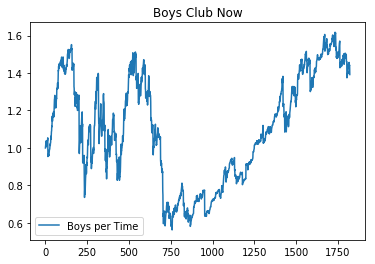

1.000473522016656


In [9]:

j = 0
k = 0
high = 70
low = 50
hiS = 70
loS = 60
price = np.zeros((l-rsi_len, 4))
#pnl = 1;
f=0
L = 3
d=0

for i in range(rsi_len+1, l):
   # print(price[i])
    if (RSIclose[i] <= low and j == 0):
        j = 1
        #d = i
        price[k, 0] = close[i]
   # elif (RSIclose[i] < low and j == 0):
   #     j = j+1
   #     price[i, 0] = close[d]
    elif (RSIclose[i]>=high) and (j>=1):
        k = k+1
        j = 0
   #     f = i=
    price[k, 1] = close[i]
  #  elif (RSIclose[i]>=low) and (j>=0):
  #      price[i, 0] = close[f]
  ##  print(price[i])
  #  if (RSIclose[i] >= hiS and j == 0):
 #       j = 1
 #       price[k, 0] = close[i]
 #       price[k, 2] = 1
 ##   elif (RSIclose[i] <= loS) and (j>=1):
 #       j = 0 
 #      k = k+1
  #  price[k, 1] = close[i];
price = np.delete(price, np.s_[k::], 0)
#print(len(price))
#print(price[16:30000])
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i] = (1+(price[i,1]/price[i,0]-1)*L)
    pnlT[i+1] = pnlT[i]*(1+(price[i,1]/price[i,0]-1)*L)
    price[i, 3] = pnlT[i]
plt.plot(range(0,len(price)), pnlT, label='Boys per Time')
plt.title("Boys Club Now")
plt.legend()
plt.show()
print(np.average(pnl))
#n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
from lib import bitmex
from settings import API_BASE
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from arch import arch_model


In [62]:
print(len(close))

150500


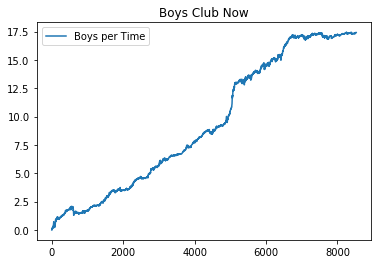

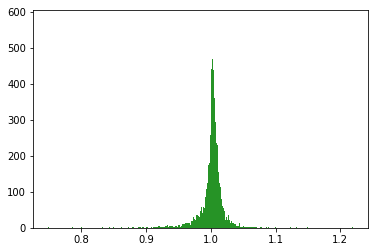

In [45]:
plt.plot(range(1,len(pnl)+1), np.log2(pnlT), label='Boys per Time')
plt.title("Boys Club Now")
plt.legend()
plt.show()
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)

In [39]:
ret = np.zeros(len(close))
for i in range(1,len(close)):
    ret[i] = (close[i]/close[i-1])*10000
ret = np.array(ret[1::1])
#logret = np.log(ret)*100000
#print(logret)
garch11 = arch_model(ret, p=1, q=1)
res = garch11.fit(update_freq=10)
print(res.summary())
print(ret)

Iteration:     10,   Func. Count:     79,   Neg. LLF: 2015034.7016578536
Iteration:     20,   Func. Count:    145,   Neg. LLF: 2014148.3120324046
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2014148.3120319939
            Iterations: 21
            Function evaluations: 147
            Gradient evaluations: 20
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:           -2.01415e+06
Distribution:                  Normal   AIC:                       4.02830e+06
Method:            Maximum Likelihood   BIC:                       4.02835e+06
                                        No. Observations:               500499
Date:                Sun, May 06 2018   Df Residuals:                   500495
Time:     

In [50]:
x = range(100)
print(x[1::1])

range(1, 100)


TypeError: data type not understood

In [6]:

price = np.delete(price, np.s_[k::1], 0)
print(k)


8525


In [37]:
r = np.array([0.945532630498276,
              0.614772790142383,
              0.834417758890680,
              0.862344782601800,
              0.555858715401929,
              0.641058419842652,
              0.720118656981704,
              0.643948007732270,
              0.138790608092353,
              0.279264178231250,
              0.993836948076485,
              0.531967023876420,
              0.964455754192395,
              0.873171802181126,
              0.937828816793698])
 
from arch import arch_model
garch11 = arch_model(r, p=1, q=1)
res = garch11.fit(update_freq=10)
print(res.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.1181984620590425
            Iterations: 9
            Function evaluations: 60
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                      GARCH   Log-Likelihood:               0.118198
Distribution:                  Normal   AIC:                           7.76360
Method:            Maximum Likelihood   BIC:                           10.5958
                                        No. Observations:                   15
Date:                Sun, May 06 2018   Df Residuals:                       11
Time:                        20:25:48   Df Model:                            4
                               Mean Model                               
      

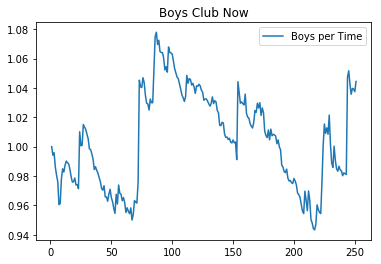

0.9998117377698104


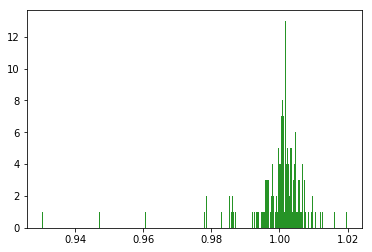

In [133]:
j = 0
k = 0
high = 50
low = 30
hiS = 80
loS = 70
price = np.empty((lm-15, 4))
#pnl = 1;
f=0
L = 3
d=0
for i in range(16, lm):
    if (RSIclose[i] < low and j == 0):
        j = 1
        price[k, 0] = vwap[i]
    elif (RSIclose[i]>=high) and (j>=1):
        k = k+1
        j = 0
        d = 1
    price[k, 1] = vwap[i];
   # if (RSIclose[i] >= hiS and j == 0):
   #     j = 1
   #     price[k, 0] = vwap[i]
   #     price[k, 2] = 1
  #  elif (RSIclose[i] <= loS) and (j>=1):
   #     j = 0 
   #     k = k+1
   # price[k, 1] = vwap[i];
price = np.delete(price, np.s_[k::], 0)
#print(len(price))
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i] = (1+(price[i,1]/price[i,0]-1)*L)
    if price[i,2] == 0:
        pnlT[i+1]=pnlT[i]*(1+(price[i,1]/price[i,0]-1)*L)
    else:
        pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*L)
    price[i, 3] = pnlT[i]
plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
plt.title("Boys Club Now")
plt.legend()
plt.show()
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
print(np.average(pnl))

In [14]:
j = 0
k = 0
high = 50
low = 30
hiS = 70
loS = 60
price = np.empty((lm-15, 4))
#pnl = 1;
f=0
L = 3
d=0
for i in range(15, l):
    if (RSIclose[i] < low and j == 0):
        j = 1
        price[i, 0] = close[i]
    elif (RSIclose[i]>=high) and (j>=1):
        #k = k+1
        j = 0
       # d = 1
    price[i, 1] = close[i];
  #  if (RSIclose[i] >= hiS and j == 0):
 #       j = 1
 #       price[k, 0] = close[i]
 #       price[k, 2] = 1
 ##   elif (RSIclose[i] <= loS) and (j>=1):
 #       j = 0 
 #      k = k+1
  #  price[k, 1] = close[i];
#price = np.delete(price, np.s_[i::], 0)
#print(len(price))
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
for i in range(0, len(price)-1):
    pnl[i] = (1+(price[i,1]/price[i,0]-1)*L)
    if price[i,2] == 0:
        pnlT[i+1]=pnlT[i]*(1+(price[i,1]/price[i,0]-1)*L)
    else:
        pnlT[i+1] = pnlT[i]*(1+(price[i,0]/price[i,1]-1)*L)
    price[i, 3] = pnlT[i]
plt.plot(range(1,len(pnl)+1), pnlT, label='Boys per Time')
plt.title("Boys Club Now")
plt.legend()
plt.show()
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)

IndexError: index 30484 is out of bounds for axis 0 with size 30484

SyntaxError: invalid syntax (<ipython-input-48-3f1631b18079>, line 1)